In [2]:
pip install pandas matplotlib seaborn soccerplots scipy mplsoccer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

barca_squad = pd.read_excel('/content/drive/MyDrive/FM-data-project/barca_squad.xlsx')
madrid_squad = pd.read_excel('/content/drive/MyDrive/FM-data-project/madrid_squad.xlsx')

Defensive Analysis

In [4]:
#refine squad to get defenders who played enough minutes
defenders = barca_squad[barca_squad['Position'].str.contains(r'\b(D|WB)\b')]
defenders['Mins'] = defenders['Mins'].str.replace(',', '')
defenders['Mins'] = pd.to_numeric(defenders['Mins'])
defenders = defenders[defenders['Mins']>700]
defenders.head()

<ipython-input-4-337ed7429333>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  defenders = barca_squad[barca_squad['Position'].str.contains(r'\b(D|WB)\b')]
<ipython-input-4-337ed7429333>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['Mins'] = defenders['Mins'].str.replace(',', '')
<ipython-input-4-337ed7429333>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['Mins'] = pd.to_numeric(defenders['Mi

No.                 Name  Nat  Age  Ability Position Selected  \
3   17        Ronald Araujo  URU   26      NaN                 -   
4    4         Jules Koundé  FRA   26      NaN                 -   
10  14      Alejandro Balde  ESP   21      NaN                 -   
11  22          Mika Mármol  ESP   23      NaN                 -   
12   3  Andreas Christensen  DEN   29      NaN                 -   

               Position/Role/Duty        Position Preferred Foot        CON  \
3       Wide Center-Back (Defend)  D (RC), WB (R)          Right  Excellent   
4   Ball Playing Defender (Cover)  D (RC), WB (R)          Right  Excellent   
10   Complete Wing-Back (Support)   D/WB/M/AM (L)           Left  Excellent   
11    Inverted Wing-Back (Defend)          D (LC)           Left       Peak   
12  Ball Playing Defender (Cover)       D (C), DM          Right  Excellent   

    ...  Fls  Hdr % K Hdrs/90 Blk/90  Int/90  Clr/90  Poss Won/90 Pres C/90  \
3   ...   42    71%      0.77   0.47    1.89    0.91        18.94      1.01   
4   ...   48    67%      0.44   0.67    2.55    0.77        16.74      2.28   
10  ...   32    59%      0.16   0.78    3.19    0.99        10.79      2.67   
11  ...   31    67%      0.43   0.94    2.12    0.83        13.53      2.23   
12  ...   23    61%      0.75   0.53    1.66    0.72        14.81      1.15   

    Dist/90  Inf  
3     7.2mi  Yel  
4     7.8mi  NaN  
10    7.5mi  NaN  
11    7.5mi  NaN  
12    7.3mi  NaN  

[5 rows x 50 columns]

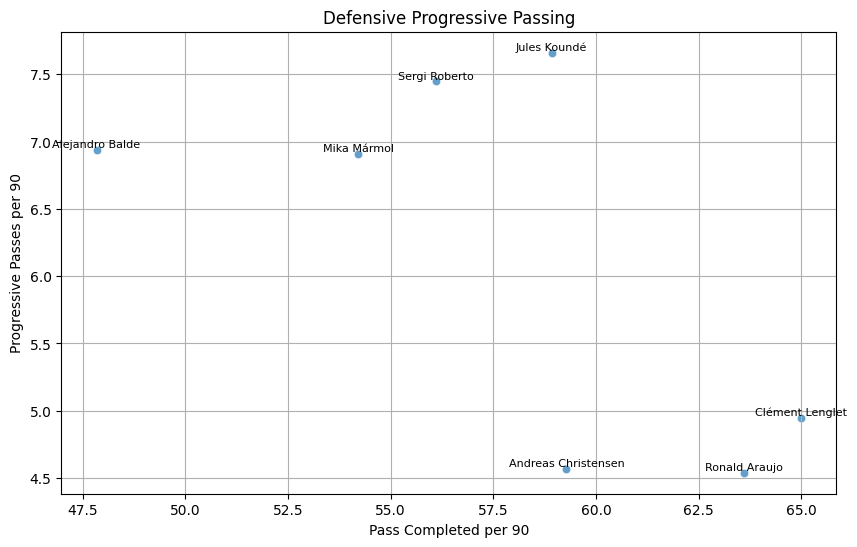

In [5]:
#progressive passing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=defenders, x = 'Ps C/90', y = 'Pr passes/90', alpha = 0.7)

for index, row in defenders.iterrows():
    plt.text(row['Ps C/90'], row['Pr passes/90'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.title('Defensive Progressive Passing')
plt.xlabel('Pass Completed per 90')
plt.ylabel('Progressive Passes per 90')
plt.grid(True)
plt.show()



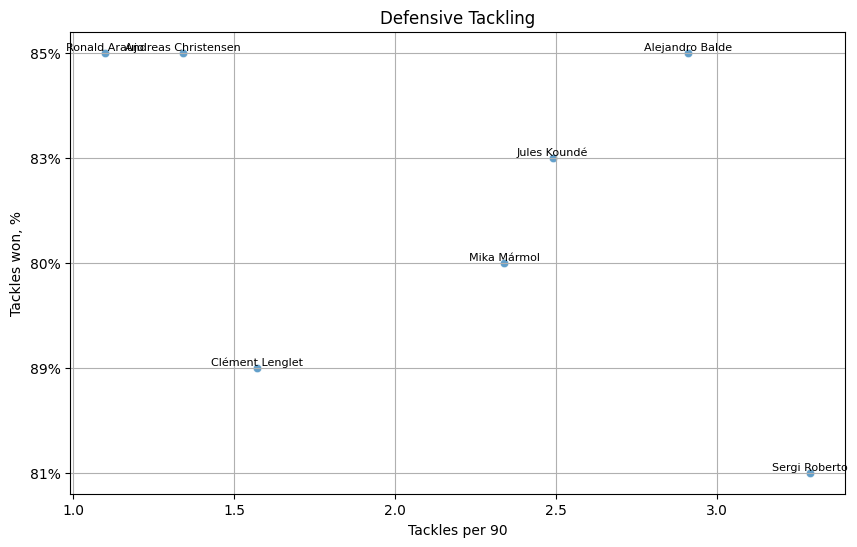

In [6]:
#Tackling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=defenders, x = 'Tck/90', y = 'Tck R', alpha = 0.7)

for index, row in defenders.iterrows():
    plt.text(row['Tck/90'], row['Tck R'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.title('Defensive Tackling')
plt.xlabel('Tackles per 90')
plt.ylabel('Tackles won, %')
plt.grid(True)
plt.show()

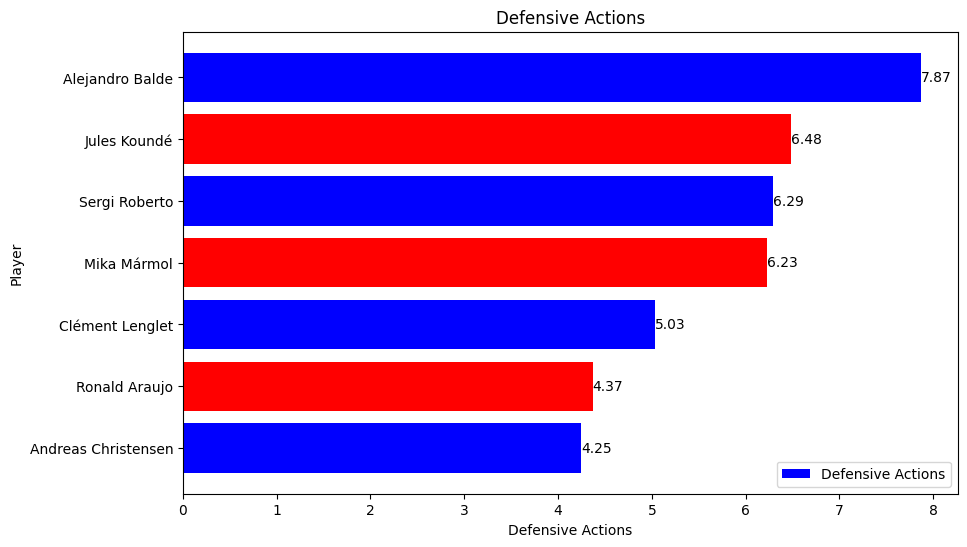

In [7]:
#Defensive Actions

defenders['Defensive Actions'] = (pd.to_numeric(defenders['Blk/90']) + pd.to_numeric(defenders['Clr/90']) + pd.to_numeric(defenders['Int/90']) + pd.to_numeric(defenders['Tck/90']))

defenders.sort_values(by='Defensive Actions', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(y=defenders['Name'], width=defenders['Defensive Actions'], label='Defensive Actions', color = ['blue', 'red'] )
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.title('Defensive Actions')
plt.xlabel('Defensive Actions')
plt.ylabel('Player')
plt.legend()
plt.show()

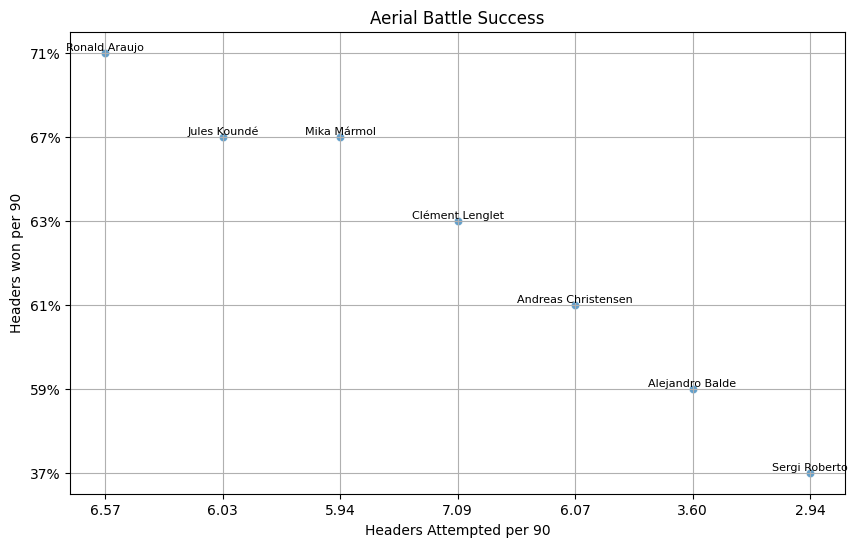

In [8]:
#Headers won

defenders = defenders.sort_values(by=['Hdr %', 'Aer A/90'], ascending=[False,False])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=defenders, x = 'Aer A/90', y = 'Hdr %', alpha = 0.7)

for index, row in defenders.iterrows():
    plt.text(row['Aer A/90'], row['Hdr %'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.title('Aerial Battle Success')
plt.xlabel('Headers Attempted per 90')
plt.ylabel('Headers won per 90')
plt.grid(True)
plt.show()


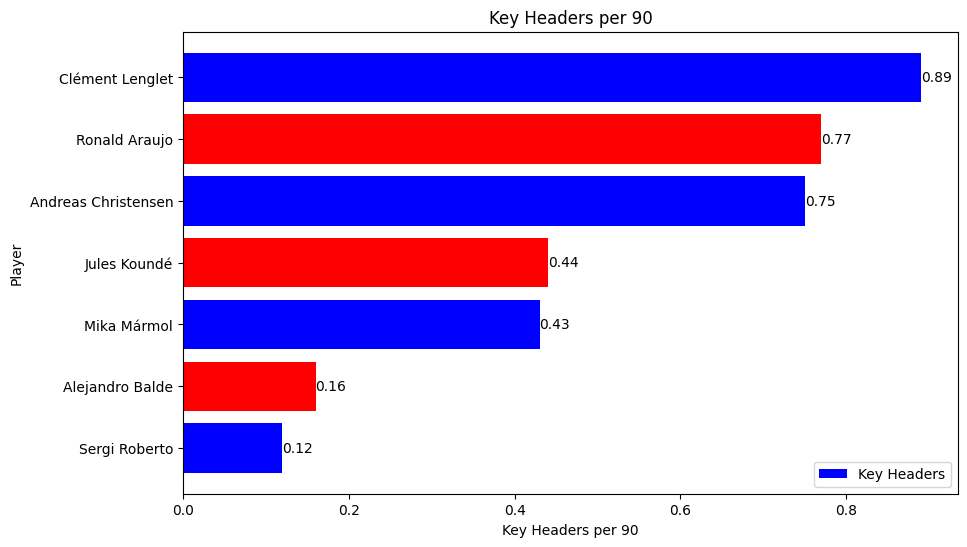

In [9]:
#Key Headers

defenders.sort_values(by='K Hdrs/90', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(y=defenders['Name'], width=defenders['K Hdrs/90'], label='Key Headers',color = ['blue', 'red'])
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')
plt.title('Key Headers per 90')
plt.xlabel('Key Headers per 90')
plt.ylabel('Player')
plt.legend()
plt.show()

Midfield Analysis


In [10]:
#refine squad to get midfielders who played enough minutes
barca_mids = barca_squad[ (barca_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b') |
     (barca_squad['Position'].str.contains(r'\bAM\b') &
      ~barca_squad['Position'].str.contains(r'AM\s*\((R|L|RL)\)'))&~barca_squad['Position'].str.contains(r'\bST\b'))
]
barca_mids['Mins'] = barca_mids['Mins'].str.replace(',', '')
barca_mids['Mins'] = pd.to_numeric(barca_mids['Mins'])
barca_mids = barca_mids[barca_mids['Mins']>700]

madrid_mids = madrid_squad[madrid_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b') |
     (madrid_squad['Position'].str.contains(r'\bAM\b') &
      ~madrid_squad['Position'].str.contains(r'AM\s*\((R|L|RL)\)'))&~madrid_squad['Position'].str.contains(r'\bST\b')]
madrid_mids['Mins'] = madrid_mids['Mins'].str.replace(',', '')
madrid_mids['Mins'] = pd.to_numeric(madrid_mids['Mins'])
madrid_mids = madrid_mids[madrid_mids['Mins']>700]

madrid_mids


<ipython-input-10-c8243f49d9f7>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  barca_mids = barca_squad[ (barca_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b') |
<ipython-input-10-c8243f49d9f7>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~barca_squad['Position'].str.contains(r'AM\s*\((R|L|RL)\)'))&~barca_squad['Position'].str.contains(r'\bST\b'))
<ipython-input-10-c8243f49d9f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_mids['Mins'] = barca_mids['Mins'].str.replace(',', '')
<ipython-input-10-c8243f49d9f7>:7: SettingWithCopyWarning: 
A value is try

No.                  Name  Nat  Age  Ability Position Selected  \
1   21           Brahim Díaz  MAR   25  Unknown                 -   
3    8       Kalvin Phillips  ENG   29  Unknown                S5   
4   34            Arda Güler  TUR   20  Unknown               AMC   
5   19         Dani Ceballos  ESP   28  Unknown                S7   
6   15     Federico Valverde  URU   26  Unknown                DM   
7   18   Aurélien Tchouameni  FRA   25  Unknown                S3   
9   22       Jude Bellingham  ENG   21  Unknown               MCR   
12  12     Eduardo Camavinga  FRA   22  Unknown               MCL   
14   4  Lutsharel Geertruida  NED   24  Unknown                 -   
15   7           David Alaba  AUT   33  Unknown                 -   

    Position/Role/Duty                   Position Preferred Foot        CON  \
1                  NaN             M (C), AM (RC)          Right       Peak   
3                  NaN                  DM, M (C)          Right       Peak   
4                  NaN                    AM (RC)           Left  Excellent   
5                  NaN                   M/AM (C)          Right       Peak   
6                  NaN         DM, M (RC), AM (R)          Right  Excellent   
7                  NaN                  DM, M (C)          Right  Excellent   
9                  NaN               DM, M/AM (C)          Right  Excellent   
12                 NaN           D (L), DM, M (C)           Left  Excellent   
14                 NaN         D (RC), WB (R), DM          Right       Peak   
15                 NaN  D (LC), WB (L), DM, M (C)           Left       Peak   

    ...  Fls  Hdr % K Hdrs/90 Blk/90 Int/90 Clr/90 Poss Won/90 Pres C/90  \
1   ...   23    15%      0.03   0.26   1.94   0.46       11.74      2.60   
3   ...   33    58%      0.05   0.38   1.56   0.76       13.05      2.98   
4   ...   22    22%      0.00   0.26   1.47   0.60       10.84      2.59   
5   ...   10    27%      0.09   0.43   1.39   0.52       11.54      2.17   
6   ...   51    55%      0.29   0.31   1.99   0.60       15.19      2.68   
7   ...   33    58%      0.40   0.27   1.39   0.60       16.65      3.25   
9   ...   47    60%      0.09   0.37   1.52   0.65       19.00      3.03   
12  ...   50    53%      0.16   0.29   1.88   0.42       15.99      3.33   
14  ...   50    69%      0.43   0.53   2.18   0.86       13.75      2.40   
15  ...   41    65%      0.55   0.60   2.30   0.84       13.26      2.21   

    Dist/90  Inf  
1     8.5mi  NaN  
3     8.4mi  NaN  
4     8.2mi  Loa  
5     8.1mi  NaN  
6     8.1mi  NaN  
7     8.0mi  Wnt  
9     7.8mi  NaN  
12    7.7mi  NaN  
14    7.7mi  NaN  
15    7.7mi  Wnt  

[10 rows x 50 columns]

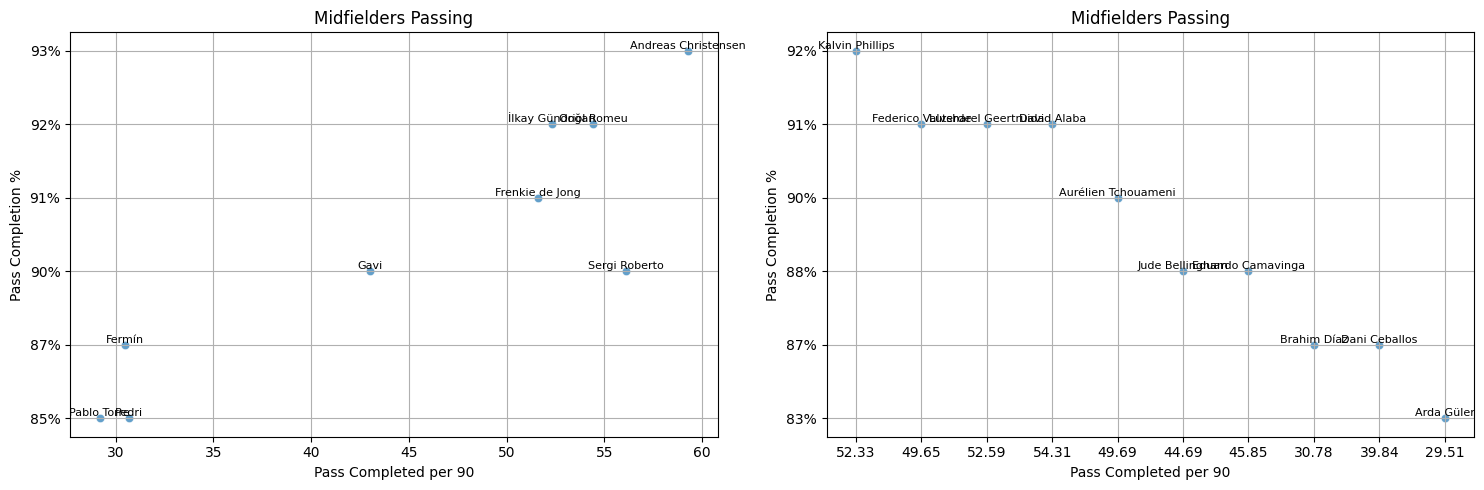

In [11]:
#passing accuracy
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.scatterplot(data=barca_mids.sort_values(by='Pas %', ascending=False), x = 'Ps C/90', y = 'Pas %', alpha = 0.7, ax=axes[0])
axes[0].set_title('Midfielders Passing')
axes[0].set_xlabel('Pass Completed per 90')
axes[0].set_ylabel('Pass Completion %')
axes[0].grid(True)
for index, row in barca_mids.iterrows():
    axes[0].text(row['Ps C/90'], row['Pas %'], row['Name'], ha='center', va='bottom', fontsize=8)
sns.scatterplot(data=madrid_mids.sort_values(by='Pas %', ascending = False), x = 'Ps C/90', y = 'Pas %', alpha = 0.7, ax=axes[1])
axes[1].set_title('Midfielders Passing')
axes[1].set_xlabel('Pass Completed per 90')
axes[1].set_ylabel('Pass Completion %')
axes[1].grid(True)
for index, row in madrid_mids.iterrows():
    axes[1].text(row['Ps C/90'], row['Pas %'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()



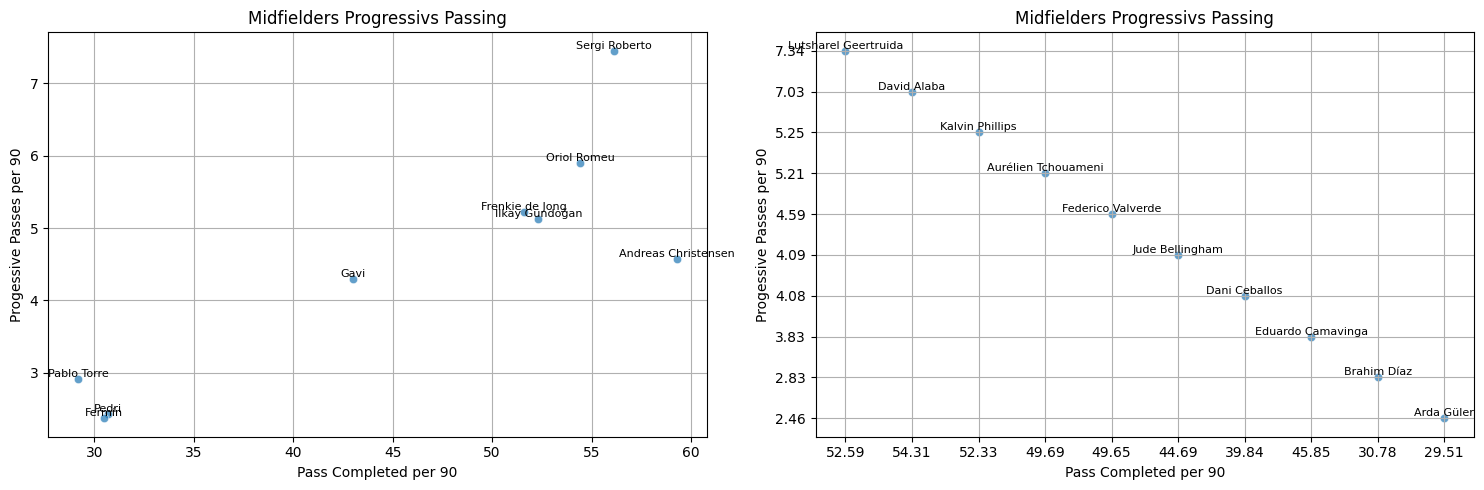

In [12]:
#progressive passing
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.scatterplot(data=barca_mids.sort_values(by='Pr passes/90', ascending=False), x = 'Ps C/90', y = 'Pr passes/90', alpha = 0.7, ax=axes[0])
axes[0].set_title('Midfielders Progressivs Passing')
axes[0].set_xlabel('Pass Completed per 90')
axes[0].set_ylabel('Progessive Passes per 90')
axes[0].grid(True)
for index, row in barca_mids.iterrows():
    axes[0].text(row['Ps C/90'], row['Pr passes/90'], row['Name'], ha='center', va='bottom', fontsize=8)
sns.scatterplot(data=madrid_mids.sort_values(by='Pr passes/90', ascending=False), x = 'Ps C/90', y = 'Pr passes/90', alpha = 0.7, ax=axes[1])
axes[1].set_title('Midfielders Progressivs Passing')
axes[1].set_xlabel('Pass Completed per 90')
axes[1].set_ylabel('Progessive Passes per 90')
axes[1].grid(True)
for index, row in madrid_mids.iterrows():
    axes[1].text(row['Ps C/90'], row['Pr passes/90'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()



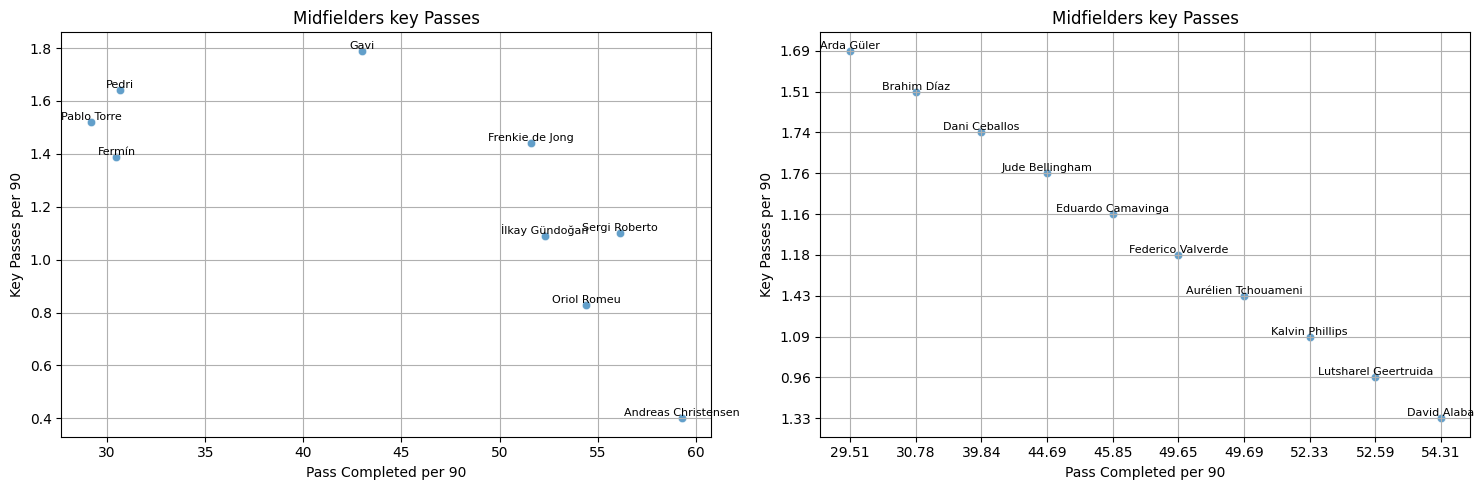

In [51]:
#Key Passes
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.scatterplot(data=barca_mids.sort_values(by='OP-KP/90', ascending=False), x = 'Ps C/90', y = 'OP-KP/90', alpha = 0.7, ax=axes[0])
axes[0].set_title('Midfielders key Passes')
axes[0].set_xlabel('Pass Completed per 90')
axes[0].set_ylabel('Key Passes per 90')
axes[0].grid(True)
for index, row in barca_mids.iterrows():
    axes[0].text(row['Ps C/90'], row['OP-KP/90'], row['Name'], ha='center', va='bottom', fontsize=8)
sns.scatterplot(data= madrid_mids.sort_values(by=['Ps C/90', 'OP-KP/90']), x = 'Ps C/90', y = 'OP-KP/90', alpha = 0.7, ax=axes[1])
axes[1].set_title('Midfielders key Passes')
axes[1].set_xlabel('Pass Completed per 90')
axes[1].set_ylabel('Key Passes per 90')
axes[1].grid(True)
for index, row in madrid_mids.iterrows():
    axes[1].text(row['Ps C/90'], row['OP-KP/90'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

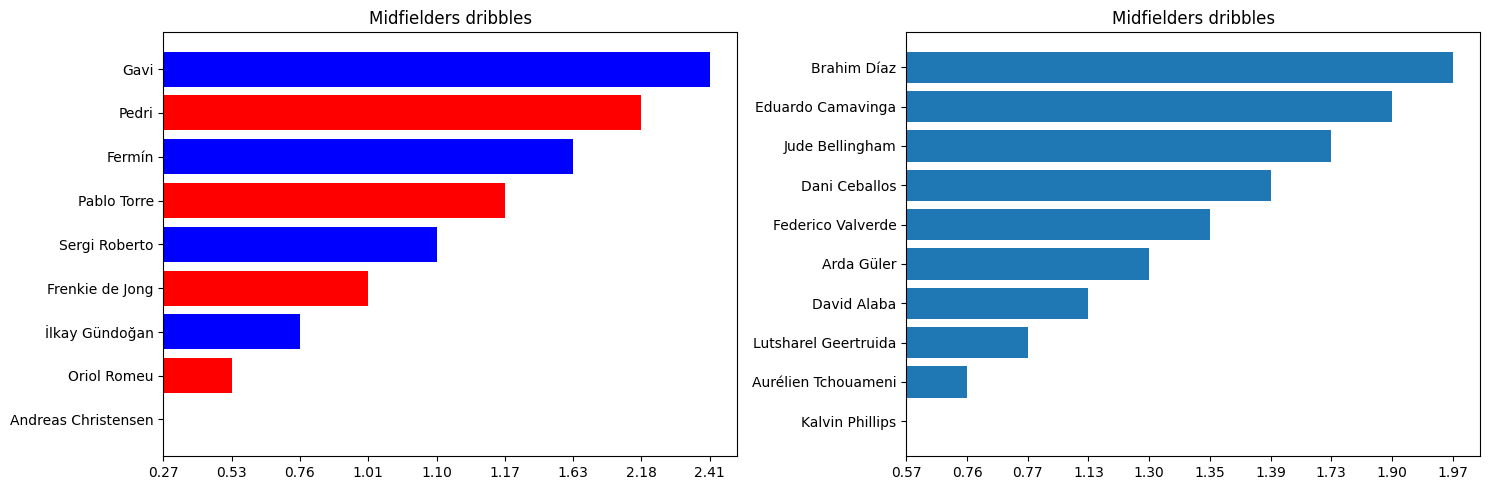

In [14]:
#carries
fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes[0].barh(y=barca_mids.sort_values(by="Drb/90", ascending=True)['Name'], width=barca_mids.sort_values(by="Drb/90", ascending=True)['Drb/90'], label='Dribbles per 90', color = ['blue', 'red'])

axes[0].set_title('Midfielders dribbles')

axes[1].barh(y=madrid_mids.sort_values(by="Drb/90", ascending=True)['Name'], width=madrid_mids.sort_values(by="Drb/90", ascending=True)['Drb/90'], label='Dribbles per 90')
axes[1].set_title('Midfielders dribbles')
plt.tight_layout()
plt.show()


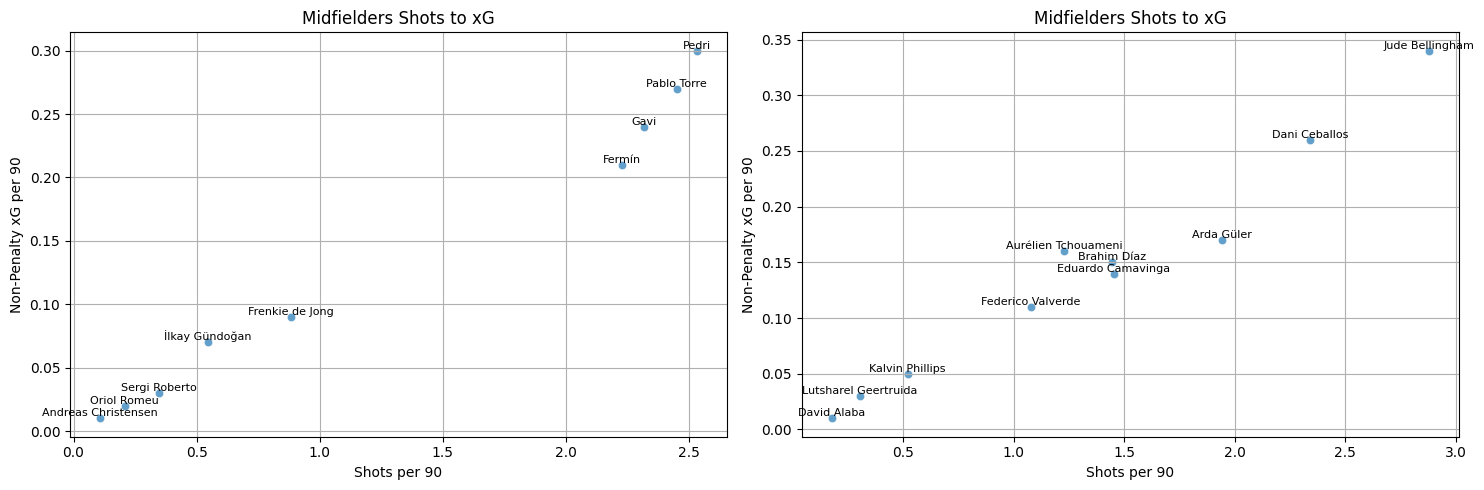

In [15]:
#shots per game to xg per game

fig, axes = plt.subplots(1,2,figsize=(15, 5))

# Convert Shots and Mins to numeric
barca_mids['Shots'] = pd.to_numeric(barca_mids['Shots'], errors='coerce')
barca_mids['Mins'] = pd.to_numeric(barca_mids['Mins'], errors='coerce')
madrid_mids['Shots'] = pd.to_numeric(madrid_mids['Shots'], errors='coerce')
madrid_mids['Mins'] = pd.to_numeric(madrid_mids['Mins'], errors='coerce')
barca_mids['NP-xG/90'] = barca_mids['NP-xG/90'].apply(pd.to_numeric, errors='coerce')
madrid_mids['NP-xG/90'] = madrid_mids['NP-xG/90'].apply(pd.to_numeric, errors='coerce')

# Calculate Shots per 90 minutes
barca_mids['Shot/90'] = (barca_mids['Shots'] / barca_mids['Mins']) * 90
madrid_mids['Shot/90'] = (madrid_mids['Shots'] / madrid_mids['Mins']) * 90
sns.scatterplot(data=barca_mids.sort_values(by='NP-xG/90', ascending=False), x = 'Shot/90', y = 'NP-xG/90', alpha = 0.7, ax=axes[0])
axes[0].set_title('Midfielders Shots to xG')
axes[0].set_xlabel('Shots per 90')
axes[0].set_ylabel('Non-Penalty xG per 90')
axes[0].grid(True)
#Use the x and y values from the scatterplot for the text positions
for index, row in barca_mids.iterrows():
    axes[0].text(row['Shot/90'], row['NP-xG/90'], row['Name'], ha='center', va='bottom', fontsize=8)
sns.scatterplot(data=madrid_mids.sort_values(by='NP-xG/90', ascending=False), x = 'Shot/90', y = 'NP-xG/90', alpha = 0.7, ax=axes[1])
axes[1].set_title('Midfielders Shots to xG')
axes[1].set_xlabel('Shots per 90')
axes[1].set_ylabel('Non-Penalty xG per 90')
axes[1].grid(True)
#Use the x and y values from the scatterplot for the text positions
for index, row in madrid_mids.iterrows():
    axes[1].text(row['Shot/90'], row['NP-xG/90'], row['Name'], ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

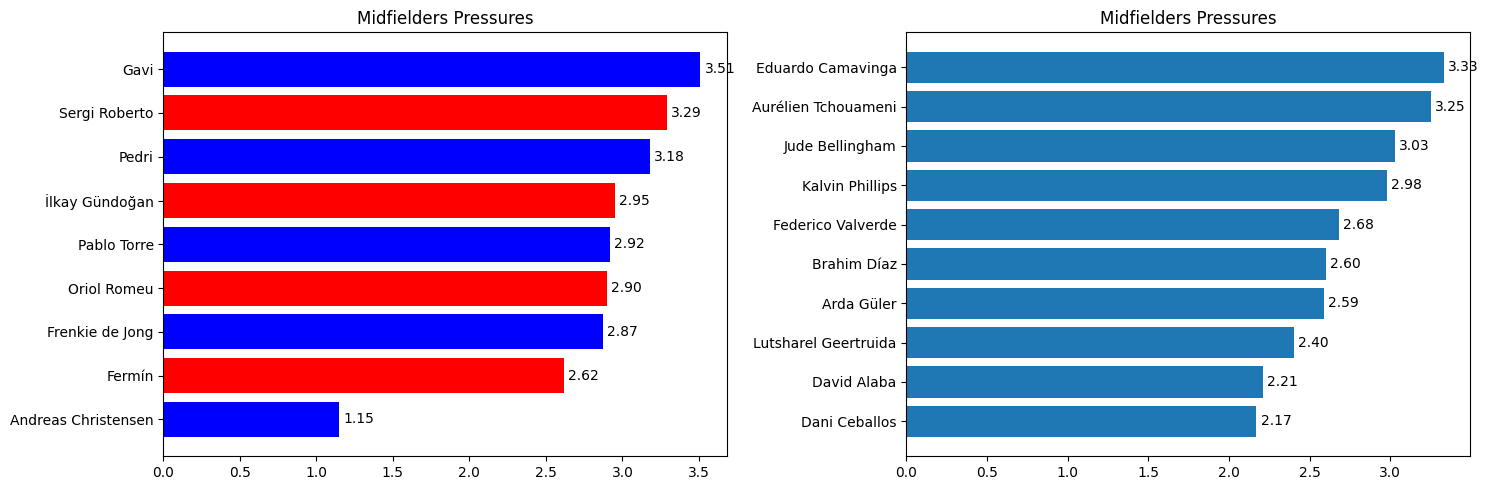

In [61]:
#Defensive stats

fig, axes = plt.subplots(1,2,figsize=(15, 5))
bars = axes[0].barh(y=barca_mids.sort_values(by="Pres C/90", ascending=True)['Name'], width=barca_mids.sort_values(by="Pres C/90", ascending=True)['Pres C/90'], label='Pressures per 90', color = ['blue', 'red'])
for bar in bars:
    width = bar.get_width()
    axes[0].annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center')
axes[0].set_title('Midfielders Pressures')

bars = axes[1].barh(y=madrid_mids.sort_values(by="Pres C/90", ascending=True)['Name'], width=pd.to_numeric(madrid_mids.sort_values(by="Pres C/90", ascending=True)['Pres C/90']), label='Pressures per 90')
for bar in bars:
    width = bar.get_width()
    axes[1].annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center')
axes[1].set_title('Midfielders Pressures')
plt.tight_layout()
plt.show()

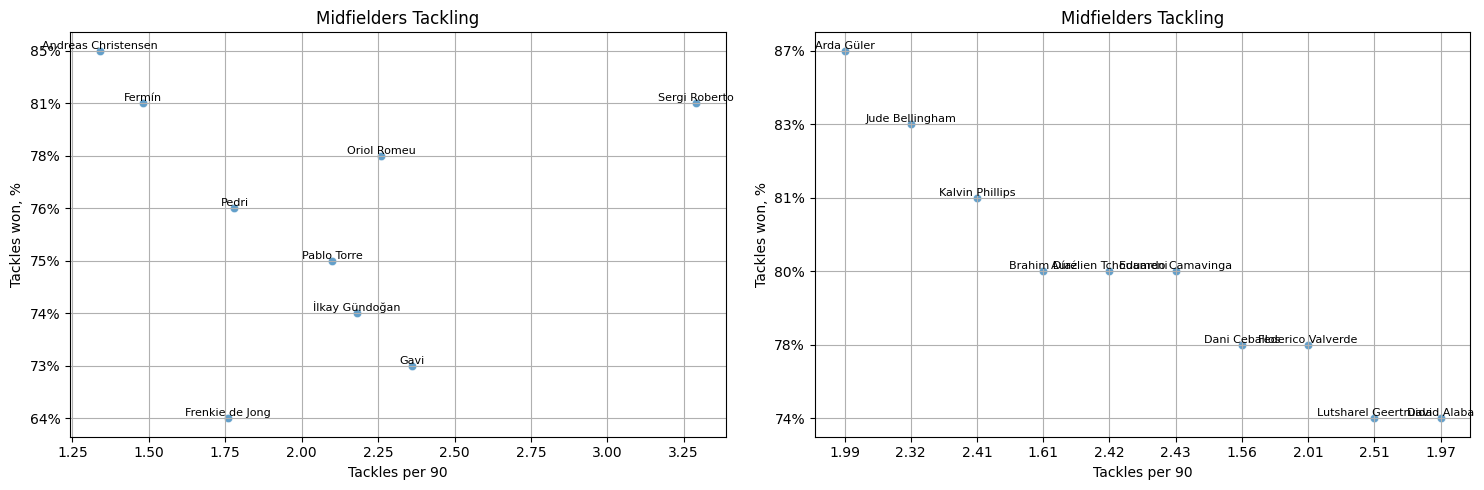

In [17]:
#Tackling
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.scatterplot(data=barca_mids.sort_values(by= 'Tck R', ascending=False), x = 'Tck/90', y = 'Tck R', alpha = 0.7,ax=axes[0])
for index, row in barca_mids.iterrows():
    axes[0].text(row['Tck/90'], row['Tck R'], row['Name'], ha='center', va='bottom', fontsize=8)
axes[0].set_title('Midfielders Tackling')
axes[0].set_xlabel('Tackles per 90')
axes[0].set_ylabel('Tackles won, %')
axes[0].grid(True)

sns.scatterplot(data=madrid_mids.sort_values(by= 'Tck R', ascending=False), x = 'Tck/90', y = 'Tck R', alpha = 0.7,ax=axes[1])
for index, row in madrid_mids.iterrows():
    axes[1].text(row['Tck/90'], row['Tck R'], row['Name'], ha='center', va='bottom', fontsize=8)
axes[1].set_title('Midfielders Tackling')
axes[1].set_xlabel('Tackles per 90')
axes[1].set_ylabel('Tackles won, %')
axes[1].grid(True)

plt.tight_layout()
plt.show()

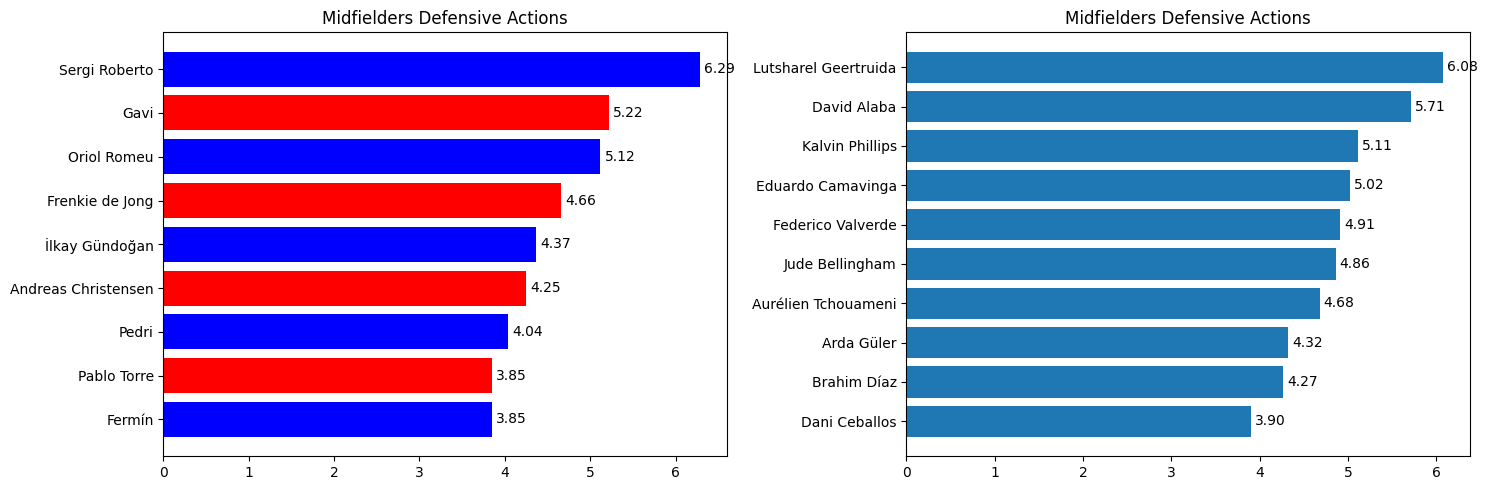

In [53]:
#Total Defensive Actions
barca_mids['Blk/90'] = barca_mids['Blk/90'].fillna('0').astype(str).str.replace('-', '0')
barca_mids['Clr/90'] = barca_mids['Clr/90'].fillna('0').astype(str).str.replace('-', '0')
barca_mids['Int/90'] = barca_mids['Int/90'].fillna('0').astype(str).str.replace('-', '0')
barca_mids['Tck/90'] = barca_mids['Tck/90'].fillna('0').astype(str).str.replace('-', '0')

madrid_mids['Blk/90'] = madrid_mids['Blk/90'].fillna('0').astype(str).str.replace('-', '0')
madrid_mids['Clr/90'] = madrid_mids['Clr/90'].fillna('0').astype(str).str.replace('-', '0')
madrid_mids['Int/90'] = madrid_mids['Int/90'].fillna('0').astype(str).str.replace('-', '0')
madrid_mids['Tck/90'] = madrid_mids['Tck/90'].fillna('0').astype(str).str.replace('-', '0')

barca_mids['Defensive Actions'] = (pd.to_numeric(barca_mids['Blk/90']) + pd.to_numeric(barca_mids['Clr/90']) + pd.to_numeric(barca_mids['Int/90']) + pd.to_numeric(barca_mids['Tck/90']))
madrid_mids['Defensive Actions'] = (pd.to_numeric(madrid_mids['Blk/90']) + pd.to_numeric(madrid_mids['Clr/90']) + pd.to_numeric(madrid_mids['Int/90']) + pd.to_numeric(madrid_mids['Tck/90']))

fig, axes = plt.subplots(1,2,figsize=(15, 5))
bars = axes[0].barh(y=barca_mids.sort_values(by='Defensive Actions', ascending = True)['Name'], width=barca_mids.sort_values(by='Defensive Actions', ascending = True)['Defensive Actions'], label='Defensive Actions', color = ['blue', 'red'])
for bar in bars:
    width = bar.get_width()
    axes[0].annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center')
axes[0].set_title('Midfielders Defensive Actions')

bars = axes[1].barh(y=madrid_mids.sort_values(by='Defensive Actions', ascending = True)['Name'], width=madrid_mids.sort_values(by='Defensive Actions', ascending = True)['Defensive Actions'], label='Defensive Actions')
for bar in bars:
    width = bar.get_width()
    axes[1].annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0), textcoords="offset points", ha='left', va='center')
axes[1].set_title('Midfielders Defensive Actions')
plt.tight_layout()
plt.show()


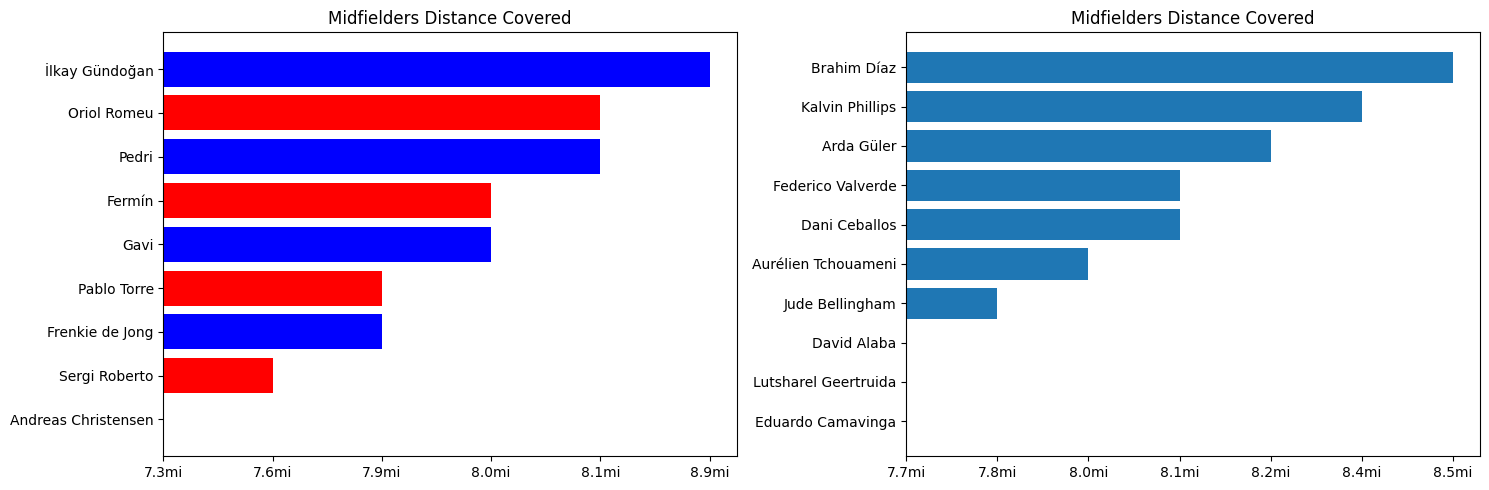

In [62]:
#Distance Covered
fig, axes = plt.subplots(1,2,figsize=(15, 5))
bars = axes[0].barh(y=barca_mids.sort_values(by='Dist/90', ascending = True)['Name'], width=barca_mids.sort_values(by='Dist/90', ascending = True)['Dist/90'], label='Dist/90', color = ['blue', 'red'])
axes[0].set_title('Midfielders Distance Covered')

axes[1].barh(y=madrid_mids.sort_values(by='Dist/90', ascending = True)['Name'], width=madrid_mids.sort_values(by='Dist/90', ascending = True)['Dist/90'], label='Dist/90')
axes[1].set_title('Midfielders Distance Covered')
plt.tight_layout()
plt.show()


Attackers

In [20]:
barca_att = barca_squad[barca_squad['Position'].str.contains(r'\b(AM|ST)\b') & ~(barca_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b'))&
     ~barca_squad['Position'].str.contains(r'M\s*\(C\)')
     ]
barca_att['Mins'] = barca_att['Mins'].str.replace(',', '')
barca_att['Mins'] = pd.to_numeric(barca_att['Mins'])
barca_att = barca_att[barca_att['Mins']>700]

madrid_att = madrid_squad[madrid_squad['Position'].str.contains(r'\b(AM|ST)\b') & ~(madrid_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b'))&~madrid_squad['Position'].str.contains(r'M\s*\(C\)')]
madrid_att['Mins'] = madrid_att['Mins'].str.replace(',', '').str.replace('-', '')
madrid_att['Mins'] = pd.to_numeric(madrid_att['Mins'])
madrid_att = madrid_att[madrid_att['Mins']>700]

barca_att

<ipython-input-20-30c464612998>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  barca_att = barca_squad[barca_squad['Position'].str.contains(r'\b(AM|ST)\b') & ~(barca_squad['Position'].str.contains(r'\b(DM|M\s*\(C\))\b'))&
<ipython-input-20-30c464612998>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barca_att['Mins'] = barca_att['Mins'].str.replace(',', '')
<ipython-input-20-30c464612998>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

No.             Name  Nat  Age  Ability Position Selected  \
6   23         Raphinha  BRA   28      NaN                 -   
7    9    Romelu Lukaku  BEL   32      NaN                 -   
9    7    Ferran Torres  ESP   25      NaN                 -   
10  14  Alejandro Balde  ESP   21      NaN                 -   
13  27     Lamine Yamal  ESP   17      NaN                 -   
15  19      Vitor Roque  BRA   20      NaN                 -   

              Position/Role/Duty                Position Preferred Foot  \
6               Winger (Support)          M (R), AM (RL)           Left   
7       Target Forward (Support)                  ST (C)           Left   
9               Winger (Support)  M (R), AM (RL), ST (C)          Right   
10  Complete Wing-Back (Support)           D/WB/M/AM (L)           Left   
13               Winger (Attack)                 AM (RL)      Left Only   
15     Advanced Forward (Attack)         AM (RL), ST (C)          Right   

          CON  ...  Fls  Hdr % K Hdrs/90 Blk/90  Int/90  Clr/90  Poss Won/90  \
6   Excellent  ...   67    24%      0.00   0.14    1.48    0.46         5.07   
7   Excellent  ...   49    50%      0.09   0.12    1.16    0.27         1.64   
9   Excellent  ...   34    38%      0.03   0.31    1.41    0.61         4.18   
10  Excellent  ...   32    59%      0.16   0.78    3.19    0.99        10.79   
13       Good  ...   13    37%      0.00   0.59    2.37    0.30         3.84   
15       Peak  ...   11    22%      0.00   0.20    1.01    0.34         2.02   

   Pres C/90  Dist/90  Inf  
6       3.39    7.7mi  NaN  
7       1.76    7.4mi  NaN  
9       3.35    7.6mi  NaN  
10      2.67    7.5mi  NaN  
13      3.75    7.6mi  NaN  
15      2.22    7.2mi  NaN  

[6 rows x 50 columns]

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

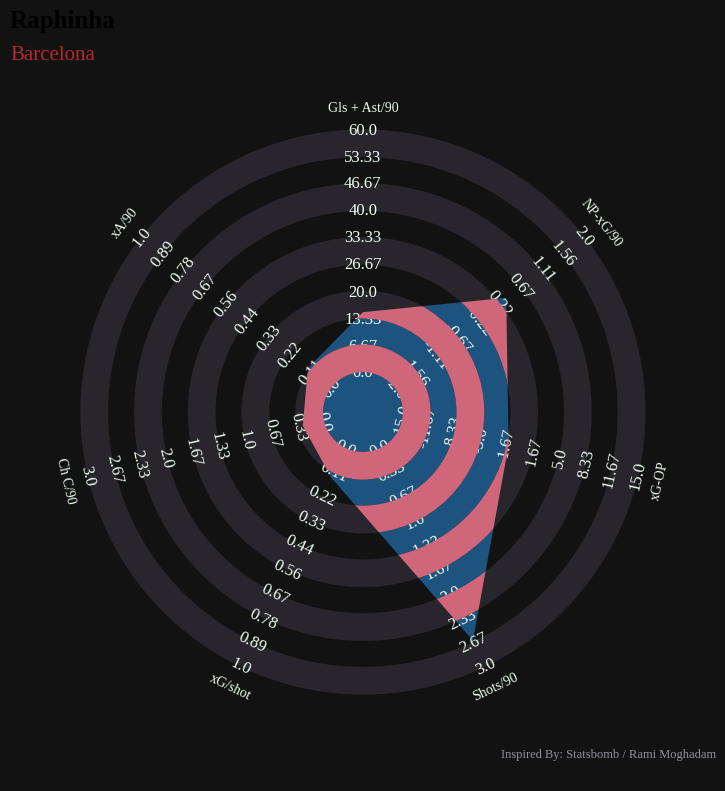

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

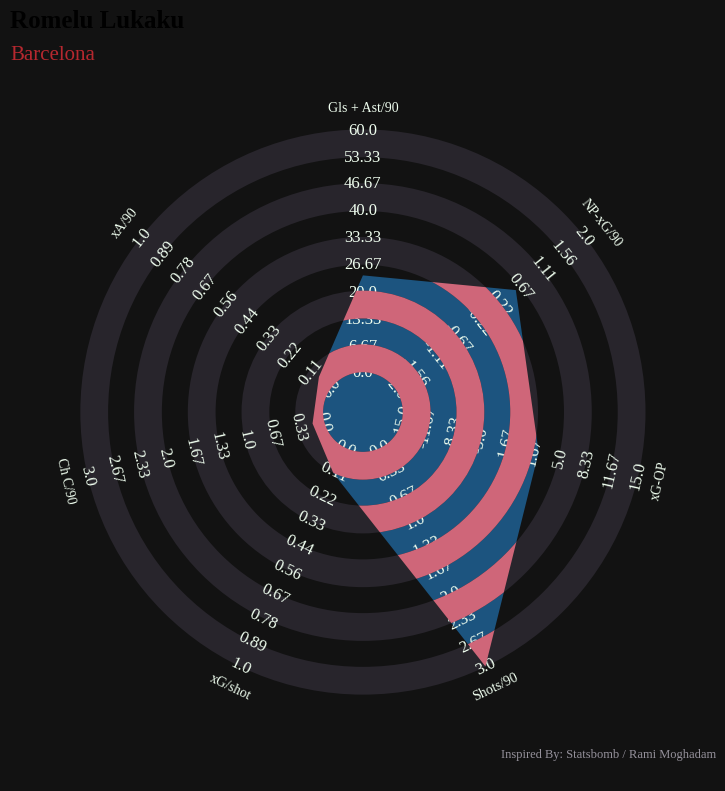

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

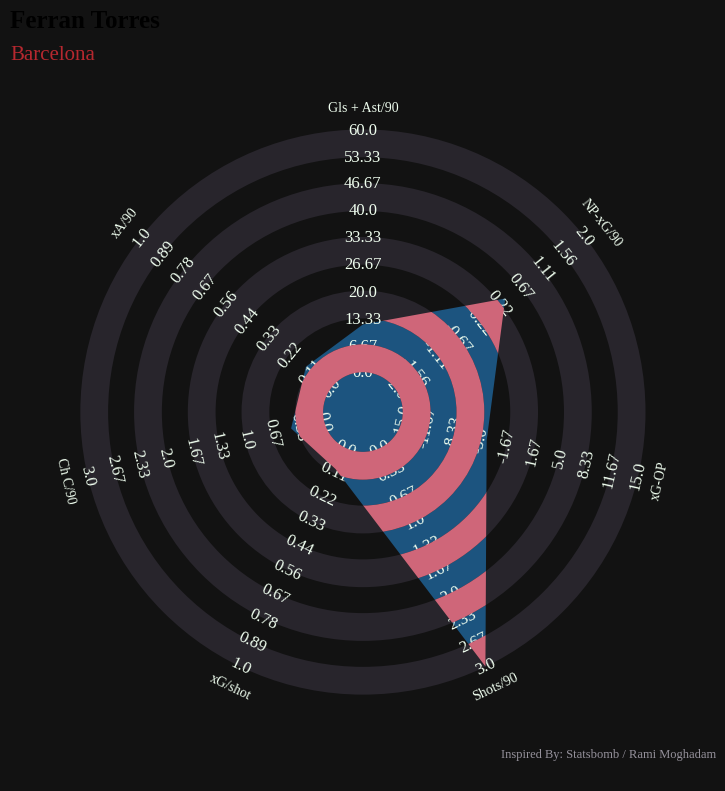

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

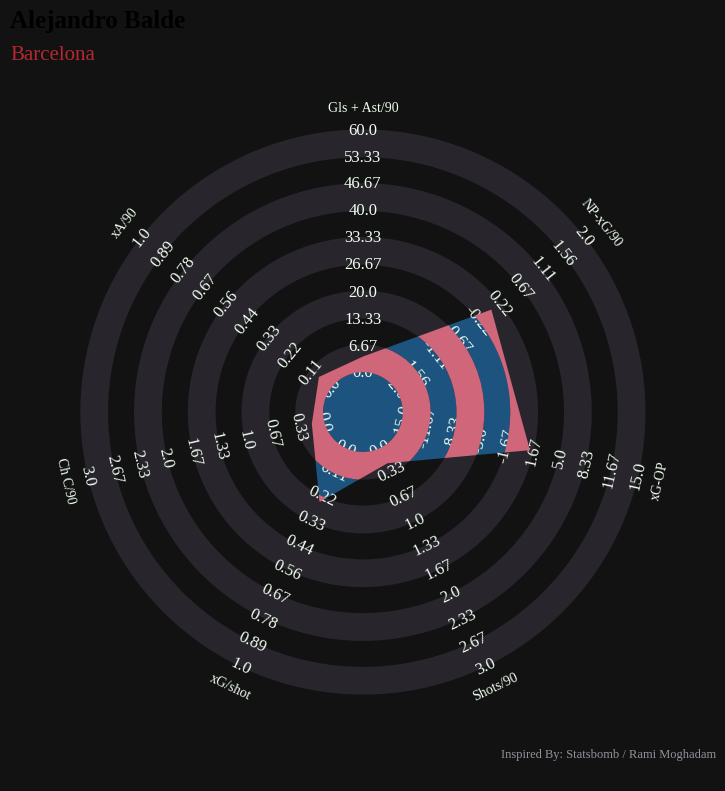

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

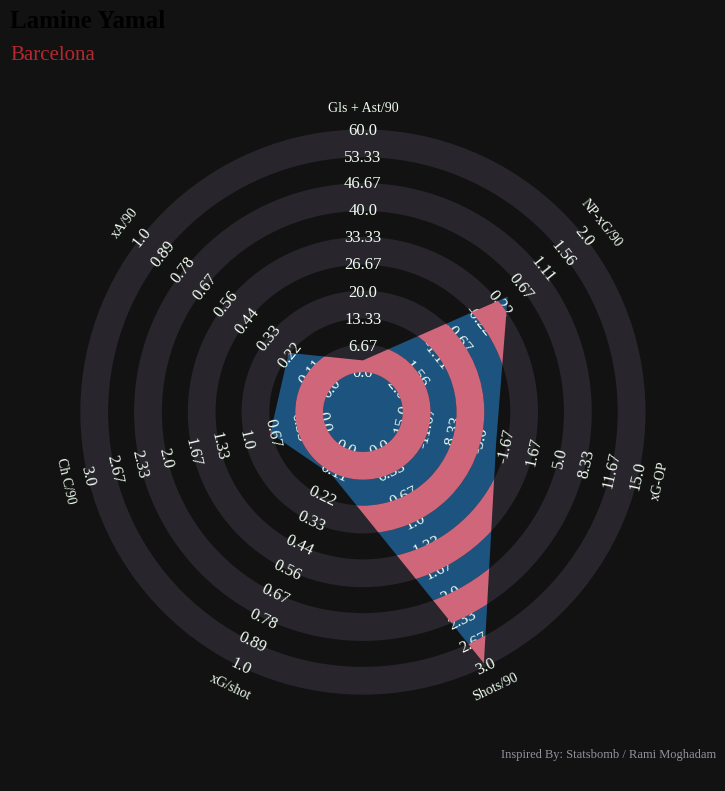

Gls + Ast/90  NP-xG/90  xG-OP  Shots/90  xG/shot Ch C/90  xA/90  \
6             15      0.36  -1.44  2.647059     0.14    0.28   0.13   
7             24      0.56   2.33  4.915591     0.12    0.15   0.07   
9             12      0.34  -4.19  3.597540     0.10    0.43   0.14   
10             4      0.05   1.24  0.217017     0.25    0.16   0.07   
13             3      0.39  -3.00  2.957284     0.13    0.69   0.23   
15             5      0.62  -6.03  5.381166     0.13    0.27   0.05   

               Name  
6          Raphinha  
7     Romelu Lukaku  
9     Ferran Torres  
10  Alejandro Balde  
13     Lamine Yamal  
15      Vitor Roque

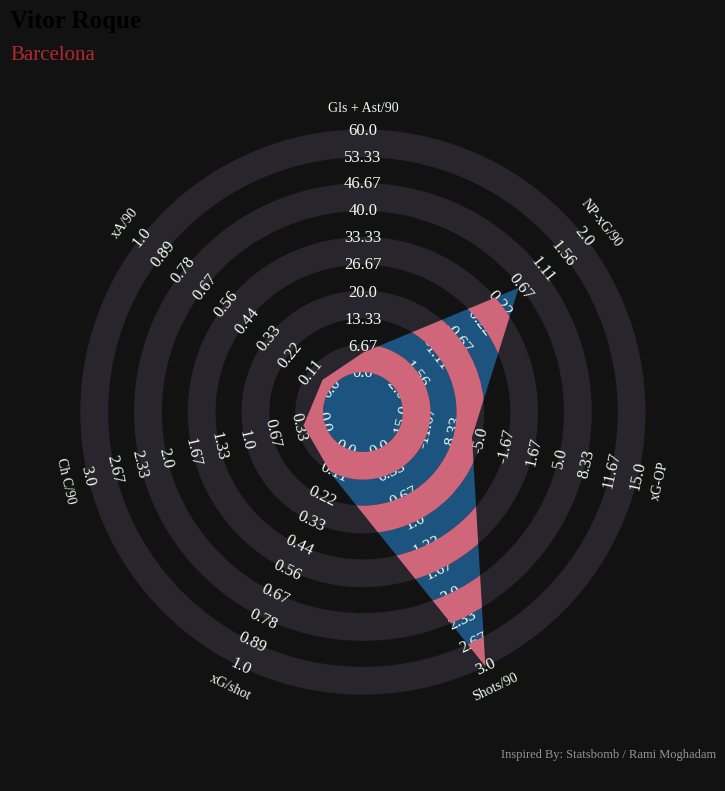

In [21]:
from math import pi
import numpy as np
from soccerplots.radar_chart import Radar
#Goal Contributions
categories = ['Gls + Ast/90', 'NP-xG/90', 'xG-OP', 'Shots/90','xG/shot', 'Ch C/90', 'xA/90']
ranges = [(0, 60), (-2, 2), (-15, 15), (0, 3), (0, 1), (0,3),(0,1)]

barca_att['Gls + Ast/90'] = pd.to_numeric(barca_att['Gls']) + pd.to_numeric(barca_att['Ast'])
barca_att['Shots/90'] = pd.to_numeric(barca_att['Shots']) / pd.to_numeric(barca_att['Mins']) * 90
barca_att['xG-OP'] = barca_att['xG-OP']
radar = Radar(range_fontsize=12,background_color="#121212", patch_color="#28252C", label_color="#F0FFF0",
              range_color="#F0FFF0")

for index, row in barca_att.iterrows():
  values = row[categories].values.flatten().tolist() # Use row to access values
  title = dict(
    title_name=row['Name'],
    subtitle_name='Barcelona',
    subtitle_color='#B6282F',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = radar.plot_radar(ranges = ranges, params=categories, values=pd.to_numeric(values), radar_color=['#1c547f', '#CF6679'], title=title)
  display(barca_att[categories + ["Name"]])
  plt.show()



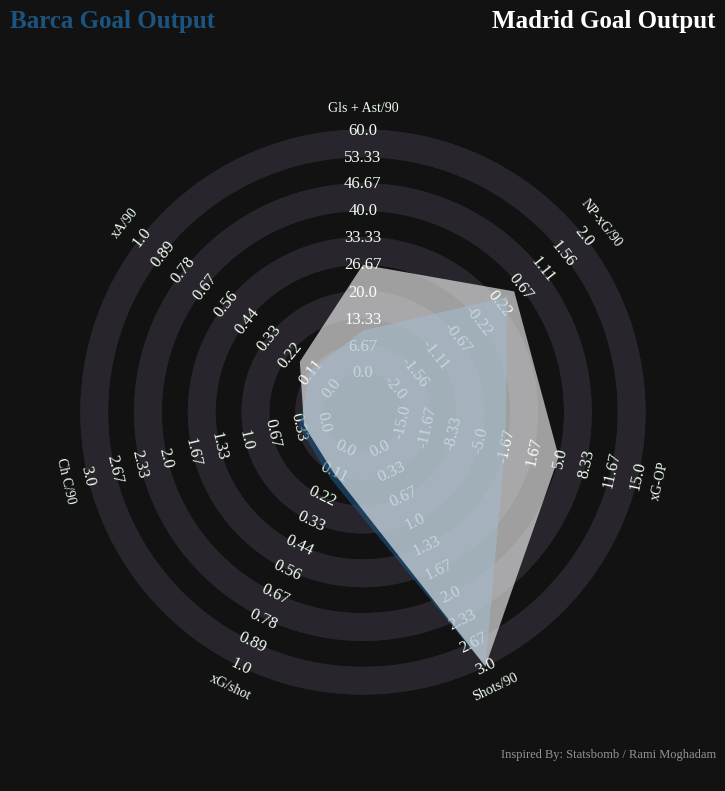

In [22]:
#squad avg vs Madrid

#Goal Contributions
categories = ['Gls + Ast/90', 'NP-xG/90', 'xG-OP', 'Shots/90','xG/shot', 'Ch C/90', 'xA/90']
ranges = [(0, 60), (-2, 2), (-15, 15), (0, 3), (0, 1), (0,3),(0,1)]

barca_att['Gls + Ast/90'] = pd.to_numeric(barca_att['Gls']) + pd.to_numeric(barca_att['Ast'])
barca_att['Shots/90'] = pd.to_numeric(barca_att['Shots']) / pd.to_numeric(barca_att['Mins']) * 90

barca_att_avg = barca_att[categories].apply(pd.to_numeric, errors='coerce').mean()
madrid_att['Gls + Ast/90'] = pd.to_numeric(madrid_att['Gls']) + pd.to_numeric(madrid_att['Ast'])
madrid_att['Shots/90'] = pd.to_numeric(madrid_att['Shots']) / pd.to_numeric(madrid_att['Mins']) * 90

madrid_att_avg = madrid_att[categories].apply(pd.to_numeric, errors='coerce').mean()

radar = Radar(range_fontsize=12,background_color="#121212", patch_color="#28252C", label_color="#F0FFF0",
              range_color="#F0FFF0")
values=[]
values.append(barca_att_avg)
values.append(madrid_att_avg)


title = dict(
    title_name='Barca Goal Output',
    title_color='#1c547f',
    title_name_2='Madrid Goal Output',
    title_color_2='white',
    title_fontsize=18,
    subtitle_fontsize=15,
)

fig, ax = radar.plot_radar(ranges = ranges, params=categories, values=values, radar_color=['#1c547f', 'white'], title=title, compare=True)
plt.show()

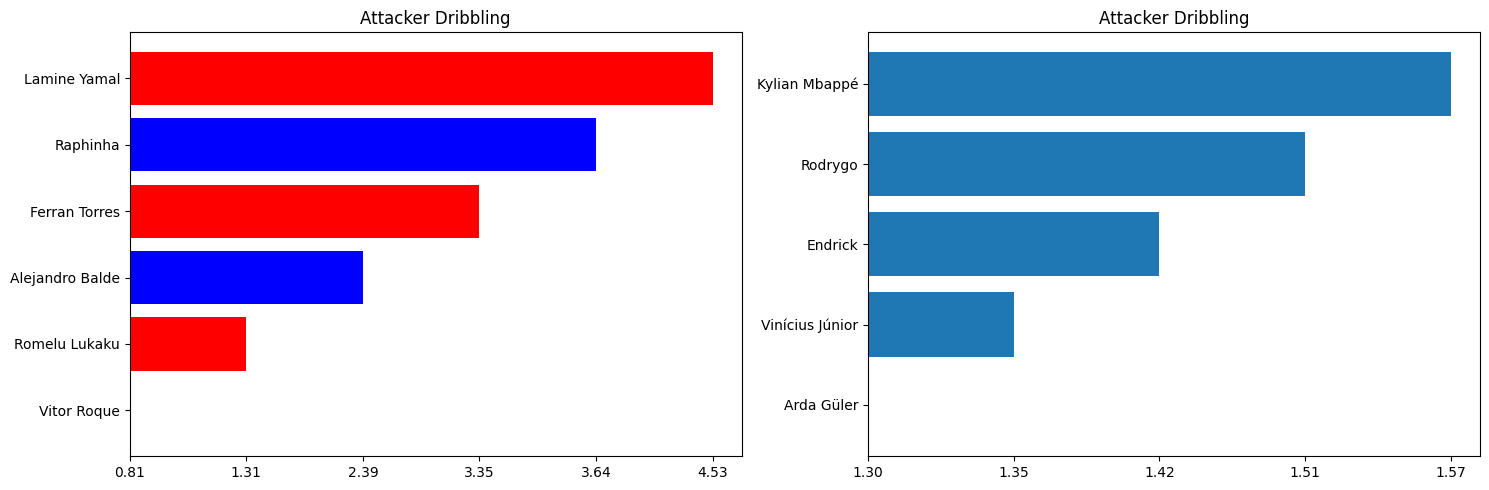

In [23]:
#Ball Carries


fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes[0].barh(y=barca_att.sort_values(by="Drb/90", ascending=True)['Name'], width=barca_att.sort_values(by="Drb/90", ascending=True)['Drb/90'], label='Dribbles per 90', color = ['blue', 'red'])
axes[0].set_title('Attacker Dribbling')

axes[1].barh(y=madrid_att.sort_values(by="Drb/90", ascending=True)['Name'], width=madrid_att.sort_values(by="Drb/90", ascending=True)['Drb/90'], label='Dribbles per 90')
axes[1].set_title('Attacker Dribbling')
plt.tight_layout()
plt.show()

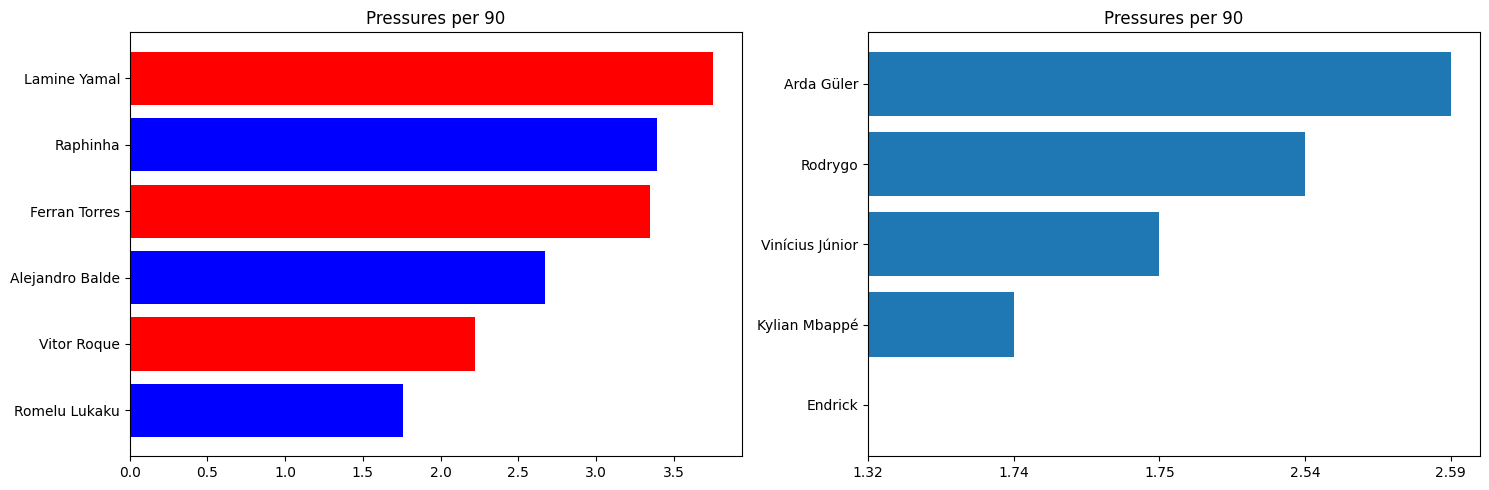

In [24]:
#Pressures

fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes[0].barh(y=barca_att.sort_values(by="Pres C/90", ascending=True)['Name'], width=barca_att.sort_values(by="Pres C/90", ascending=True)['Pres C/90'], label='Pressures per 90', color = ['blue', 'red'])
axes[0].set_title('Pressures per 90')

axes[1].barh(y=madrid_att.sort_values(by="Pres C/90", ascending=True)['Name'], width=madrid_att.sort_values(by="Pres C/90", ascending=True)['Pres C/90'], label='Pressures per 90')
axes[1].set_title('Pressures per 90')
plt.tight_layout()
plt.show()

Transfer Pool

In [25]:
transfer_pool = pd.read_excel('/content/drive/MyDrive/FM-data-project/season 24-25.xlsx')
transfer_pool.head()

Name                 Position  Age  Nat Height   Weight  \
0       Harry Kane          AM (LC), ST (C)   31  ENG   6'2"  189 lbs   
1      Bukayo Saka                  AM (RL)   23  ENG  5'10"  152 lbs   
2    Kylian Mbappé          AM (RL), ST (C)   26  FRA  5'10"  160 lbs   
3  Jude Bellingham             DM, M/AM (C)   21  ENG   6'1"  165 lbs   
4    Mohamed Salah  M (C), AM (RLC), ST (C)   32  EGY   5'9"  156 lbs   

          Personality            Club Transfer Value  Av Rat  ...  Svp  \
0  Model Professional  Bayern München   Not for Sale    7.40  ...    -   
1       Model Citizen         Arsenal   Not for Sale    7.58  ...    -   
2              Driven     Real Madrid  £131M - £394M    7.65  ...    -   
3       Perfectionist     Real Madrid  £120M - £359M    7.33  ...    -   
4       Model Citizen       Liverpool   Not for Sale    7.90  ...    -   

   All/90 Pens Saved Ratio          Division        Style  \
0       -                -        Bundesliga  Intelligent   
1       -                -    Premier League     Physical   
2       -                -  LALIGA EA SPORTS  Intelligent   
3       -                -  LALIGA EA SPORTS       Leader   
4       -                -    Premier League     Physical   

        Media Description  Media Handling Ch C/90  Ps A/90  Inf  
0       Legendary striker         Evasive    0.40    23.36  Inj  
1            Elite winger     Unflappable    0.26    41.31  Wnt  
2           Elite striker         Evasive    0.32    22.91  Inj  
3  World class midfielder         Evasive    0.32    50.89  NaN  
4        Legendary winger     Unflappable    0.23    43.42  NaN  

[5 rows x 121 columns]

In [26]:
#filter by defenders

tp_defenders = transfer_pool[transfer_pool['Position'].str.contains(r'\b(D|WB)\b')& ~(transfer_pool['Position'].str.contains(r'\b(M)\b'))]
tp_defenders = tp_defenders[tp_defenders['Transfer Value']!='Not for Sale']
tp_defenders['Int/90'] = tp_defenders['Int/90'].fillna('0').astype(str).str.replace('-', '0')
tp_defenders['Tck/90'] = tp_defenders['Tck/90'].fillna('0').astype(str).str.replace('-', '0')

tp_defenders['Defensive Actions'] = + pd.to_numeric(tp_defenders['Int/90']) + pd.to_numeric(tp_defenders['Tck/90'])

tp_defenders.head()

<ipython-input-26-17f8a3c3c42a>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tp_defenders = transfer_pool[transfer_pool['Position'].str.contains(r'\b(D|WB)\b')& ~(transfer_pool['Position'].str.contains(r'\b(M)\b'))]


Name        Position  Age  Nat Height   Weight  \
10          Rúben Dias           D (C)   28  POR   6'1"  180 lbs   
17    Matthijs de Ligt       D (C), DM   25  NED   6'2"  196 lbs   
27       Ronald Araujo  D (RC), WB (R)   26  URU   6'2"  200 lbs   
28         Kim Min-Jae           D (C)   28  KOR   6'3"  178 lbs   
47  Alessandro Bastoni           D (C)   26  ITA   6'3"  165 lbs   

     Personality            Club Transfer Value  Av Rat  ...  All/90  \
10  Professional        Man City  £118M - £354M    7.10  ...       -   
17  Professional  Bayern München   £90M - £271M    7.19  ...       -   
27        Driven       Barcelona   £68M - £204M    7.21  ...       -   
28        Driven  Bayern München   £43M - £129M    7.20  ...       -   
47      Spirited           Inter   £62M - £185M    7.08  ...       -   

    Pens Saved Ratio          Division      Style  Media Description  \
10                 -    Premier League     Leader  Elite center-back   
17                 -        Bundesliga     Leader  Elite center-back   
27                 -  LALIGA EA SPORTS     Leader  Elite center-back   
28                 -        Bundesliga     Leader  Elite center-back   
47                 -       Serie A TIM  Technical  Elite center-back   

       Media Handling  Ch C/90 Ps A/90  Inf Defensive Actions  
10        Unflappable     0.10   69.05  NaN              3.36  
17           Reserved     0.09   69.87  NaN              3.17  
27       Level-headed     0.07   69.38  NaN              2.99  
28            Evasive     0.09   69.53  NaN              3.02  
47  Evasive, Reserved     0.07   68.61  NaN              3.21  

[5 rows x 122 columns]

In [27]:
#filter for cb replacments
tp_cb = tp_defenders[pd.to_numeric(tp_defenders['Hdr %'].str.replace('%','').str.replace('-',"0"))> 65]

tp_cb = tp_cb[tp_cb['Defensive Actions']>3]
tp_cb = tp_cb[pd.to_numeric(tp_cb['Tck R'].str.replace('%','').str.replace('-',"0"))> 85]
tp_cb = tp_cb[tp_cb['Ps C/90']>60]
tp_cb

Name    Position  Age  Nat Height   Weight  \
28           Kim Min-Jae       D (C)   28  KOR   6'3"  178 lbs   
64        William Saliba       D (C)   24  FRA   6'4"  182 lbs   
76            Nathan Aké  D (LC), DM   30  NED  5'11"  165 lbs   
87       Dayot Upamecano   D (C), DM   26  FRA   6'1"  198 lbs   
111   Nico Schlotterbeck  D (LC), DM   25  GER   6'3"  187 lbs   
153           Marc Guéhi       D (C)   24  ENG   6'0"  176 lbs   
159       Pascal Struijk  D (LC), DM   25  BEL   6'3"  165 lbs   
418     Gianluca Mancini       D (C)   29  ITA   6'3"  180 lbs   
551      Ladislav Krejčí   D (C), DM   26  CZE   6'3"  191 lbs   
577    Jean-Clair Todibo       D (C)   25  FRA   6'3"  194 lbs   
615           Max Kilman       D (C)   28  ENG   6'4"  196 lbs   
885        Nicolò Casale       D (C)   27  ITA   6'3"  180 lbs   
922          Zeno Debast       D (C)   21  BEL   6'3"  160 lbs   
1433     Luke Woolfenden       D (C)   26  ENG   6'3"  176 lbs   

            Personality              Club Transfer Value  Av Rat  ...  All/90  \
28               Driven    Bayern München   £43M - £129M    7.20  ...       -   
64    Fairly Determined           Arsenal   £97M - £290M    7.20  ...       -   
76             Resolute          Man City    £28M - £84M    7.16  ...       -   
87    Fairly Determined    Bayern München   £82M - £245M    7.20  ...       -   
111                 NaN          Dortmund   £39M - £116M    7.21  ...       -   
153                 NaN    Crystal Palace    £21M - £64M    7.04  ...       -   
159                 NaN  Bayer Leverkusen    £23M - £69M    7.06  ...       -   
418                 NaN              Roma  £12.5M - £38M    6.82  ...       -   
551                 NaN            Girona    £15M - £44M    6.91  ...       -   
577                 NaN              Nice   £38M - £113M    7.08  ...       -   
615                 NaN            Wolves    £20M - £59M    6.84  ...       -   
885                 NaN             Lazio  £10.5M - £32M    6.94  ...       -   
922                 NaN        Anderlecht    £12M - £37M    6.86  ...       -   
1433                NaN      Ipswich Town   £7.6M - £23M    6.77  ...       -   

      Pens Saved Ratio            Division        Style  \
28                   -          Bundesliga       Leader   
64                   -      Premier League  Intelligent   
76                   -      Premier League  Intelligent   
87                   -          Bundesliga    Technical   
111                  -          Bundesliga       Leader   
153                  -      Premier League    Technical   
159                  -          Bundesliga     Physical   
418                  -         Serie A TIM       Leader   
551                  -    LALIGA EA SPORTS       Leader   
577                  -   Ligue 1 Uber Eats     Physical   
615                  -      Premier League    Technical   
885                  -         Serie A TIM     Physical   
922                  -  Jupiler Pro League    Technical   
1433                 -      Premier League    Technical   

                Media Description     Media Handling  Ch C/90 Ps A/90  Inf  \
28              Elite center-back            Evasive     0.09   69.53  NaN   
64              Elite center-back       Level-headed     0.04   70.98  NaN   
76              Elite center-back       Level-headed     0.04   67.79  Wnt   
87              Elite center-back     Media-friendly     0.20   66.16  Inj   
111             Elite center-back  Scouting Required     0.16   69.65  NaN   
153             Elite center-back  Scouting Required     0.10   69.89  Wnt   
159                   Center back  Scouting Required     0.08   66.77  Wnt   
418                   Center back  Scouting Required     0.11   68.59  Inj   
551   Strong defensive midfielder  Scouting Required     0.09   67.07  NaN   
577          Powerful center-back  Scouting Required     0.05   65.90  NaN   
615                   Center back  Scouting Required     0.06   64.81

Av Rat Hdr %  Defensive Actions Tck R  Ps C/90 Hdrs W/90 Pas % K Ps/90  \
28      7.20   76%               3.02   86%    65.80      5.18   95%    0.28   
64      7.20   75%               3.13   92%    65.82      5.30   93%    0.34   
76      7.16   74%               3.92   91%    63.58      4.21   94%    0.40   
87      7.20   71%               3.32   86%    62.44      4.36   94%    0.73   
111     7.21   74%               3.63   87%    65.48      5.40   94%    0.43   
153     7.04   74%               3.22   88%    65.49      5.05   94%    0.29   
159     7.06   74%               3.60   91%    62.14      5.32   93%    0.38   
418     6.82   73%               3.45   89%    65.14      5.09   95%    0.17   
551     6.91   73%               3.68   91%    62.09      3.59   93%    0.35   
577     7.08   67%               3.14   88%    61.21      4.29   93%    0.38   
615     6.84   68%               3.37   87%    60.14      3.82   93%    0.30   
885     6.94   79%               3.22   87%    61.01      5.53   92%    0.22   
922     6.86   66%               3.08   92%    61.36      4.05   93%    0.12   
1433    6.77   75%               3.46   94%    61.33      4.55   92%    0.28   

                    Name  
28           Kim Min-Jae  
64        William Saliba  
76            Nathan Aké  
87       Dayot Upamecano  
111   Nico Schlotterbeck  
153           Marc Guéhi  
159       Pascal Struijk  
418     Gianluca Mancini  
551      Ladislav Krejčí  
577    Jean-Clair Todibo  
615           Max Kilman  
885        Nicolò Casale  
922          Zeno Debast  
1433     Luke Woolfenden

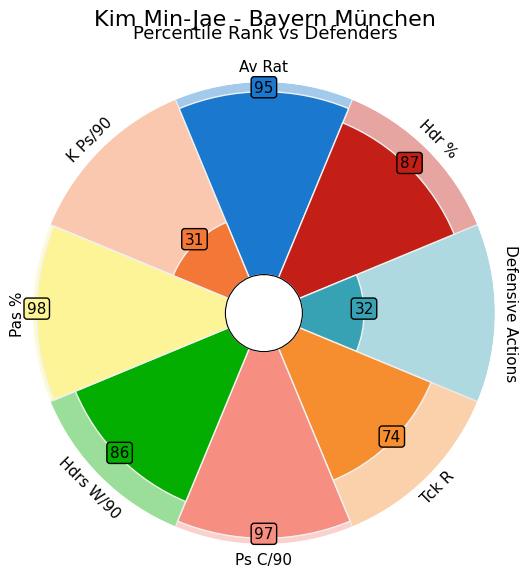

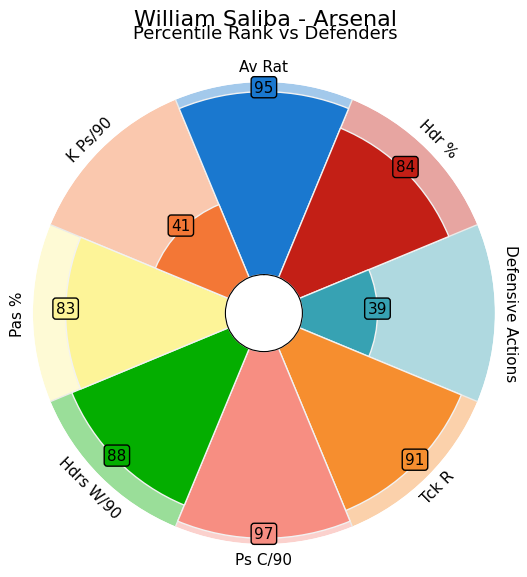

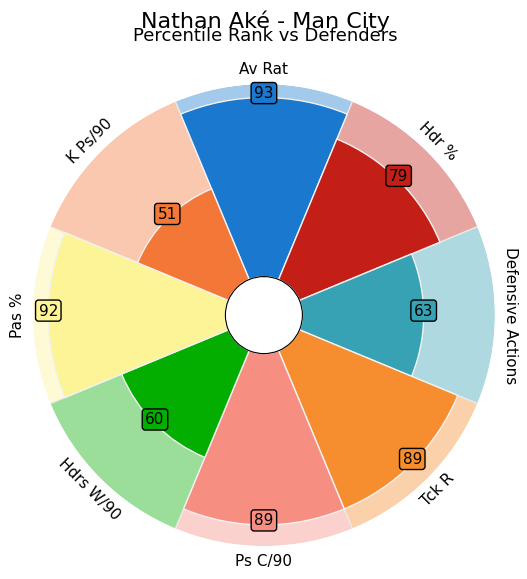

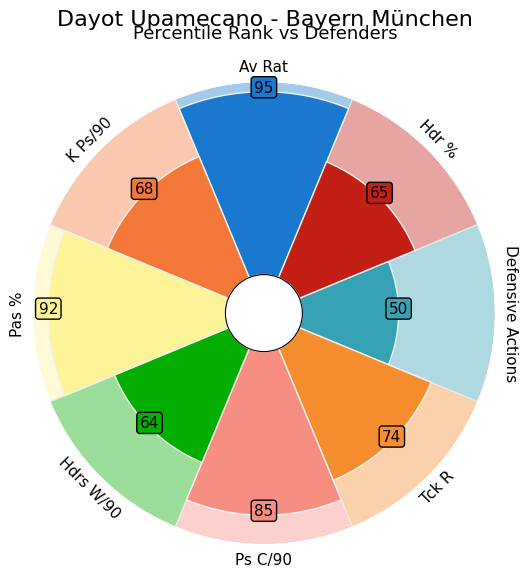

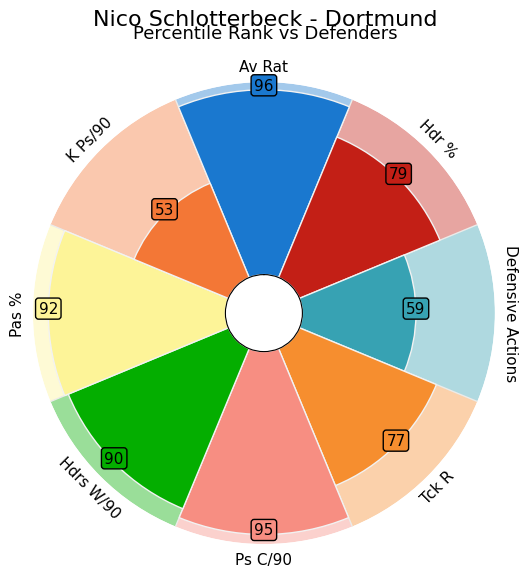

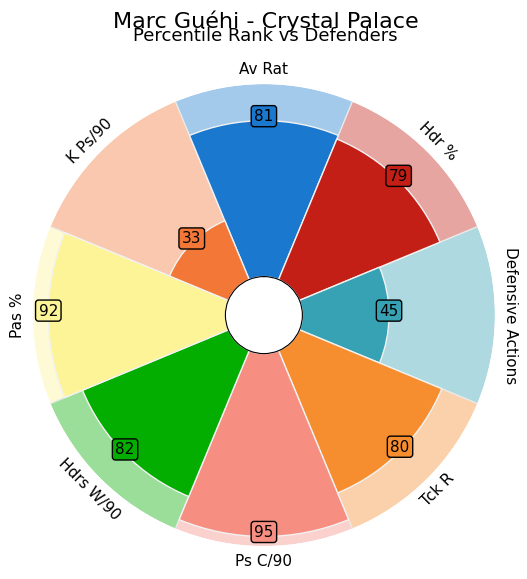

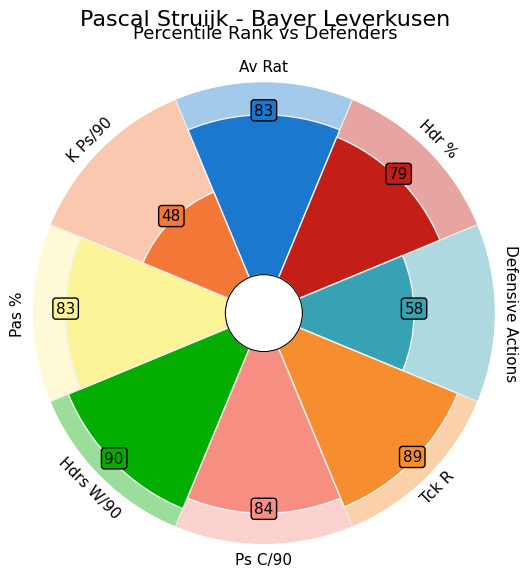

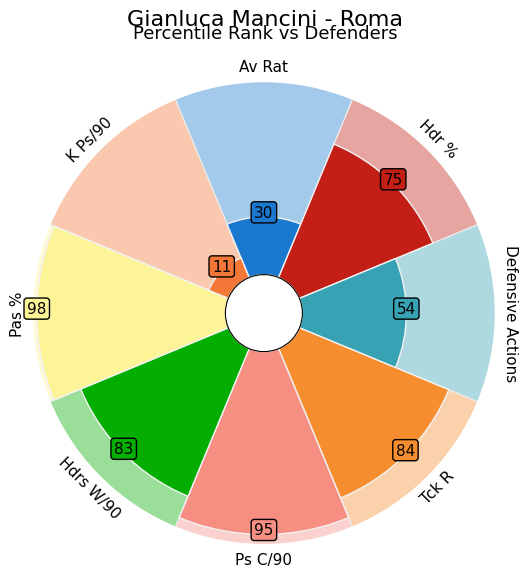

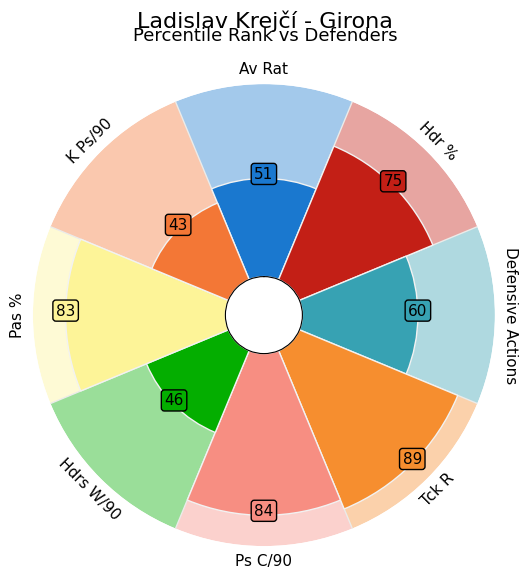

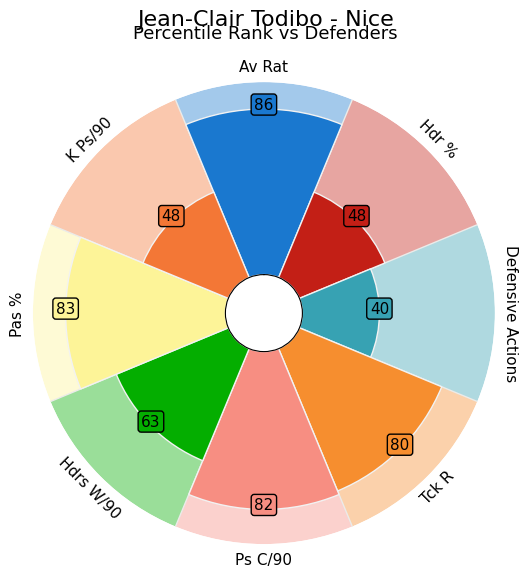

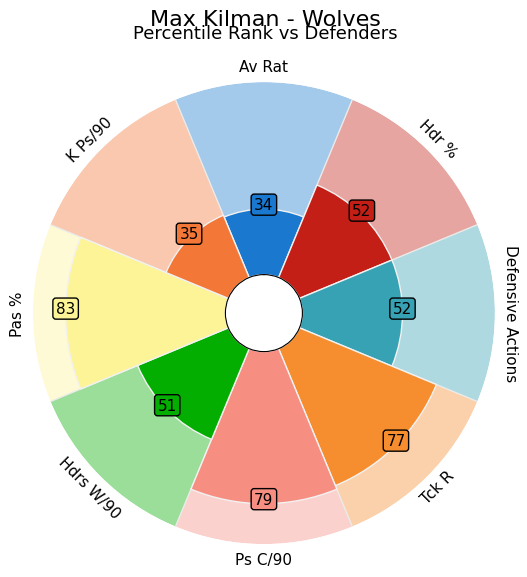

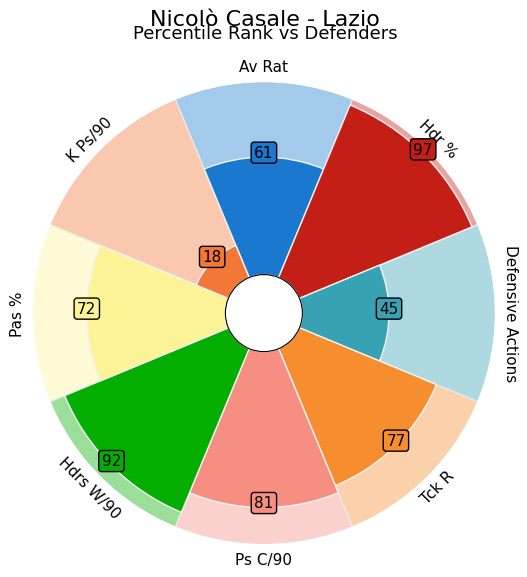

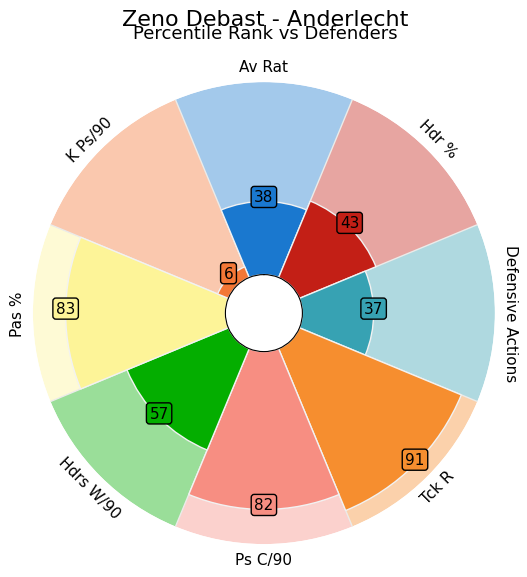

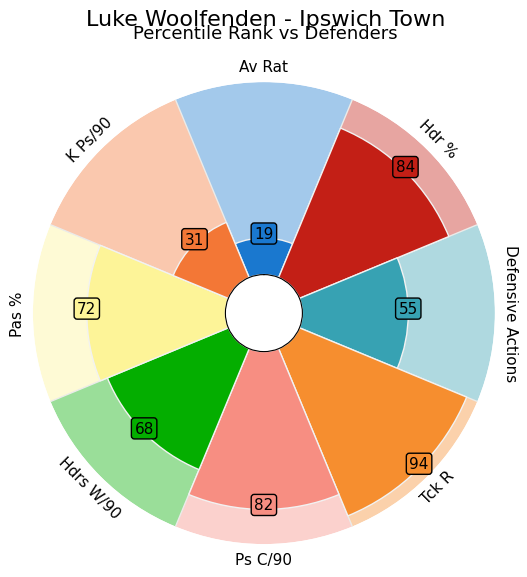

In [28]:
#Pizza Plot
from scipy import stats
import math
from mplsoccer import PyPizza
categories = ['Av Rat','Hdr %','Defensive Actions', 'Tck R', 'Ps C/90', 'Hdrs W/90', 'Pas %' ,'K Ps/90' ]
slice_colors = ["#1A78CF", "#c31f16","#37a2b3", "#f68e2f", "#f78e82", "#04ae00","#fdf498", "#f37736"]
text_colors = ["#000000"] * 8

baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

display(tp_cb[categories + ['Name']])


for index, row in tp_cb.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_defenders[category], row[category])))
  title = dict(
    title_name='Centre-Backs',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Defenders",
    size=13,
    ha="center", color="#000000"
  )
  plt.show()





In [29]:
#Filter further by avg rating
for index, row in tp_cb.iterrows():
  if math.floor(stats.percentileofscore(tp_defenders['Av Rat'], row['Av Rat']))<80:
    tp_cb = tp_cb.drop(index)
tp_cb

Name    Position  Age  Nat Height   Weight  \
28          Kim Min-Jae       D (C)   28  KOR   6'3"  178 lbs   
64       William Saliba       D (C)   24  FRA   6'4"  182 lbs   
76           Nathan Aké  D (LC), DM   30  NED  5'11"  165 lbs   
87      Dayot Upamecano   D (C), DM   26  FRA   6'1"  198 lbs   
111  Nico Schlotterbeck  D (LC), DM   25  GER   6'3"  187 lbs   
153          Marc Guéhi       D (C)   24  ENG   6'0"  176 lbs   
159      Pascal Struijk  D (LC), DM   25  BEL   6'3"  165 lbs   
577   Jean-Clair Todibo       D (C)   25  FRA   6'3"  194 lbs   

           Personality              Club Transfer Value  Av Rat  ...  All/90  \
28              Driven    Bayern München   £43M - £129M    7.20  ...       -   
64   Fairly Determined           Arsenal   £97M - £290M    7.20  ...       -   
76            Resolute          Man City    £28M - £84M    7.16  ...       -   
87   Fairly Determined    Bayern München   £82M - £245M    7.20  ...       -   
111                NaN          Dortmund   £39M - £116M    7.21  ...       -   
153                NaN    Crystal Palace    £21M - £64M    7.04  ...       -   
159                NaN  Bayer Leverkusen    £23M - £69M    7.06  ...       -   
577                NaN              Nice   £38M - £113M    7.08  ...       -   

     Pens Saved Ratio           Division        Style     Media Description  \
28                  -         Bundesliga       Leader     Elite center-back   
64                  -     Premier League  Intelligent     Elite center-back   
76                  -     Premier League  Intelligent     Elite center-back   
87                  -         Bundesliga    Technical     Elite center-back   
111                 -         Bundesliga       Leader     Elite center-back   
153                 -     Premier League    Technical     Elite center-back   
159                 -         Bundesliga     Physical           Center back   
577                 -  Ligue 1 Uber Eats     Physical  Powerful center-back   

        Media Handling  Ch C/90 Ps A/90  Inf Defensive Actions  
28             Evasive     0.09   69.53  NaN              3.02  
64        Level-headed     0.04   70.98  NaN              3.13  
76        Level-headed     0.04   67.79  Wnt              3.92  
87      Media-friendly     0.20   66.16  Inj              3.32  
111  Scouting Required     0.16   69.65  NaN              3.63  
153  Scouting Required     0.10   69.89  Wnt              3.22  
159  Scouting Required     0.08   66.77  Wnt              3.60  
577  Scouting Required     0.05   65.90  NaN              3.14  

[8 rows x 122 columns]

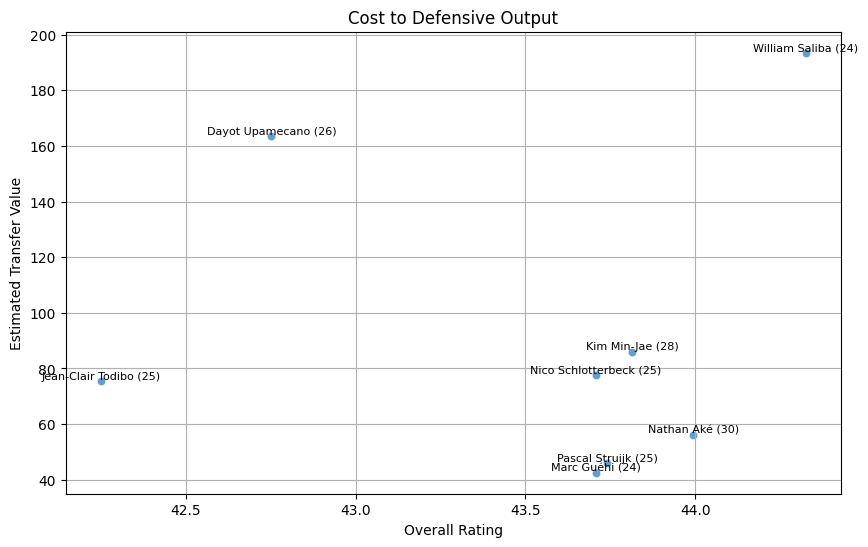

In [30]:
#Create overall rating and find best value
categories = ['Av Rat','Hdr %','Defensive Actions', 'Tck R', 'Ps C/90', 'Hdrs W/90', 'Pas %' ,'K Ps/90' ]
weights = {'Av Rat':1, "Hdr %" : .75, 'Pas %' : 1, 'Ps C/90':.75,  'K Ps/90': .4, 'Hdrs W/90': .75, 'Defensive Actions': 1.25, 'Tck R': 1}
rating = 0
total_weight = sum(weights.values())
tp_cb['Hdr %'] = tp_cb['Hdr %'].fillna('0').astype(str).str.replace('%','')
tp_cb['Pas %'] = tp_cb['Pas %'].fillna('0').astype(str).str.replace('%','')
tp_cb['Tck R'] = tp_cb['Tck R'].fillna('0').astype(str).str.replace('%','')
tp_cb[categories] = tp_cb[categories].apply(pd.to_numeric, errors='coerce')

for category in categories:
  rating += tp_cb[category] * weights[category]
  tp_cb['Overall Rating'] = (rating / total_weight)

tp_cb = tp_cb.sort_values(by='Overall Rating', ascending=False)

value = tp_cb['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')

mean_value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2)

tp_cb['Mean Value'] = mean_value

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_cb, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_cb.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Defensive Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show()

In [31]:
#look for back up full back
tp_fb = transfer_pool[transfer_pool['Position'].str.contains(r'\b(D|WB)\b')]
tp_fb = tp_fb[tp_fb['Transfer Value']!='Not for Sale']

tp_fb['Int/90'] = tp_fb['Int/90'].fillna('0').astype(str).str.replace('-', '0')
tp_fb['Tck/90'] = tp_fb['Tck/90'].fillna('0').astype(str).str.replace('-', '0')

tp_fb['Defensive Actions'] = + pd.to_numeric(tp_fb['Int/90']) + pd.to_numeric(tp_fb['Tck/90'])


tp_fb['Dist/90'] = tp_fb['Dist/90'].fillna('0').astype(str).str.replace('mi', '')
tp_fb['Drb/90'] = tp_fb['Drb/90'].fillna('0').astype(str).str.replace('-', '0')
tp_fb['Dist/90'] = tp_fb['Dist/90'].apply(pd.to_numeric, errors='coerce')
tp_fb['Tck R'] = tp_fb['Tck R'].fillna('0').astype(str).str.replace('%', '')
tp_fb['Tck R'] = pd.to_numeric(tp_fb['Tck R'])

tp_fb_choices = tp_fb[tp_fb['Defensive Actions']>5]
tp_fb_choices = tp_fb_choices[tp_fb_choices['Dist/90']>7]
tp_fb_choices = tp_fb_choices[tp_fb_choices['Tck R']>80]
tp_fb_choices = tp_fb_choices[pd.to_numeric(tp_fb_choices['Drb/90'])>1.8]
tp_fb_choices['K Ps/90'] = tp_fb_choices['K Ps/90'].fillna('0').astype(str).str.replace('-', '0')
tp_fb_choices['K Ps/90'] = pd.to_numeric(tp_fb_choices['K Ps/90'])
tp_fb_choices = tp_fb_choices[tp_fb_choices['K Ps/90']>.8]
tp_fb_choices = tp_fb_choices[tp_fb_choices['Position'].str.contains(r'\b(R)\b|\b(RL)\b|\b(R)\b(LR)\b')]



tp_fb_choices

Name           Position  Age  Nat Height   Weight  \
139         Reece James     D (RC), WB (R)   25  ENG  5'10"  200 lbs   
228   Yukinari Sugawara      D/WB/M/AM (R)   24  JPN  5'11"  154 lbs   
374     Josip Juranović     D (RL), WB (R)   29  CRO   5'8"  149 lbs   
413         Solly March  WB/M (RL), AM (R)   30  ENG  5'11"  160 lbs   
462          Max Aarons     D (RL), WB (R)   25  ENG   5'7"  138 lbs   
722              Juanlu      D/WB/M/AM (R)   21  ESP   6'1"  149 lbs   
862      Tyronne Ebuehi         D/WB/M (R)   29  NGA   6'2"  163 lbs   
925      Bryan Reynolds           D/WB (R)   23  USA   6'3"  171 lbs   
1115          Felix Agu          D/WB (RL)   25  NGA  5'11"  147 lbs   
1136       Marnon Busch           D/WB (R)   30  GER   6'0"  176 lbs   
1240  Rasmus Carstensen           D/WB (R)   24  DEN   6'0"  167 lbs   

     Personality           Club Transfer Value  Av Rat  ...  All/90  \
139          NaN        Chelsea   £58M - £173M    7.07  ...       -   
228          NaN     RB Leipzig  £15.5M - £47M    6.83  ...       -   
374          NaN   Union Berlin      £3M - £9M    7.07  ...       -   
413          NaN       Brighton   £34M - £102M    6.96  ...       -   
462          NaN    Bournemouth  £18.5M - £55M    7.09  ...       -   
722          NaN        Sevilla    £13M - £39M    6.99  ...       -   
862          NaN         Empoli  £1.8M - £5.4M    6.77  ...       -   
925          NaN       Westerlo   £6.4M - £19M    7.08  ...       -   
1115         NaN  Werder Bremen  £1.4M - £4.3M    6.79  ...       -   
1136         NaN     Heidenheim  £2.5M - £7.4M    6.89  ...       -   
1240         NaN           Genk  £2.5M - £7.6M    7.06  ...       -   

      Pens Saved Ratio            Division      Style    Media Description  \
139                  -      Premier League   Physical      Elite full-back   
228                  -          Bundesliga  Technical             Fullback   
374                  -          Bundesliga     Leader             Fullback   
413                  -      Premier League  Technical               Winger   
462                  -      Premier League  Technical             Fullback   
722                  -    LALIGA EA SPORTS   Physical  Attacking full back   
862                  -         Serie A TIM   Physical             Fullback   
925                  -  Jupiler Pro League   Physical             Fullback   
1115                 -          Bundesliga  Technical             Fullback   
1136                 -          Bundesliga   Physical             Fullback   
1240                 -  Jupiler Pro League   Physical             Fullback   

         Media Handling  Ch C/90 Ps A/90  Inf Defensive Actions  
139   Scouting Required     0.06   57.97  NaN              5.26  
228   Scouting Required     0.26   44.29  NaN              6.32  
374   Scouting Required     0.16   47.39  Wnt              5.63  
413   Scouting Required     0.13   43.56  NaN              5.43  
462   Scouting Required     0.23   57.59  Wnt              5.30  
722   Scouting Required     0.10   41.08  Wnt              5.36  
862   Scouting Required     0.13   38.19  Inj              5.63  
925   Scouting Required     0.22   47.25  Inj              5.10  
1115  Scouting Required     0.20   36.90  NaN              5.07  
1136  Scouting Required     0.11   47.36  NaN              5.17  
1240  Scouting Required     0.30   44.82  NaN              5.08  

[11 rows x 122 columns]

Av Rat  Defensive Actions  Tck R  Dist/90  K Ps/90               Name
139     7.07               5.26     86      7.6     0.86        Reece James
228     6.83               6.32     85      8.2     1.60  Yukinari Sugawara
374     7.07               5.63     85      8.0     2.74    Josip Juranović
413     6.96               5.43     83      8.0     1.63        Solly March
462     7.09               5.30     82      7.9     1.03         Max Aarons
722     6.99               5.36     81      8.2     1.46             Juanlu
862     6.77               5.63     83      7.8     0.90     Tyronne Ebuehi
925     7.08               5.10     86      7.4     0.91     Bryan Reynolds
1115    6.79               5.07     82      7.8     1.11          Felix Agu
1136    6.89               5.17     82      8.0     0.87       Marnon Busch
1240    7.06               5.08     85      7.9     0.89  Rasmus Carstensen

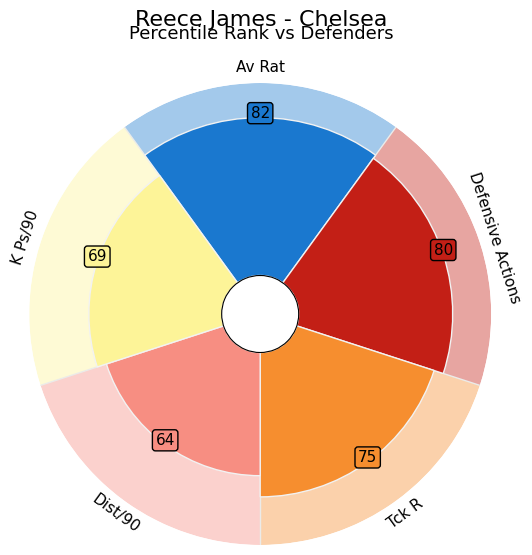

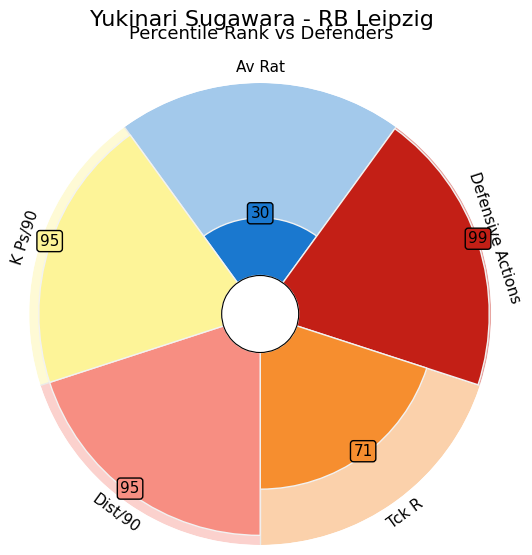

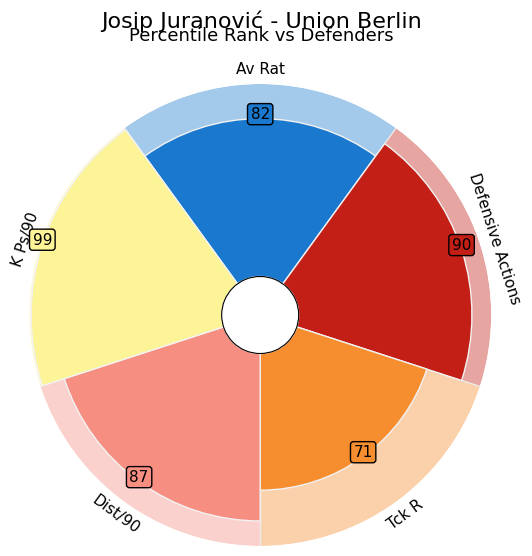

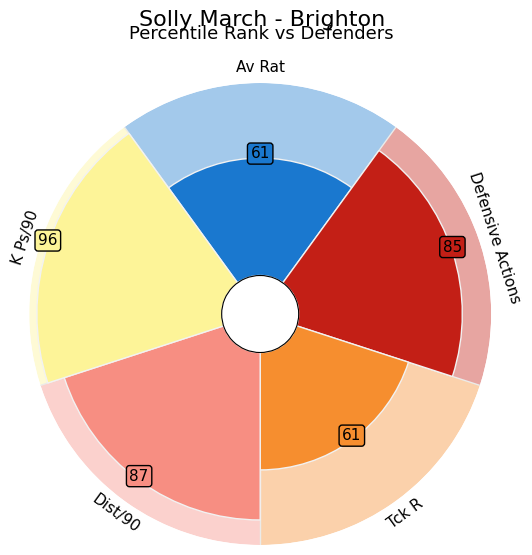

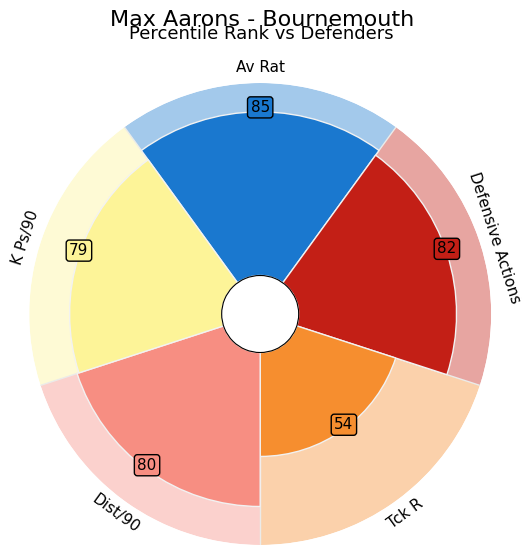

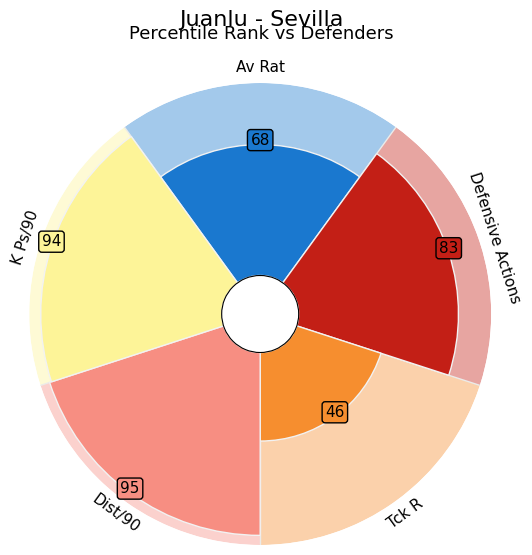

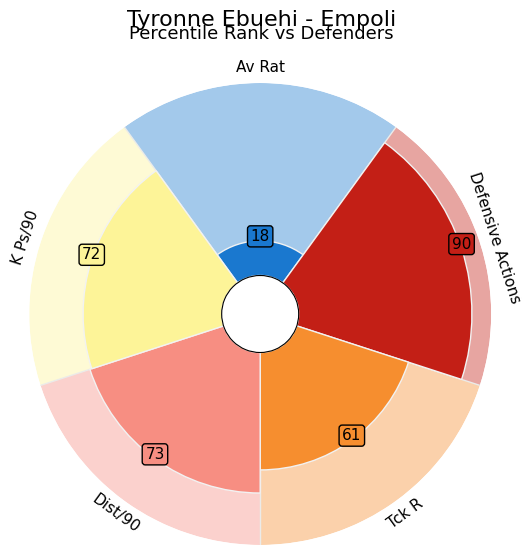

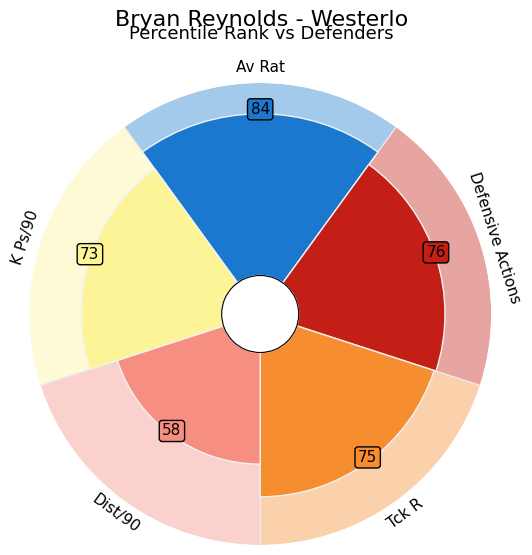

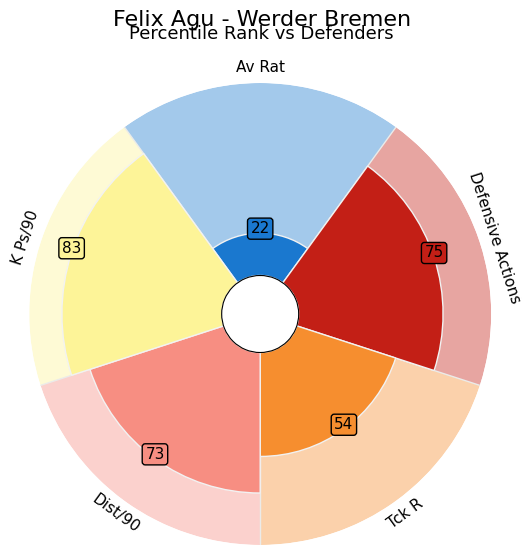

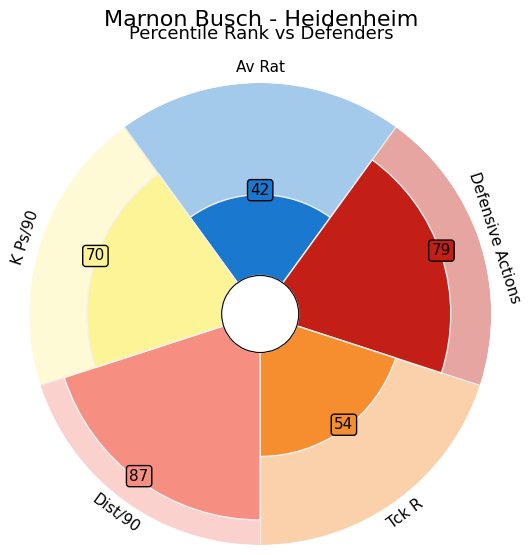

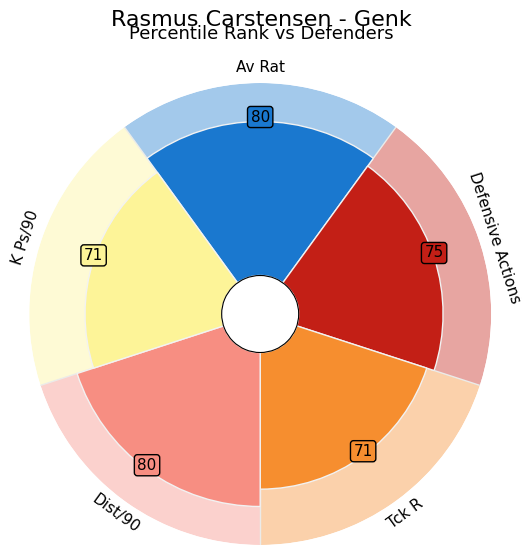

In [32]:
#Plot fullbacks
categories = ['Av Rat','Defensive Actions', 'Tck R', "Dist/90",'K Ps/90' ]

slice_colors = ["#1A78CF", "#c31f16", "#f68e2f", "#f78e82","#fdf498"]
text_colors = ["#000000"] * 5

baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

display(tp_fb_choices[categories + ['Name']])
tp_fb_choices[categories] = tp_fb_choices[categories].apply(pd.to_numeric, errors='coerce')
for category in categories:
    tp_fb[category] = tp_fb[category].fillna('0').astype(str).str.replace('-', '0')
    tp_fb[category] = pd.to_numeric(tp_fb[category], errors='coerce')

for index, row in tp_fb_choices.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_fb[category], row[category])))
  title = dict(
    title_name='Defensive Mids',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Defenders",
    size=13,
    ha="center", color="#000000"
  )
  plt.show()

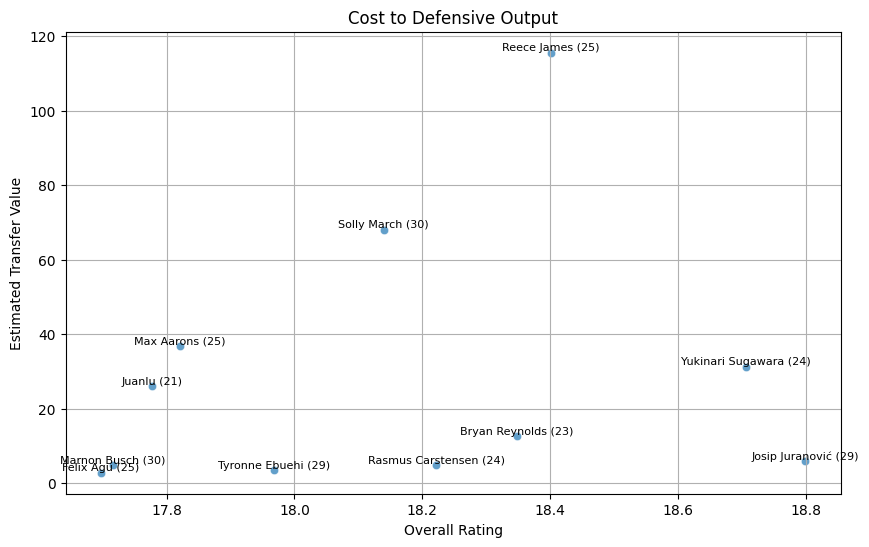

In [33]:
categories = ['Av Rat','Defensive Actions', 'Tck R', "Dist/90",'K Ps/90' ]
weights = {'Av Rat':1, "Defensive Actions" : 1.25, 'Tck R' : .75,  'K Ps/90': 1, 'Dist/90':.5}
total_weight = sum(weights.values())
rating = 0
for category in categories:
  rating += tp_fb_choices[category] * weights[category]
  tp_fb_choices['Overall Rating'] = (rating / total_weight)

value = tp_fb_choices['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')

mean_value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2)

tp_fb_choices['Mean Value'] = mean_value

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_fb_choices, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_fb_choices.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Defensive Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show()

In [34]:
#filter by midfielders
tp_mids = transfer_pool[transfer_pool['Position'].str.contains(r'\b(DM|M\s*\(C\))\b') |
     (transfer_pool['Position'].str.contains(r'\bAM\b') &
      ~transfer_pool['Position'].str.contains(r'AM\s*\((R|L|RL)\)'))&~transfer_pool['Position'].str.contains(r'\bST\b')
]
tp_mids['Int/90'] = tp_mids['Int/90'].fillna('0').astype(str).str.replace('-', '0')
tp_mids['Tck/90'] = tp_mids['Tck/90'].fillna('0').astype(str).str.replace('-', '0')
tp_mids['Mins'] = tp_mids['Mins'].str.replace(',', '')
tp_mids['Defensive Actions'] = + pd.to_numeric(tp_mids['Int/90']) + pd.to_numeric(tp_mids['Tck/90'])

tp_mids['Ch C/90'] = tp_mids['Ch C/90'].fillna('0').astype(str).str.replace('-', '0')
tp_mids['K Ps/90'] = tp_mids['K Ps/90'].fillna('0').astype(str).str.replace('-', '0')
tp_mids['xG/90'] = (pd.to_numeric(tp_mids['xG']) / pd.to_numeric(tp_mids['Mins'])) * 90
tp_mids['KP+CC'] = pd.to_numeric(tp_mids["Ch C/90"]) + pd.to_numeric(tp_mids["K Ps/90"])
tp_mids = tp_mids[tp_mids['Transfer Value']!='Not for Sale']
tp_mids

<ipython-input-34-9dba49a7905c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_mids['Int/90'] = tp_mids['Int/90'].fillna('0').astype(str).str.replace('-', '0')
<ipython-input-34-9dba49a7905c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_mids['Tck/90'] = tp_mids['Tck/90'].fillna('0').astype(str).str.replace('-', '0')
<ipython-input-34-9dba49a7905c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Name          Position  Age  Nat Height   Weight  \
3         Jude Bellingham      DM, M/AM (C)   21  ENG   6'1"  165 lbs   
11             Phil Foden   M (C), AM (RLC)   25  ENG   5'7"  141 lbs   
15            Declan Rice  D (C), DM, M (C)   26  ENG   6'1"  176 lbs   
17       Matthijs de Ligt         D (C), DM   25  NED   6'2"  196 lbs   
18             Leroy Sané  M (RL), AM (RLC)   29  GER   6'0"  176 lbs   
...                   ...               ...  ...  ...    ...      ...   
1487          Matte Smets         D (C), DM   21  BEL   6'0"  167 lbs   
1488    Riccardo Fogliata          M/AM (C)   21  ITA   6'0"  171 lbs   
1496             Sem Valk         D (C), DM   23  NED   6'5"  189 lbs   
1500          Ryotaro Ito            AM (C)   27  JPN   5'9"  136 lbs   
1503  Joep van der Sluijs           AM (LC)   23  NED  5'11"  165 lbs   

           Personality            Club Transfer Value  Av Rat  ...  \
3        Perfectionist     Real Madrid  £120M - £359M    7.33  ...   
11    Fairly Ambitious        Man City   £80M - £239M    7.67  ...   
15       Light-Hearted         Arsenal  £139M - £417M    7.29  ...   
17        Professional  Bayern München   £90M - £271M    7.19  ...   
18    Fairly Ambitious  Bayern München  £105M - £314M    7.60  ...   
...                ...             ...            ...     ...  ...   
1487               NaN    Sint-Truiden  £475K - £1.4M    6.70  ...   
1488               NaN         Brescia  £1.4M - £4.3M    6.76  ...   
1496               NaN    FC Groningen  £240K - £750K    6.27  ...   
1500               NaN    Sint-Truiden    £350K - £1M    6.74  ...   
1503               NaN  Almere City FC  £110K - £350K    6.74  ...   

                Division        Style           Media Description  \
3       LALIGA EA SPORTS       Leader      World class midfielder   
11        Premier League    Technical  Elite attacking midfielder   
15        Premier League  Intelligent            Elite midfielder   
17            Bundesliga       Leader           Elite center-back   
18            Bundesliga     Creative                Elite winger   
...                  ...          ...                         ...   
1487  Jupiler Pro League       Leader                 Center back   
1488         Serie A TIM     Physical                  Midfielder   
1496          Eredivisie     Physical                 Center back   
1500  Jupiler Pro League  Intelligent                  Midfielder   
1503          Eredivisie     Creative                      Winger   

         Media Handling Ch C/90 Ps A/90  Inf Defensive Actions     xG/90 KP+CC  
3               Evasive    0.32   50.89  NaN              3.88  0.341634  2.09  
11         Level-headed    0.47   42.27  NaN              3.99  0.364522  2.47  
15    Evasive, Reserved    0.23   54.46  NaN              3.74  0.091543  1.65  
17             Reserved    0.09   69.87  NaN              3.17  0.053262  0.33  
18       Media-friendly    0.60   35.08  NaN              4.98  0.192332  3.54  
...                 ...     ...     ...  ...               ...       ...   ...  
1487  Scouting Required    0.19   51.38  NaN              2.74  0.094968  0.46  
1488  Scouting Required    0.32   44.48  NaN              3.64  0.034104  1.53  
1496  Scouting Required    0.03   40.00  NaN              2.23  0.048387  0.19  
1500  Scouting Required    0.14   30.85  NaN              3.02  0.076229  0.86  
1503  Scouting Required    0.04   22.74  NaN              0.97  0.227787  0.04  

[439 rows x 124 columns]

In [35]:
categories = ['Defensive Actions', 'Tck R', "Dist/90",'Pas %' ,'KP+CC' ]
tp_dm = tp_mids
tp_dm['Pas %'] = tp_dm['Pas %'].fillna('0').astype(str).str.replace('%','')
tp_dm['Tck R'] = tp_dm['Tck R'].fillna('0').astype(str).str.replace('%','')
tp_dm['Dist/90'] = tp_dm['Dist/90'].fillna('0').astype(str).str.replace('mi', '')
tp_dm['Int/90'] = tp_dm['Int/90'].fillna('0').astype(str).str.replace('-', '0')
tp_dm['Tck/90'] = tp_dm['Tck/90'].fillna('0').astype(str).str.replace('-', '0')
tp_dm[categories] = tp_dm[categories].apply(pd.to_numeric, errors='coerce')

tp_dm = tp_dm[tp_dm['Defensive Actions']>3]
tp_dm = tp_dm[tp_dm['Tck R']>78]
tp_dm = tp_dm[tp_dm['Dist/90']>8]
tp_dm = tp_dm[tp_dm['Pas %']>88]
tp_dm = tp_dm[tp_dm['KP+CC']>1.3]


tp_dm

Name            Position  Age  Nat Height   Weight  \
123      Aurélien Tchouameni           DM, M (C)   25  FRA   6'2"  180 lbs   
158            Manuel Ugarte           DM, M (C)   24  URU   6'0"  169 lbs   
174         Matteo Guendouzi           DM, M (C)   26  FRA   6'1"  147 lbs   
179              Roméo Lavia           DM, M (C)   21  BEL   6'0"  174 lbs   
253         Samuel Gustafson  DM, M (RC), AM (C)   30  SWE   6'1"  176 lbs   
261            Kobbie Mainoo        DM, M/AM (C)   20  ENG  5'11"  152 lbs   
262           Yangel Herrera           DM, M (C)   27  VEN   6'0"  169 lbs   
286             Amadou Onana           DM, M (C)   23  BEL   6'4"  167 lbs   
407              Javi Guerra        DM, M/AM (C)   22  ESP   6'2"  167 lbs   
437         Brenden Aaronson      M (C), AM (RC)   24  USA  5'10"  149 lbs   
545           Nicolò Rovella           DM, M (C)   23  ITA  5'10"  154 lbs   
546        Maximilian Arnold           DM, M (C)   31  GER   6'0"  163 lbs   
794            Niklas Dorsch           DM, M (C)   27  GER   5'9"  167 lbs   
1000        Mathieu Maertens              AM (C)   30  BEL   6'0"  156 lbs   
1005            Umut Tohumcu           DM, M (C)   20  GER   6'1"  165 lbs   
1010  Hannes Van Der Bruggen           DM, M (C)   32  BEL  5'10"  158 lbs   
1384       Cameron Humphreys           DM, M (C)   21  ENG  5'10"  134 lbs   

     Personality                 Club  Transfer Value  Av Rat  ...  \
123          NaN          Real Madrid    £60M - £181M    7.03  ...   
158          NaN  Paris Saint-Germain   £122M - £365M    7.20  ...   
174          NaN                Lazio     £31M - £93M    7.15  ...   
179          NaN              Chelsea    £47M - £141M    6.92  ...   
253          NaN                 Nice   £15.5M - £46M    6.98  ...   
261          NaN              Man Utd    £72M - £217M    6.96  ...   
262          NaN               Girona     £18M - £54M    6.99  ...   
286          NaN              Everton     £25M - £75M    6.79  ...   
407          NaN             Valencia     £27M - £82M    7.03  ...   
437          NaN            Leeds Utd     £26M - £79M    6.87  ...   
545          NaN                Lazio    £7.2M - £22M    6.92  ...   
546          NaN            Wolfsburg    £9.2M - £28M    6.92  ...   
794          NaN             Augsburg  £5.4M - £16.5M    6.93  ...   
1000         NaN            OH Leuven   £750K - £2.2M    6.88  ...   
1005         NaN               Bochum   £1.1M - £3.4M    6.80  ...   
1010         NaN        Cercle Brugge     £24K - £70K    6.97  ...   
1384         NaN         Ipswich Town   £18.5M - £55M    6.90  ...   

                Division        Style        Media Description  \
123     LALIGA EA SPORTS     Physical   World class midfielder   
158    Ligue 1 Uber Eats       Leader         Elite midfielder   
174          Serie A TIM    Technical   World class midfielder   
179       Premier League     Physical         Elite midfielder   
253    Ligue 1 Uber Eats    Technical     Defensive midfielder   
261       Premier League     Physical                Wonderkid   
262     LALIGA EA SPORTS       Leader               Midfielder   
286       Premier League     Physical     Defensive midfielder   
407     LALIGA EA SPORTS  Intelligent  Hard working midfielder   
437       Premier League     Physical     Attacking midfielder   
545          Serie A TIM       Leader     Defensive midfielder   
546           Bundesliga       Leader      Tireless midfielder   
794           Bundesliga       Leader     Defensive midfielder   
1000  Jupiler Pro League       Leader               Midfielder   
1005          Bundesliga    Technical               Midfielder   
1010  Jupiler Pro League       Leader               Midfielder   
1384      Premier League    Technical     Defensive midfielder   

         Media Handling Ch C/90 Ps A/90  Inf Defensive Actions     xG/90  \
123   Scouting Required    0.52   55.32  NaN              3.77  0.167570   
158   Scouting Re

Av Rat  Defensive Actions  Tck R  Dist/90  Pas %  KP+CC  \
123     7.03               3.77     80      8.1     90   2.00   
158     7.20               4.02     83      8.4     91   1.31   
174     7.15               3.82     84      8.3     92   1.80   
179     6.92               3.70     80      8.2     89   1.55   
253     6.98               3.86     80      8.1     91   3.09   
261     6.96               4.19     80      8.1     90   1.38   
262     6.99               4.30     92      8.3     90   1.32   
286     6.79               4.18     82      8.3     90   1.45   
407     7.03               3.50     84      8.1     90   1.89   
437     6.87               3.40     88      8.4     89   1.58   
545     6.92               4.30     83      8.2     89   1.43   
546     6.92               4.25     85      8.1     90   2.49   
794     6.93               4.03     81      8.2     90   1.41   
1000    6.88               3.58     81      8.1     89   1.51   
1005    6.80               4.21     88      8.1     91   1.98   
1010    6.97               3.86     83      8.4     91   1.63   
1384    6.90               3.56     84      8.1     89   1.72   

                        Name  
123      Aurélien Tchouameni  
158            Manuel Ugarte  
174         Matteo Guendouzi  
179              Roméo Lavia  
253         Samuel Gustafson  
261            Kobbie Mainoo  
262           Yangel Herrera  
286             Amadou Onana  
407              Javi Guerra  
437         Brenden Aaronson  
545           Nicolò Rovella  
546        Maximilian Arnold  
794            Niklas Dorsch  
1000        Mathieu Maertens  
1005            Umut Tohumcu  
1010  Hannes Van Der Bruggen  
1384       Cameron Humphreys

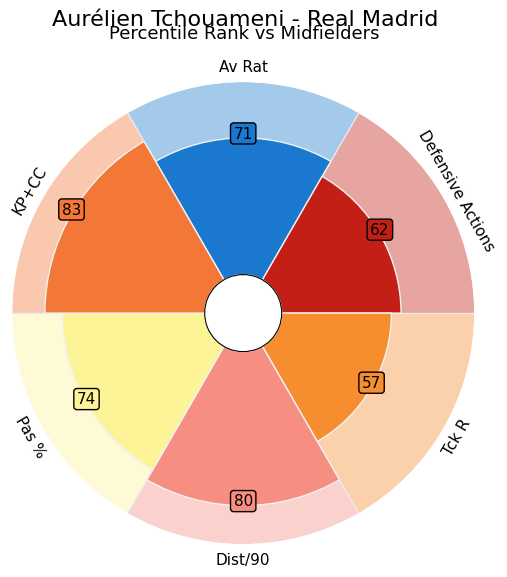

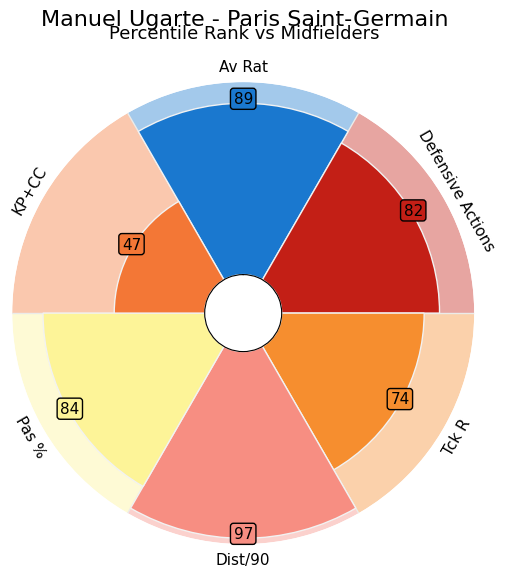

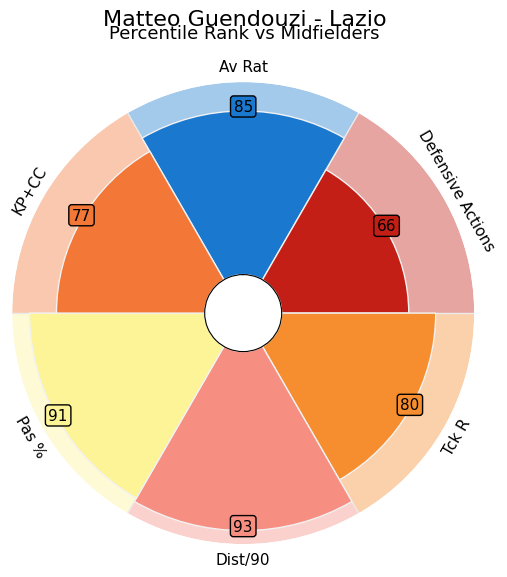

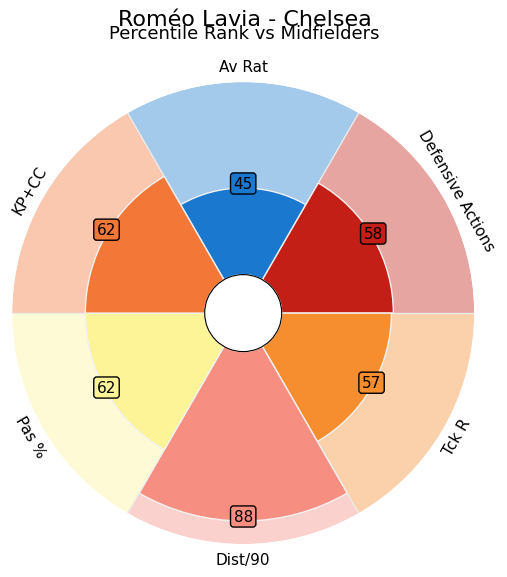

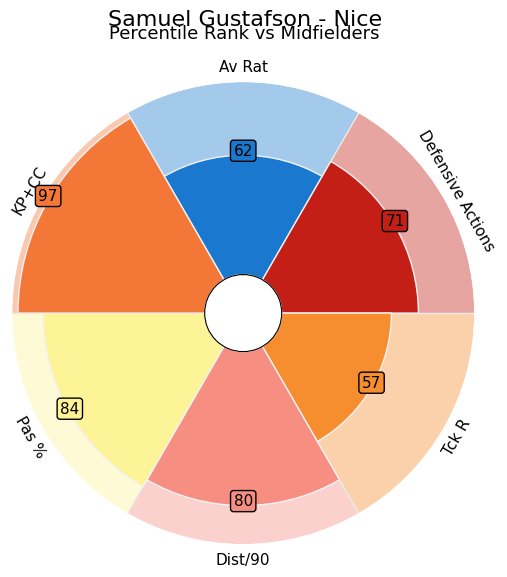

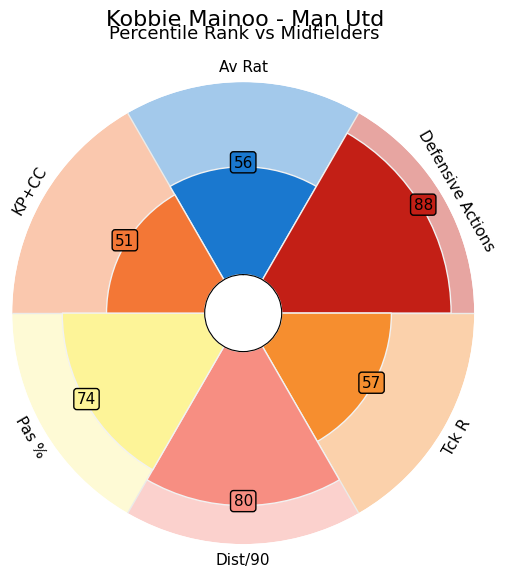

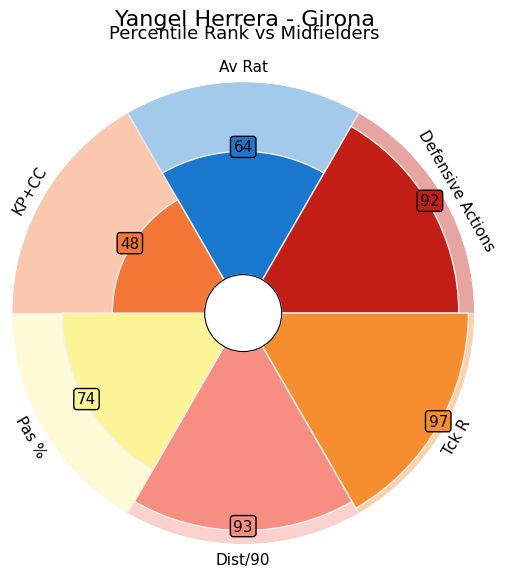

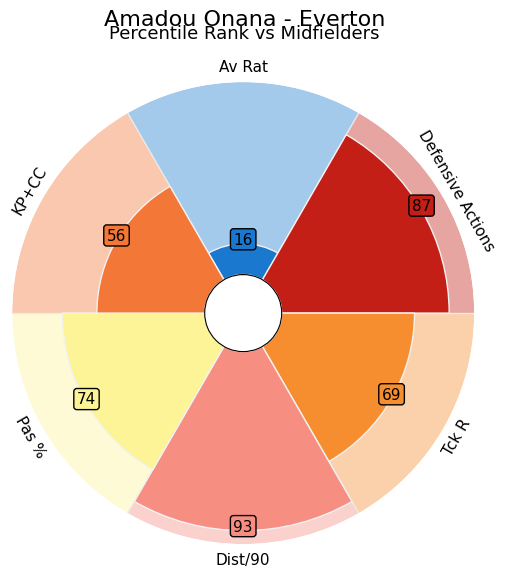

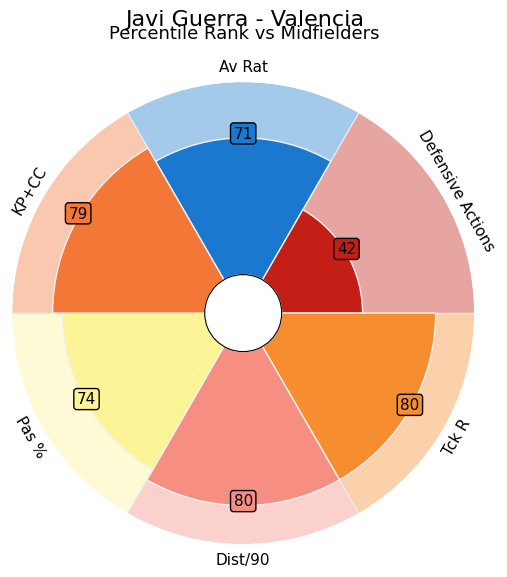

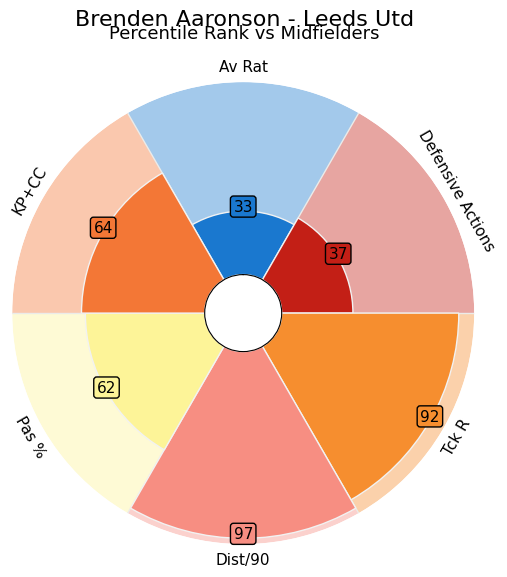

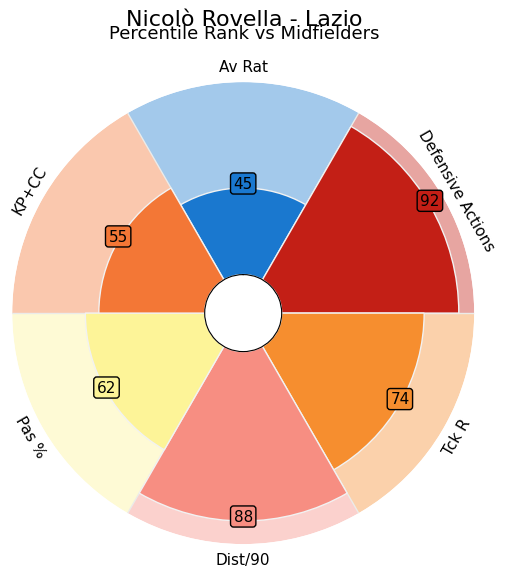

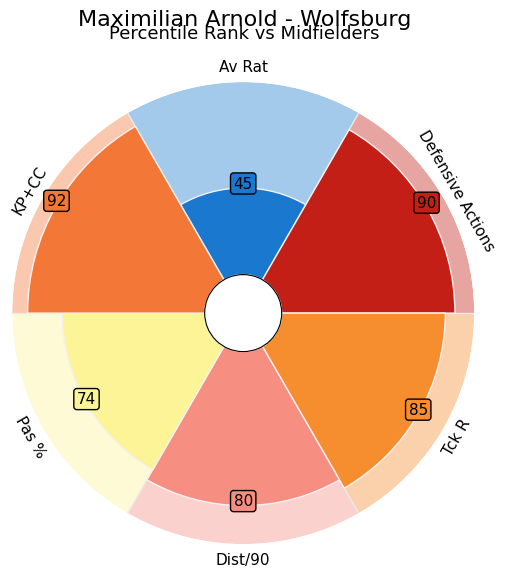

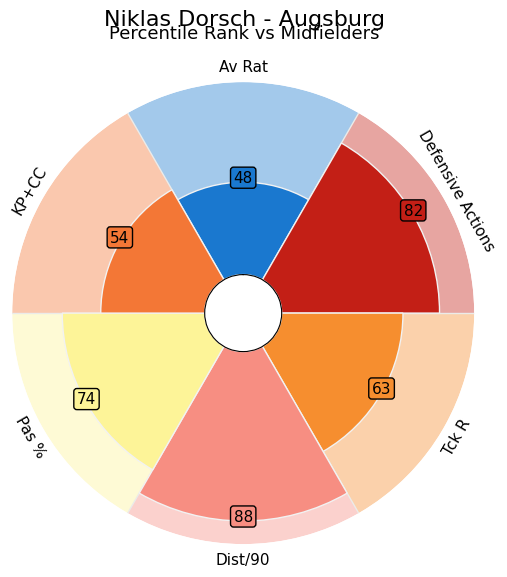

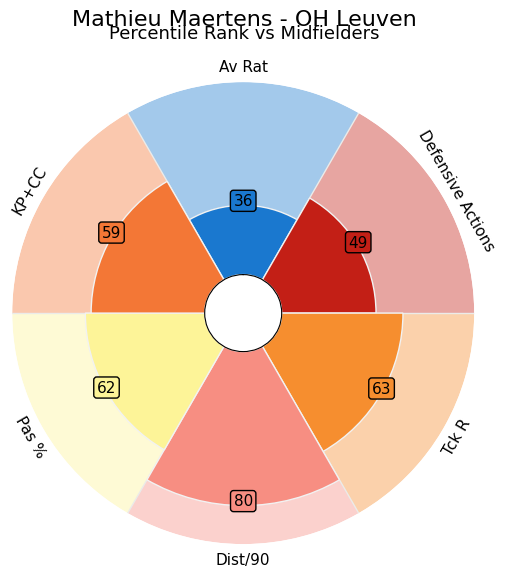

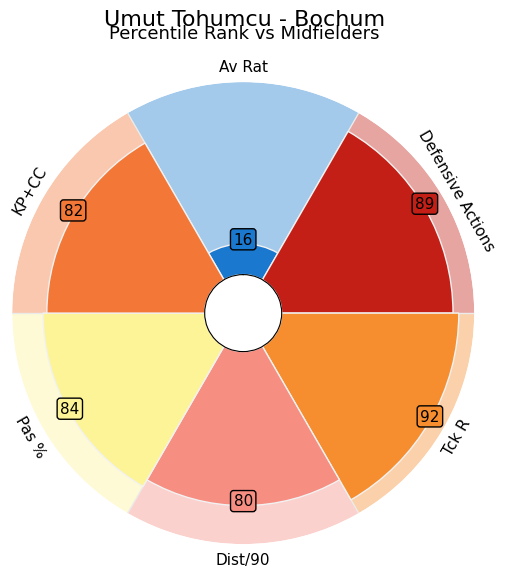

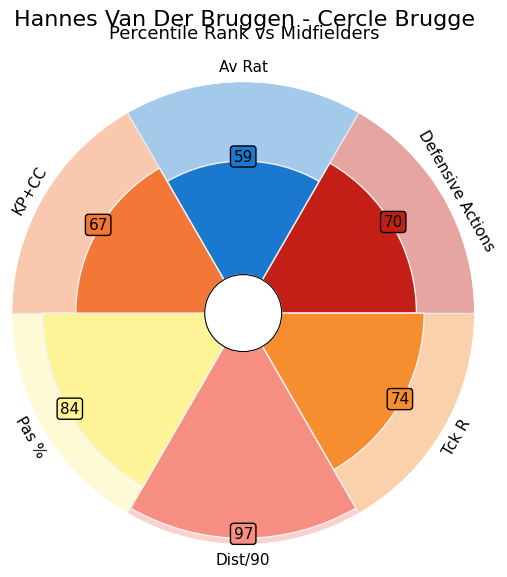

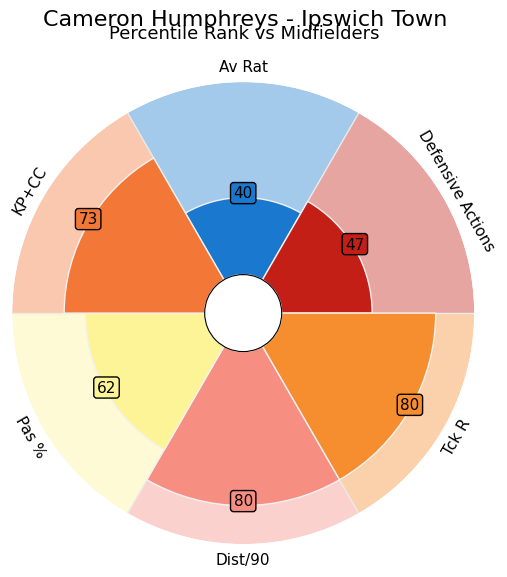

In [36]:
categories = ['Av Rat','Defensive Actions', 'Tck R', "Dist/90",'Pas %' ,'KP+CC' ]

slice_colors = ["#1A78CF", "#c31f16", "#f68e2f", "#f78e82","#fdf498", "#f37736"]
text_colors = ["#000000"] * 6

baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

display(tp_dm[categories + ['Name']])
tp_dm[categories].apply(pd.to_numeric, errors='coerce')
tp_mids[categories] = tp_mids[categories].apply(pd.to_numeric, errors='coerce')
for index, row in tp_dm.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_mids[category], row[category])))
  title = dict(
    title_name='Defensive Mids',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Midfielders",
    size=13,
    ha="center", color="#000000"
  )
  plt.show()

<ipython-input-37-9d6c6737110f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_dm_choices[categories] = tp_dm_choices[categories].apply(pd.to_numeric, errors='coerce')
<ipython-input-37-9d6c6737110f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_dm_choices['Overall Rating'] = (rating / total_weight)
<ipython-input-37-9d6c6737110f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

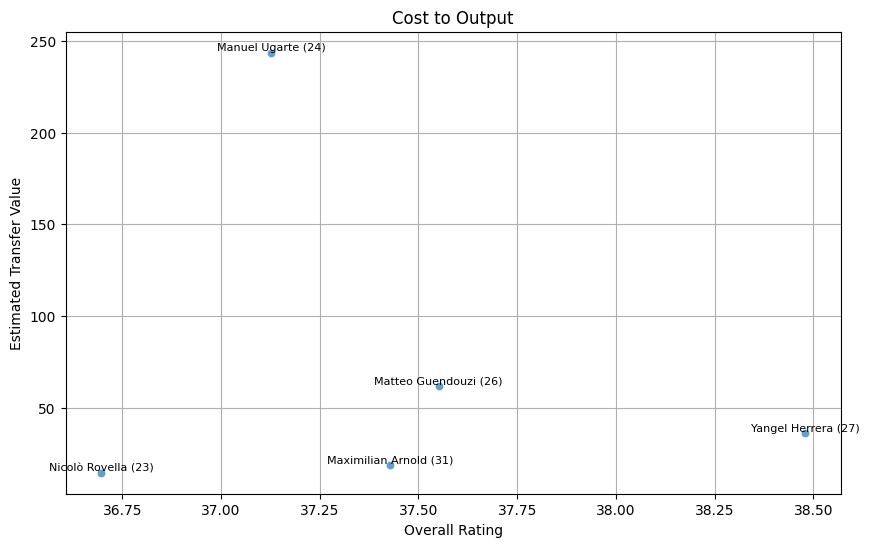

In [37]:
#final choices and cost to rating
names = ['Nicolò Rovella', 'Maximilian Arnold', 'Yangel Herrera','Matteo Guendouzi', 'Manuel Ugarte' ]

tp_dm_choices = tp_dm[tp_dm['Name'].isin(names)]
categories = ['Av Rat','Defensive Actions', 'Tck R', "Dist/90",'Pas %' ,'KP+CC' ]
weights = {'Av Rat':1, "Defensive Actions" : 1, 'Pas %' : 1.25, 'Tck R':1,  'KP+CC': 1, 'Dist/90':.5}
rating = 0
total_weight = sum(weights.values())


tp_dm_choices[categories] = tp_dm_choices[categories].apply(pd.to_numeric, errors='coerce')
for category in categories:
  rating += tp_dm_choices[category] * weights[category]
  tp_dm_choices['Overall Rating'] = (rating / total_weight)

value = tp_dm_choices['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')

mean_value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2)

tp_dm_choices['Mean Value'] = mean_value

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_dm_choices, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_dm_choices.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show()


In [38]:
from os import remove
#looking for a 10
categories = ['Drb/90', 'Shot/90','Asts/90','Pas %' ,'xG/90','KP+CC' ]

tp_10 = tp_mids
tp_10['Pas %'] = tp_10['Pas %'].fillna('0').astype(str).str.replace('%','')

tp_10[categories] = tp_10[categories].apply(pd.to_numeric, errors='coerce')
tp_10[categories] = tp_10[categories].fillna(0)

tp_10 = tp_10[tp_10['Pas %']>80]
tp_10 = tp_10[tp_10['Drb/90']>1.6]
tp_10 = tp_10[tp_10['KP+CC']>1.5]
tp_10 = tp_10[tp_10['Shot/90']>2]
tp_10 = tp_10[tp_10['Asts/90']>.2]
tp_10 = tp_10[tp_10['xG/90']>.2]
remove = ['Pedri', 'Gavi']
tp_10 = tp_10[~tp_10['Name'].isin(remove)]
tp_10

Name          Position  Age  Nat Height   Weight  \
3      Jude Bellingham      DM, M/AM (C)   21  ENG   6'1"  165 lbs   
11          Phil Foden   M (C), AM (RLC)   25  ENG   5'7"  141 lbs   
63         Xavi Simons   M (C), AM (RLC)   22  NED  5'10"  127 lbs   
68       Julian Brandt        M/AM (RLC)   29  GER   6'1"  182 lbs   
106   Dejan Kulusevski    M (R), AM (RC)   25  SWE   6'1"  174 lbs   
107  Christian Pulisic   M (R), AM (RLC)   26  USA  5'10"  160 lbs   
124     James Maddison  M (LC), AM (RLC)   28  ENG   5'9"  160 lbs   
230      Michael Olise           AM (RC)   23  ENG   6'0"  156 lbs   
247   Alexandr Golovin  M (LC), AM (RLC)   29  RUS  5'11"  152 lbs   
271  Francisco Trincão   M (R), AM (RLC)   25  POR   6'0"  160 lbs   
310    Pedro Gonçalves   M (C), AM (RLC)   26  POR   5'9"  147 lbs   
393       Taylor Booth         M/AM (RC)   24  USA   5'9"  145 lbs   
596      Kasey McAteer   M (C), AM (RLC)   23  ENG  5'10"  149 lbs   
875              Curro    M (C), AM (RC)   29  ESP   5'9"  154 lbs   

          Personality                 Club Transfer Value  Av Rat  ...  \
3       Perfectionist          Real Madrid  £120M - £359M    7.33  ...   
11   Fairly Ambitious             Man City   £80M - £239M    7.67  ...   
63           Spirited  Paris Saint-Germain   £61M - £182M    7.42  ...   
68    Fairly Sporting             Dortmund   £99M - £297M    7.34  ...   
106               NaN            Tottenham   £80M - £239M    7.15  ...   
107               NaN                Milan   £75M - £226M    7.46  ...   
124               NaN            Tottenham   £87M - £262M    7.32  ...   
230               NaN       Crystal Palace  £19.5M - £59M    7.26  ...   
247               NaN               Monaco    £31M - £93M    7.34  ...   
271               NaN          Sporting CP    £24M - £73M    7.34  ...   
310               NaN            Tottenham    £27M - £82M    7.18  ...   
393               NaN           FC Utrecht    £15M - £46M    7.28  ...   
596               NaN            Leicester   £40M - £121M    7.35  ...   
875               NaN               Nantes  £13.5M - £40M    7.30  ...   

                  Division        Style           Media Description  \
3         LALIGA EA SPORTS       Leader      World class midfielder   
11          Premier League    Technical  Elite attacking midfielder   
63       Ligue 1 Uber Eats    Technical  Elite attacking midfielder   
68              Bundesliga    Technical  Elite attacking midfielder   
106         Premier League     Physical  Elite attacking midfielder   
107            Serie A TIM     Creative                Elite winger   
124         Premier League    Technical  Elite attacking midfielder   
230         Premier League     Creative             Cultured winger   
247      Ligue 1 Uber Eats    Technical        Attacking midfielder   
271  Liga Portugal Betclic     Creative                      Winger   
310         Premier League  Intelligent        Attacking midfielder   
393             Eredivisie     Creative                  Midfielder   
596         Premier League     Physical                      Winger   
875      Ligue 1 Uber Eats     Creative                      Winger   

        Media Handling Ch C/90 Ps A/90  Inf  Defensive Actions     xG/90  \
3              Evasive    0.32   50.89  NaN               3.88  0.341634   
11        Level-headed    0.47   42.27  NaN               3.99  0.364522   
63   Evasive, Reserved    0.54   45.74  Unh               3.81  0.328189   
68        Level-headed    0.61   38.48  NaN               3.84  0.254802   
106  Scouting Required    0.27   36.68  Inj               3.19  0.328899   
107  Scouting Required    0.44   37.53  IPR               4.00  0.345698   
124  Scouting Required    0.35   41.11  NaN               4.22  0.323788   
230  Scouting Required    0.20   38.60  Wnt               4.32  0.288000   
247  Scouting Required    0.56   41.49  NaN               4.07  0.308892   
271  Scouting Required    0.26

Av Rat  Drb/90  Shot/90  Asts/90  Pas %     xG/90  KP+CC  \
3      7.33    1.80     2.86     0.22     88  0.341634   2.09   
11     7.67    3.34     3.53     0.34     85  0.364522   2.47   
63     7.42    2.12     2.91     0.36     87  0.328189   2.88   
68     7.34    2.96     2.46     0.24     85  0.254802   2.59   
106    7.15    1.70     2.46     0.24     84  0.328899   2.00   
107    7.46    2.56     2.96     0.33     83  0.345698   2.77   
124    7.32    3.07     2.62     0.44     85  0.323788   3.51   
230    7.26    3.52     2.16     0.32     82  0.288000   3.24   
247    7.34    2.46     2.67     0.25     87  0.308892   2.63   
271    7.34    2.43     3.01     0.32     82  0.382288   2.34   
310    7.18    2.69     2.16     0.21     86  0.232506   1.90   
393    7.28    2.54     2.43     0.31     81  0.314743   1.68   
596    7.35    3.27     2.58     0.23     87  0.312401   2.07   
875    7.30    3.17     2.32     0.26     84  0.225536   3.30   

                  Name  
3      Jude Bellingham  
11          Phil Foden  
63         Xavi Simons  
68       Julian Brandt  
106   Dejan Kulusevski  
107  Christian Pulisic  
124     James Maddison  
230      Michael Olise  
247   Alexandr Golovin  
271  Francisco Trincão  
310    Pedro Gonçalves  
393       Taylor Booth  
596      Kasey McAteer  
875              Curro

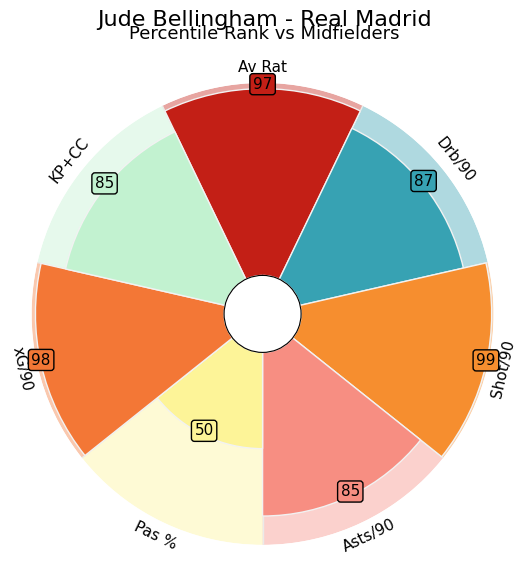

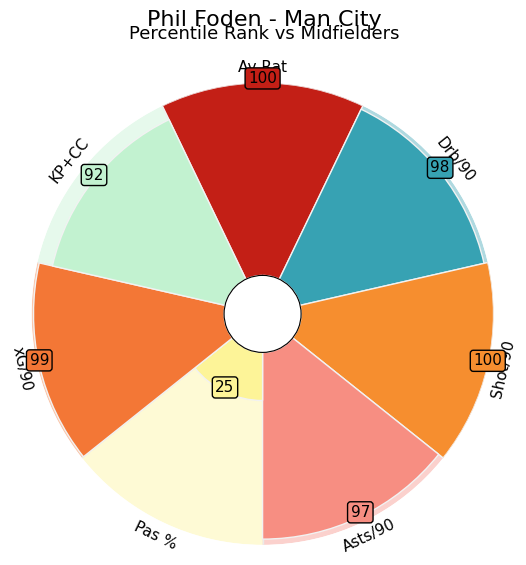

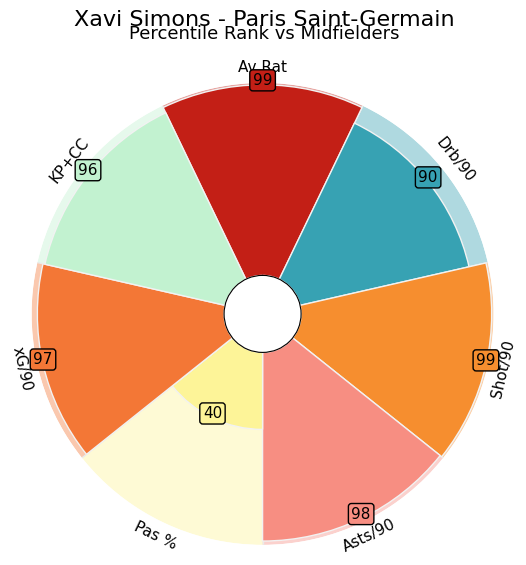

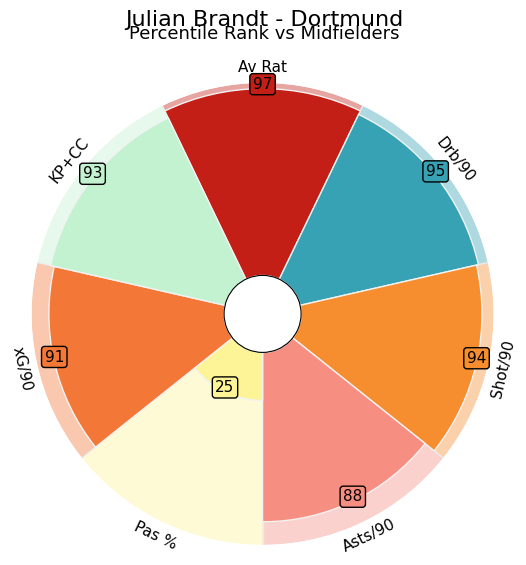

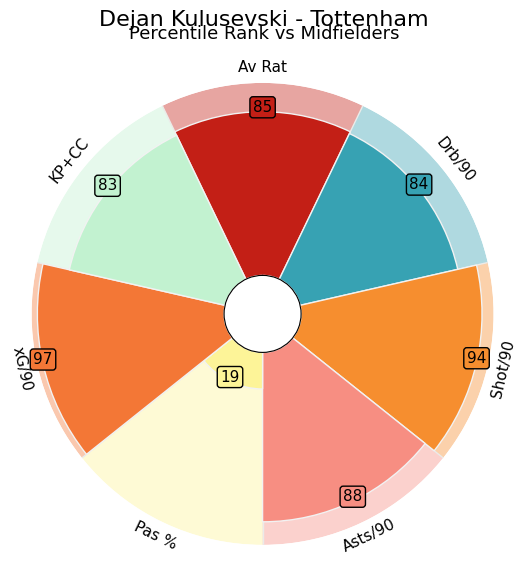

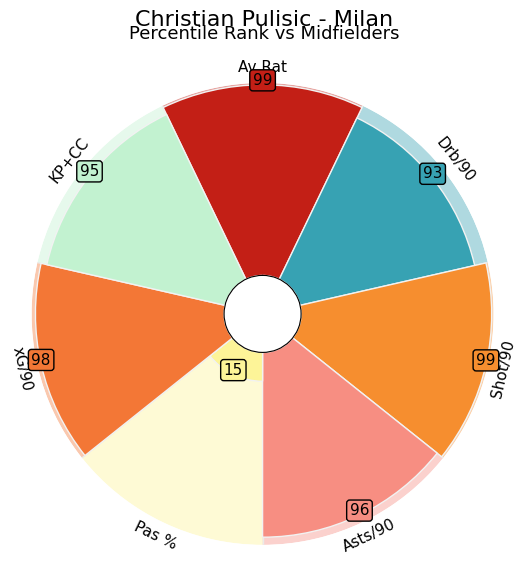

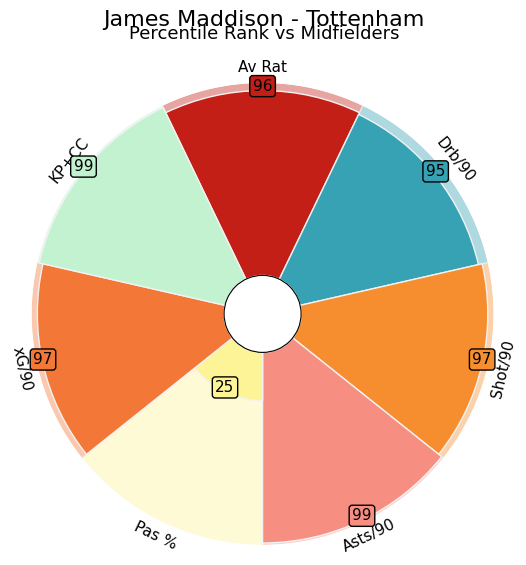

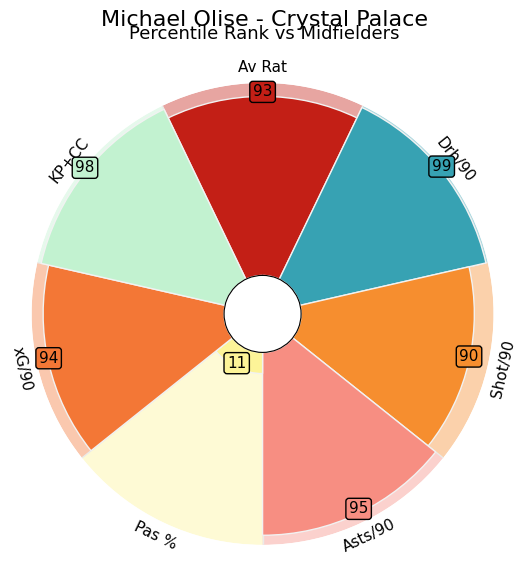

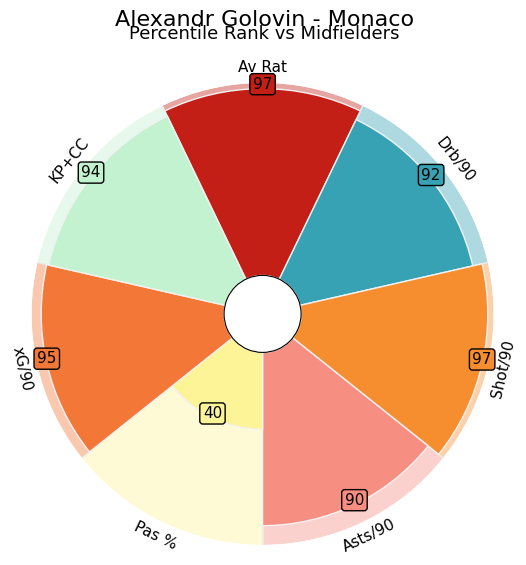

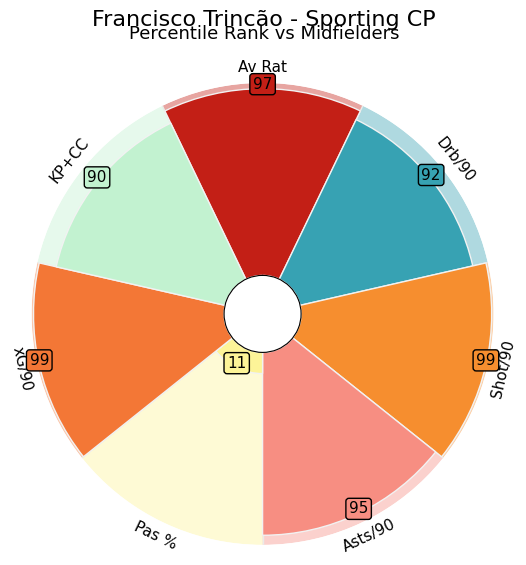

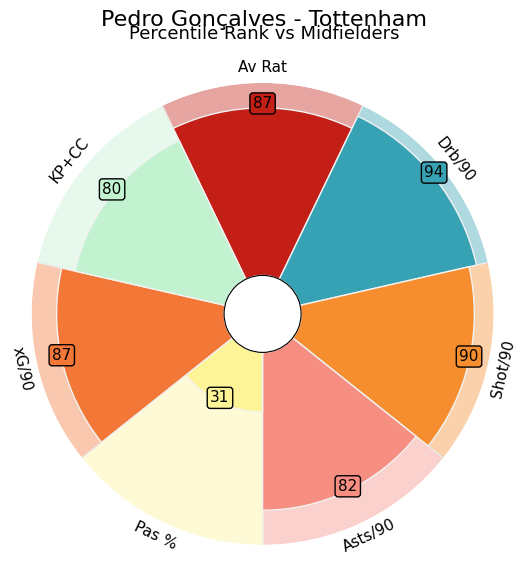

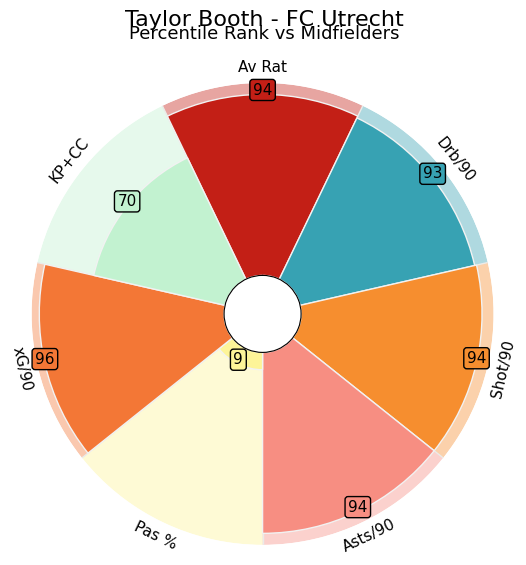

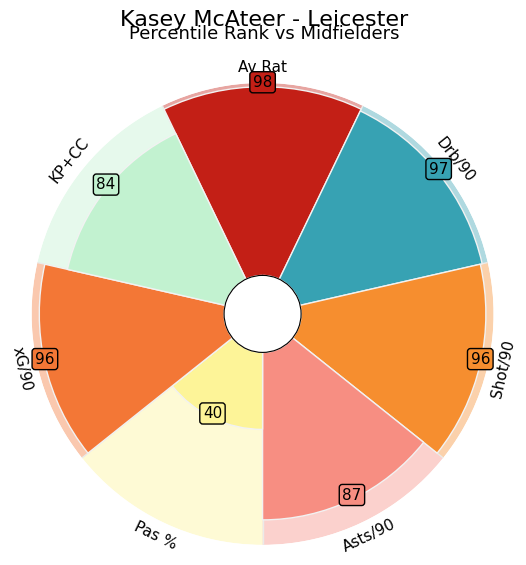

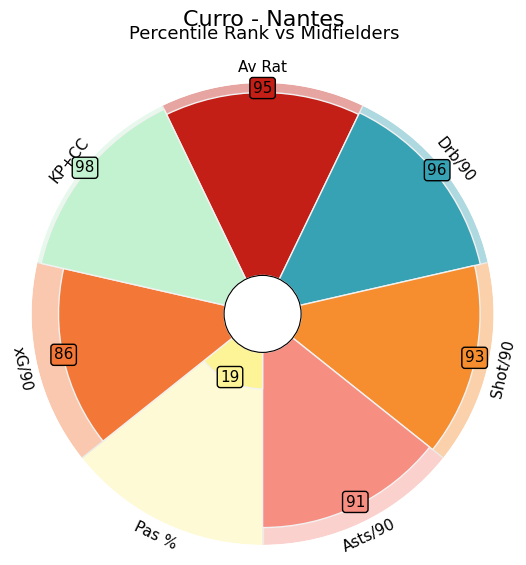

In [39]:
categories = ['Av Rat','Drb/90', 'Shot/90','Asts/90','Pas %' ,'xG/90','KP+CC' ]
slice_colors = [ "#c31f16","#37a2b3", "#f68e2f", "#f78e82","#fdf498", "#f37736",'#c2f2d0']
text_colors = ["#000000"] * 7
display(tp_10[categories + ['Name']])
baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


for index, row in tp_10.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_mids[category], row[category])))
  title = dict(
    title_name='Creative Midfielders',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Midfielders",
    size=13,
    ha="center", color="#000000"
  )
  plt.show()

<ipython-input-40-b23114f81e2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_10_choices[categories] = tp_10_choices[categories].apply(pd.to_numeric, errors='coerce')
<ipython-input-40-b23114f81e2b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_10_choices['Overall Rating'] = (rating / total_weight)
<ipython-input-40-b23114f81e2b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

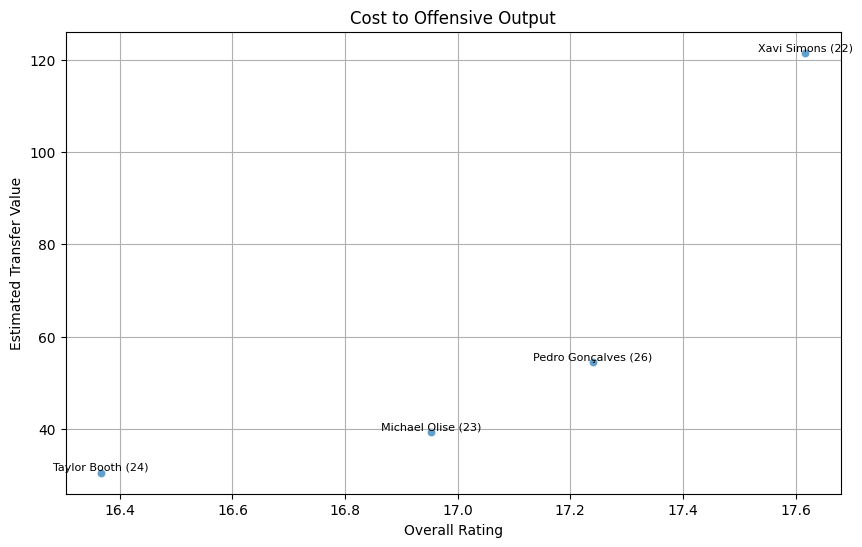

In [40]:
names = ['Xavi Simons', 'Michael Olise', 'Pedro Gonçalves','Taylor Booth']
tp_10_choices = tp_10[tp_10['Name'].isin(names)]
categories = ['Av Rat','Drb/90', 'Shot/90','Asts/90','Pas %' ,'xG/90','KP+CC' ]
weights = {'Av Rat':1, "Drb/90" : 1, 'Pas %' : 1, 'Shot/90':.5,  'KP+CC':1, 'Asts/90':.5, 'xG/90':.75}
rating = 0
total_weight = sum(weights.values())

tp_10_choices[categories] = tp_10_choices[categories].apply(pd.to_numeric, errors='coerce')
for category in categories:
  rating += tp_10_choices[category] * weights[category]
  tp_10_choices['Overall Rating'] = (rating / total_weight)

value = tp_10_choices['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')
value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2)

tp_10_choices['Mean Value'] = value


plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_10_choices, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_10_choices.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Offensive Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show()


In [41]:
#Finding some clinical goal scorers

tp_attackers = transfer_pool[transfer_pool['Position'].str.contains(r'\b(AM|ST)\b') & ~(transfer_pool['Position'].str.contains(r'\b(DM|M\s*\(C\))\b'))&~transfer_pool['Position'].str.contains(r'M\s*\(C\)')]
tp_attackers = tp_attackers[tp_attackers['Transfer Value']!='Not for Sale']
tp_attackers['Ch C/90'] = tp_attackers['Ch C/90'].fillna('0').astype(str).str.replace('-', '0')
tp_attackers['K Ps/90'] = tp_attackers['K Ps/90'].fillna('0').astype(str).str.replace('-', '0')
tp_attackers['Drb/90'] = tp_attackers['Drb/90'].fillna('0').astype(str).str.replace('-', '0')
tp_attackers['Drb/90']=pd.to_numeric(tp_attackers['Drb/90'])
tp_attackers['G+A'] = pd.to_numeric(tp_attackers['Gls']) + pd.to_numeric(tp_attackers['Ast'])
tp_attackers['Mins'] = tp_attackers['Mins'].str.replace(',', '')
tp_attackers['Ps C'] = tp_attackers['Ps C'].str.replace(',', '')
tp_attackers['xG/90'] = (pd.to_numeric(tp_attackers['xG']) / pd.to_numeric(tp_attackers['Mins'])) * 90
tp_attackers['Dist/90'] = tp_attackers['Dist/90'].fillna('0').astype(str).str.replace('mi', '')
tp_attackers['Dist/90']=pd.to_numeric(tp_attackers['Dist/90'])
tp_attackers['Ps C/90'] = (pd.to_numeric(tp_attackers['Ps C'])/pd.to_numeric(tp_attackers['Mins']))*90
tp_attackers['KP+CC'] = pd.to_numeric(tp_attackers["Ch C/90"]) + pd.to_numeric(tp_attackers["K Ps/90"])
tp_attackers

Name                  Position  Age  Nat Height   Weight  \
2           Kylian Mbappé           AM (RL), ST (C)   26  FRA  5'10"  160 lbs   
7         Vinícius Júnior    M (L), AM (RL), ST (C)   24  BRA   5'9"  160 lbs   
14          Jamal Musiala  M (LC), AM (RLC), ST (C)   22  GER   6'0"  158 lbs   
16       Lautaro Martínez                    ST (C)   27  ARG   5'9"  158 lbs   
18             Leroy Sané          M (RL), AM (RLC)   29  GER   6'0"  176 lbs   
...                   ...                       ...  ...  ...    ...      ...   
1495          Arnaud Dony             D/WB/M/AM (L)   21  BEL   5'7"  143 lbs   
1498      Matheus Machado                    ST (C)   22  BRA   6'1"  171 lbs   
1502     Abdoulaye Traoré                    AM (L)   21  CIV   5'9"  145 lbs   
1503  Joep van der Sluijs                   AM (LC)   23  NED  5'11"  165 lbs   
1504      Stavros Gavriel                    AM (L)   23  CYP  5'10"  158 lbs   

           Personality                  Club Transfer Value  Av Rat  ...  \
2               Driven           Real Madrid  £131M - £394M    7.65  ...   
7        Perfectionist           Real Madrid  £114M - £342M    7.21  ...   
14            Resolute        Bayern München  £119M - £356M    7.29  ...   
16        Professional                 Inter   £87M - £260M    7.16  ...   
18    Fairly Ambitious        Bayern München  £105M - £314M    7.60  ...   
...                ...                   ...            ...     ...  ...   
1495               NaN  Union Saint-Gilloise    £325K - £1M    6.72  ...   
1498               NaN         Zulte Waregem  £1.3M - £3.8M    6.83  ...   
1502               NaN         Zulte Waregem  £475K - £1.4M    6.89  ...   
1503               NaN        Almere City FC  £110K - £350K    6.74  ...   
1504               NaN         Zulte Waregem  £140K - £425K    6.84  ...   

                Division        Style           Media Description  \
2       LALIGA EA SPORTS  Intelligent               Elite striker   
7       LALIGA EA SPORTS     Physical                Elite winger   
14            Bundesliga    Technical  Elite attacking midfielder   
16           Serie A TIM       Leader               Elite striker   
18            Bundesliga     Creative                Elite winger   
...                  ...          ...                         ...   
1495  Jupiler Pro League    Technical                    Fullback   
1498  Jupiler Pro League    Technical                     Forward   
1502  Jupiler Pro League     Physical                      Winger   
1503          Eredivisie     Creative                      Winger   
1504  Jupiler Pro League     Physical                      Winger   

         Media Handling Ch C/90 Ps A/90  Inf G+A     xG/90 KP+CC  
2               Evasive    0.32   22.91  Inj  49  0.649072  1.40  
7             Outspoken    0.24   22.63  NaN  45  0.507654  1.21  
14             Reserved    0.39   27.19  Wnt  29  0.439869  1.46  
16    Evasive, Reserved    0.25   22.96  nEU  34  0.540505  0.96  
18       Media-friendly    0.60   35.08  NaN  29  0.192332  3.54  
...                 ...     ...     ...  ...  ..       ...   ...  
1495  Scouting Required    0.16   40.33  NaN   3  0.045303  1.13  
1498  Scouting Required    0.14   24.54  NaN  15  0.250626  0.78  
1502  Scouting Required    0.03   30.50  NaN  10  0.208380  1.04  
1503  Scouting Required    0.04   22.74  NaN   6  0.227787  0.04  
1504  Scouting Required    0.11   32.67  NaN   2  0.093142  1.63  

[373 rows x 124 columns]

In [42]:
tp_st = tp_attackers[tp_attackers['G+A']>21]
tp_st = tp_st[tp_st['xG/90']>.4]
tp_st = tp_st[tp_st['Dist/90']>7]
tp_st = tp_st[tp_st['Ps C/90']>19]
tp_st = tp_st[~tp_st['Name'].isin(['Kylian Mbappé', 'Vinícius Júnior'])]

tp_st

Name                  Position  Age  Nat Height   Weight  \
14       Jamal Musiala  M (LC), AM (RLC), ST (C)   22  GER   6'0"  158 lbs   
16    Lautaro Martínez                    ST (C)   27  ARG   5'9"  158 lbs   
39       Gabriel Jesus           AM (RL), ST (C)   28  BRA   5'9"  160 lbs   
60     Marcus Rashford          M/AM (L), ST (C)   27  ENG   6'0"  154 lbs   
156  Giacomo Raspadori          AM (RLC), ST (C)   25  ITA   5'8"  152 lbs   
162     Alexander Isak           AM (RL), ST (C)   25  SWE   6'3"  163 lbs   
223         Mathys Tel    M (R), AM (RL), ST (C)   20  FRA   6'0"  171 lbs   
268      Tammy Abraham                    ST (C)   27  ENG   6'5"  189 lbs   
283      Mateo Retegui                    ST (C)   26  ITA   6'1"  178 lbs   
510     Tasos Douvikas                    ST (C)   25  GRE   6'0"  167 lbs   

           Personality            Club Transfer Value  Av Rat  ...  \
14            Resolute  Bayern München  £119M - £356M    7.29  ...   
16        Professional           Inter   £87M - £260M    7.16  ...   
39   Fairly Determined         Arsenal  £114M - £343M    7.07  ...   
60            Resolute         Man Utd   £74M - £221M    7.29  ...   
156                NaN          Napoli    £22M - £66M    7.03  ...   
162                NaN       Newcastle  £106M - £318M    7.00  ...   
223                NaN  Bayern München   £59M - £177M    7.20  ...   
268                NaN            Roma  £13.5M - £40M    7.00  ...   
283                NaN           Genoa    £31M - £92M    7.04  ...   
510                NaN      Celta Vigo   £8.4M - £25M    6.95  ...   

             Division        Style           Media Description  \
14         Bundesliga    Technical  Elite attacking midfielder   
16        Serie A TIM       Leader               Elite striker   
39     Premier League    Technical               Elite striker   
60     Premier League     Physical                Elite winger   
156       Serie A TIM  Intelligent                     Striker   
162    Premier League  Intelligent               Elite striker   
223        Bundesliga     Physical                   Wonderkid   
268       Serie A TIM       Leader                     Striker   
283       Serie A TIM  Intelligent                     Striker   
510  LALIGA EA SPORTS     Physical                     Striker   

        Media Handling Ch C/90 Ps A/90  Inf G+A     xG/90 KP+CC  
14            Reserved    0.39   27.19  Wnt  29  0.439869  1.46  
16   Evasive, Reserved    0.25   22.96  nEU  34  0.540505  0.96  
39        Level-headed    0.22   23.71  NaN  23  0.415749  0.94  
60            Reserved    0.35   26.86  NaN  23  0.423704  1.44  
156  Scouting Required    0.43   22.94  NaN  28  0.400508  2.04  
162  Scouting Required    0.18   23.63  NaN  26  0.486842  0.84  
223  Scouting Required    0.22   26.50  IPR  22  0.430419  0.99  
268  Scouting Required    0.06   23.39  nEU  23  0.417857  0.89  
283  Scouting Required    0.17   23.45  NaN  23  0.435419  1.21  
510  Scouting Required    0.08   23.10  NaN  25  0.528555  0.69  

[10 rows x 124 columns]

Av Rat  G+A     xG/90  Dist/90    Ps C/90               Name
14     7.29   29  0.439869      7.7  23.048780      Jamal Musiala
16     7.16   34  0.540505      7.4  19.546266   Lautaro Martínez
39     7.07   23  0.415749      7.4  20.177138      Gabriel Jesus
60     7.29   23  0.423704      7.6  22.790123    Marcus Rashford
156    7.03   28  0.400508      7.5  19.473999  Giacomo Raspadori
162    7.00   26  0.486842      7.6  20.473684     Alexander Isak
223    7.20   22  0.430419      7.7  22.033347         Mathys Tel
268    7.00   23  0.417857      7.5  20.031888      Tammy Abraham
283    7.04   23  0.435419      7.6  19.749759      Mateo Retegui
510    6.95   25  0.528555      7.5  19.711510     Tasos Douvikas

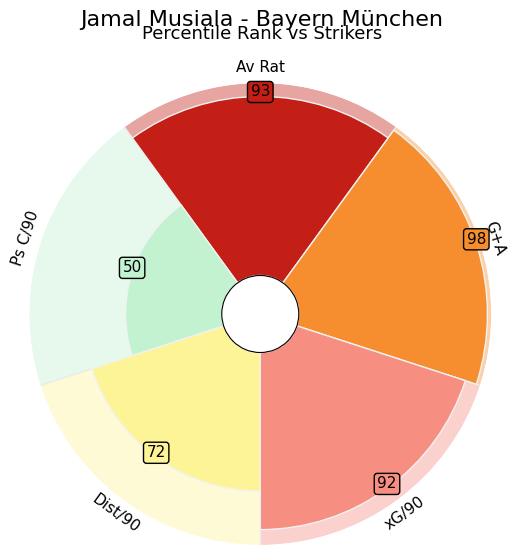

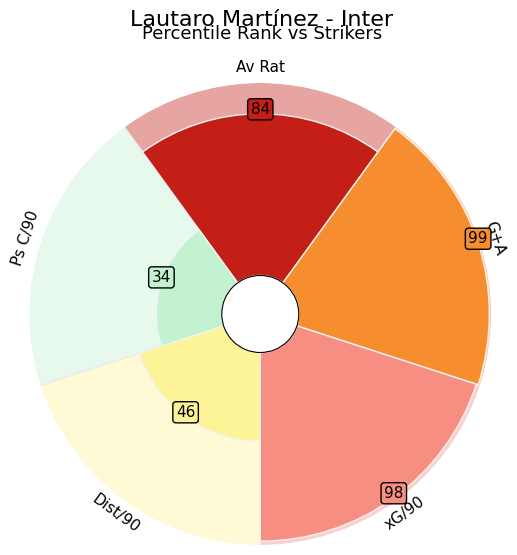

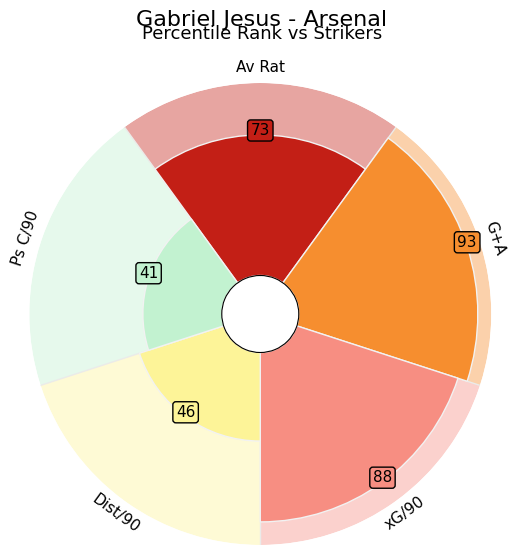

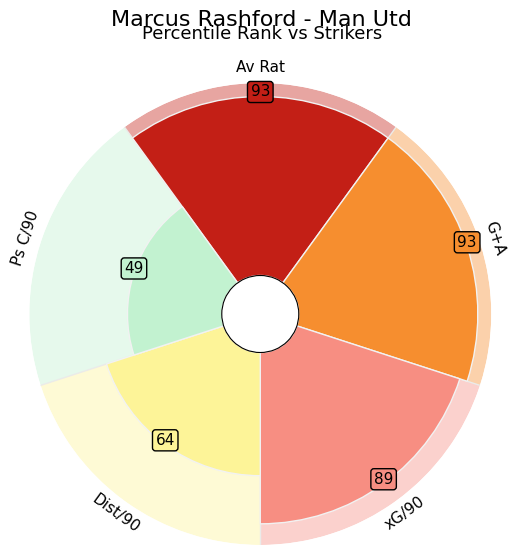

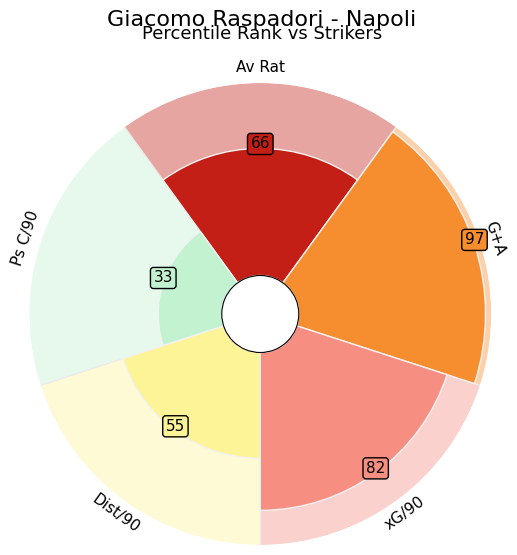

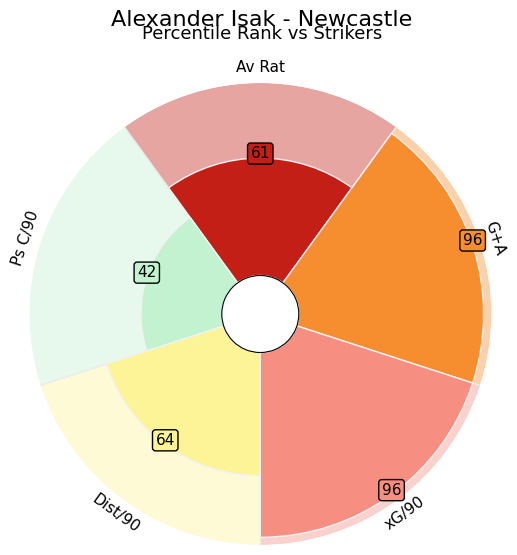

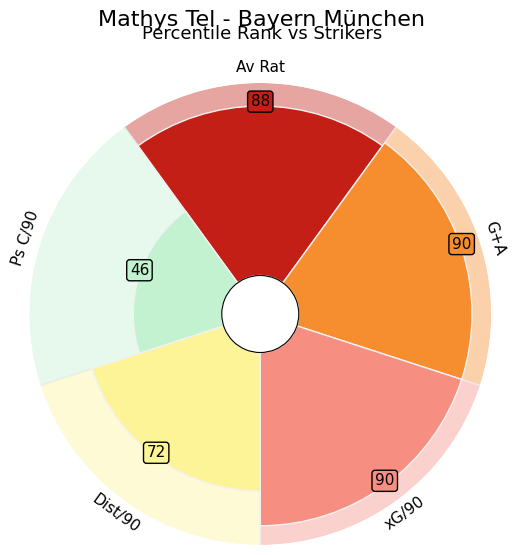

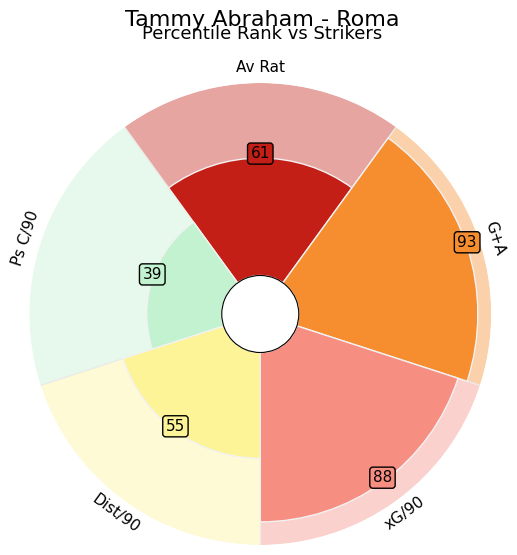

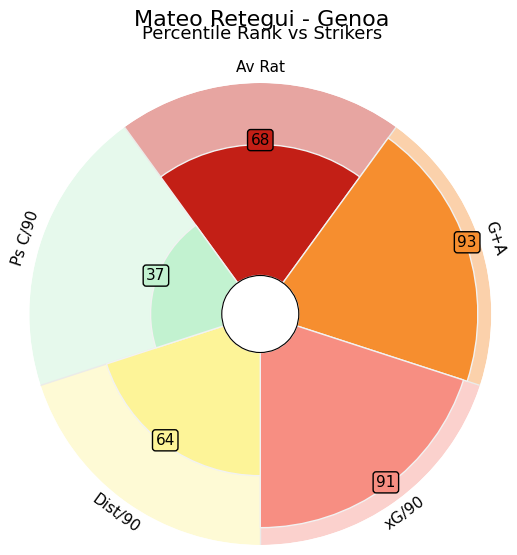

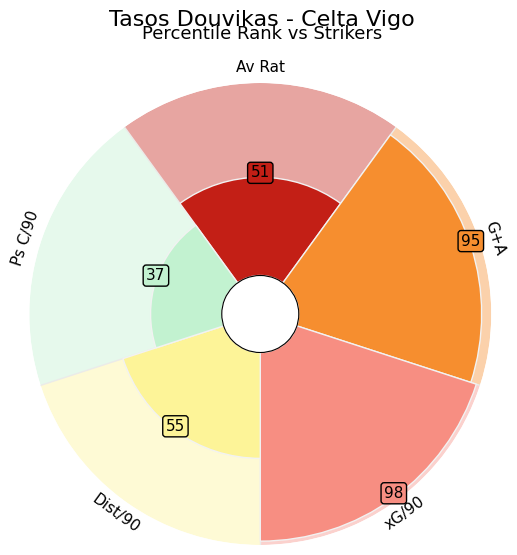

In [43]:
categories = ['Av Rat','G+A', 'xG/90','Dist/90','Ps C/90']
slice_colors = [ "#c31f16", "#f68e2f", "#f78e82","#fdf498", '#c2f2d0']
text_colors = ["#000000"] * 5

baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

display(tp_st[categories + ['Name']])

for index, row in tp_st.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_attackers[category], row[category])))
  title = dict(
    title_name='Strikers',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Strikers",
    size=13,
    ha="center", color="#000000"
  )

<ipython-input-44-3f6554eabc10>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_st_choices[categories] = tp_st_choices[categories].apply(pd.to_numeric, errors='coerce')
<ipython-input-44-3f6554eabc10>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_st_choices['Overall Rating'] = (rating / total_weight)
<ipython-input-44-3f6554eabc10>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

<function matplotlib.pyplot.show(close=None, block=None)>

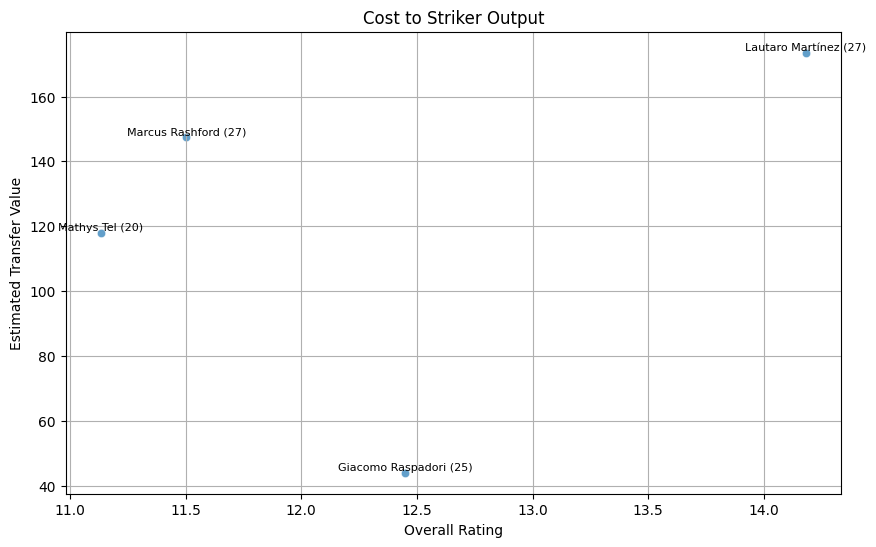

In [44]:
names = ['Marcus Rashford', 'Lautaro Martínez', 'Giacomo Raspadori', 'Mathys Tel']
tp_st_choices = tp_st[tp_st['Name'].isin(names)]

categories = ['Av Rat','G+A', 'xG/90','Dist/90','Ps C/90']
weights = {'Av Rat':1, "G+A" : 1.25, 'xG/90':1.25, 'Dist/90':.5,  'Ps C/90':.5}
rating = 0
total_weight = sum(weights.values())

tp_st_choices[categories] = tp_st_choices[categories].apply(pd.to_numeric, errors='coerce')
for category in categories:
  rating += tp_st_choices[category] * weights[category]
  tp_st_choices['Overall Rating'] = (rating / total_weight)
value = tp_st_choices['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')
value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2)

tp_st_choices['Mean Value'] = value


plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_st_choices, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_st_choices.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Striker Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show


In [45]:
#wingers

tp_wing = tp_attackers[tp_attackers['G+A']>15]
tp_wing = tp_wing[tp_wing['Drb/90']>2.5]
tp_wing = tp_wing[tp_wing['xG/90']>.25]
tp_wing = tp_wing[tp_wing['KP+CC']>1.6]

tp_wing

Name                Position  Age  Nat Height   Weight  \
26     Raheem Sterling               M/AM (RL)   30  ENG   5'8"  154 lbs   
29         Rafael Leão          AM (L), ST (C)   25  POR   6'2"  178 lbs   
43       Marco Asensio         M (R), AM (RLC)   29  ESP   6'0"  167 lbs   
44     Federico Chiesa  M (L), AM (RL), ST (C)   27  ITA   5'9"  152 lbs   
68       Julian Brandt              M/AM (RLC)   29  GER   6'1"  182 lbs   
100              Sávio                 AM (RL)   21  BRA   5'9"  147 lbs   
107  Christian Pulisic         M (R), AM (RLC)   26  USA  5'10"  160 lbs   
124     James Maddison        M (LC), AM (RLC)   28  ENG   5'9"  160 lbs   
132        Leon Bailey               M/AM (RL)   27  JAM  5'10"  165 lbs   
175        Samuel Lino     D/WB/M (L), AM (RL)   25  BRA  5'10"  158 lbs   
202   Nicolás González  M (R), AM (RL), ST (C)   27  ARG  5'11"  165 lbs   
220  Riccardo Orsolini                M/AM (R)   28  ITA   6'0"  160 lbs   
393       Taylor Booth               M/AM (RC)   24  USA   5'9"  145 lbs   

           Personality                 Club Transfer Value  Av Rat  ...  \
26           Ambitious              Chelsea   £67M - £200M    7.41  ...   
29    Fairly Ambitious                Milan   £75M - £225M    7.21  ...   
43   Fairly Determined  Paris Saint-Germain   £47M - £142M    7.46  ...   
44       Perfectionist             Juventus   £63M - £190M    7.52  ...   
68     Fairly Sporting             Dortmund   £99M - £297M    7.34  ...   
100                NaN                Milan   £55M - £165M    7.21  ...   
107                NaN                Milan   £75M - £226M    7.46  ...   
124                NaN            Tottenham   £87M - £262M    7.32  ...   
132                NaN          Aston Villa   £38M - £113M    7.31  ...   
175                NaN            Newcastle   £93M - £278M    7.29  ...   
202                NaN              Man Utd           £28M    7.37  ...   
220                NaN              Bologna    £29M - £86M    7.39  ...   
393                NaN           FC Utrecht    £15M - £46M    7.28  ...   

              Division      Style           Media Description  \
26      Premier League   Physical                Elite winger   
29         Serie A TIM   Physical                Elite winger   
43   Ligue 1 Uber Eats   Creative                Elite winger   
44         Serie A TIM     Leader                Elite winger   
68          Bundesliga  Technical  Elite attacking midfielder   
100        Serie A TIM   Creative                Elite winger   
107        Serie A TIM   Creative                Elite winger   
124     Premier League  Technical  Elite attacking midfielder   
132     Premier League   Creative                Elite winger   
175     Premier League   Physical                      Winger   
202     Premier League   Creative                      Winger   
220        Serie A TIM   Physical                      Winger   
393         Eredivisie   Creative                  Midfielder   

        Media Handling Ch C/90 Ps A/90  Inf G+A     xG/90 KP+CC  
26      Media-friendly    0.35   39.40  Wnt  19  0.383610  1.97  
29        Level-headed    0.30   30.15  NaN  20  0.352725  1.76  
43      Media-friendly    0.24   41.78  NaN  24  0.268085  3.33  
44             Evasive    0.41   35.46  NaN  20  0.346836  2.00  
68        Level-headed    0.61   38.48  NaN  17  0.254802  2.59  
100  Scouting Required    0.54   34.53  nEU  20  0.392446  2.28  
107  Scouting Required    0.44   37.53  IPR  21  0.345698  2.77  
124  Scouting Required    0.35   41.11  NaN  25  0.323788  3.51  
132  Scouting Required    0.27   33.63  Int  21  0.274462  1.80  
175  Scouting Required    0.38   37.94  NaN  17  0.328499  1.96  
202  Scouting Required    0.27   37.08  Lst  21  0.414968  1.65  
220  Scouting Required    0.44   37.22  Wnt  24  0.265070  3.05  
393  Scouting Required    0.17   32.23  NaN  18  0.314743  1.68  

[13 rows x 124 columns]

Av Rat  G+A  Drb/90     xG/90  KP+CC               Name
26     7.41   19    3.24  0.383610   1.97    Raheem Sterling
29     7.21   20    3.53  0.352725   1.76        Rafael Leão
43     7.46   24    3.83  0.268085   3.33      Marco Asensio
44     7.52   20    4.33  0.346836   2.00    Federico Chiesa
68     7.34   17    2.96  0.254802   2.59      Julian Brandt
100    7.21   20    3.67  0.392446   2.28              Sávio
107    7.46   21    2.56  0.345698   2.77  Christian Pulisic
124    7.32   25    3.07  0.323788   3.51     James Maddison
132    7.31   21    3.52  0.274462   1.80        Leon Bailey
175    7.29   17    3.33  0.328499   1.96        Samuel Lino
202    7.37   21    3.76  0.414968   1.65   Nicolás González
220    7.39   24    3.74  0.265070   3.05  Riccardo Orsolini
393    7.28   18    2.54  0.314743   1.68       Taylor Booth

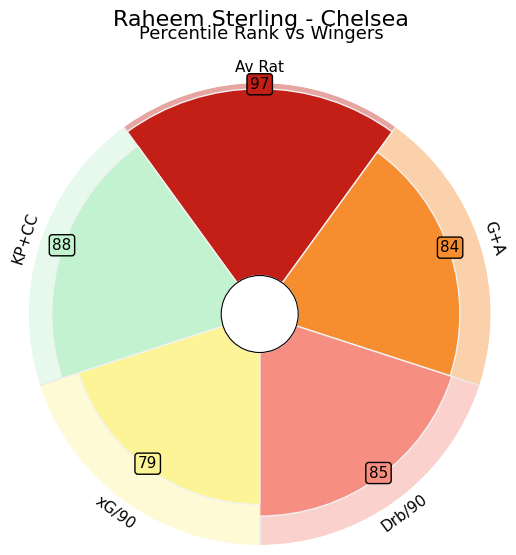

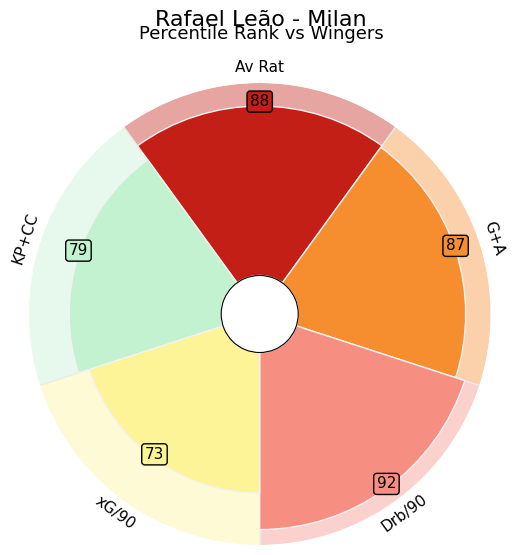

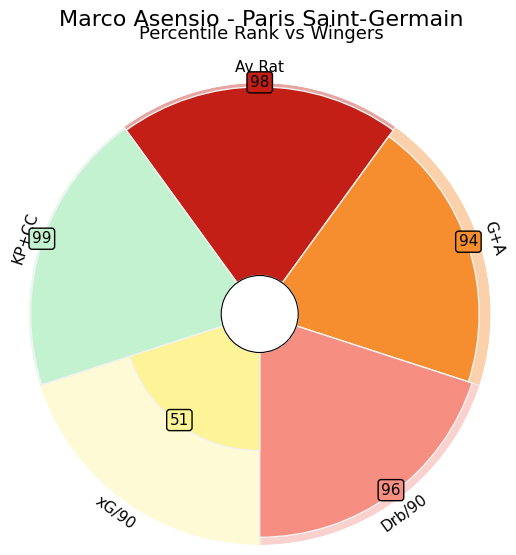

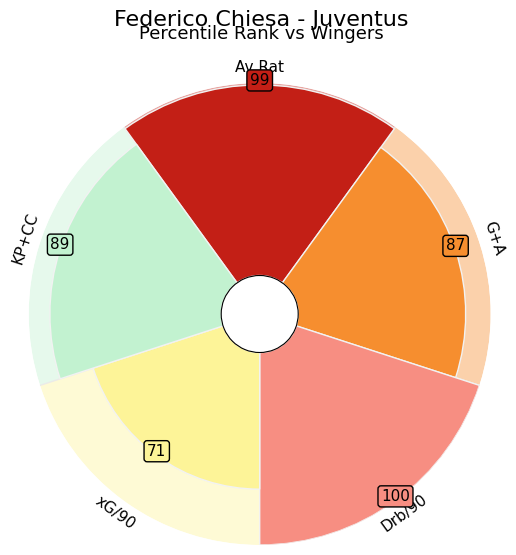

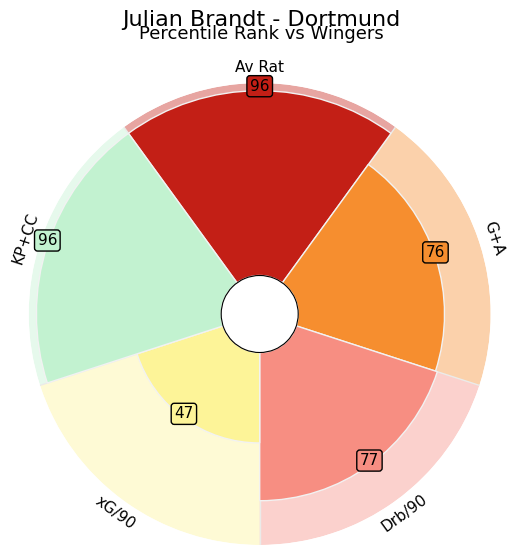

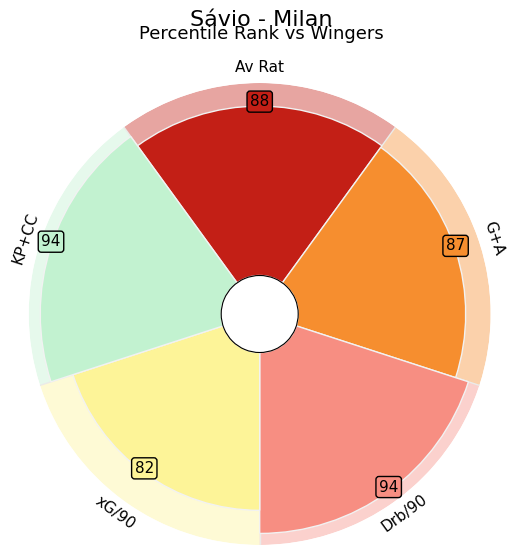

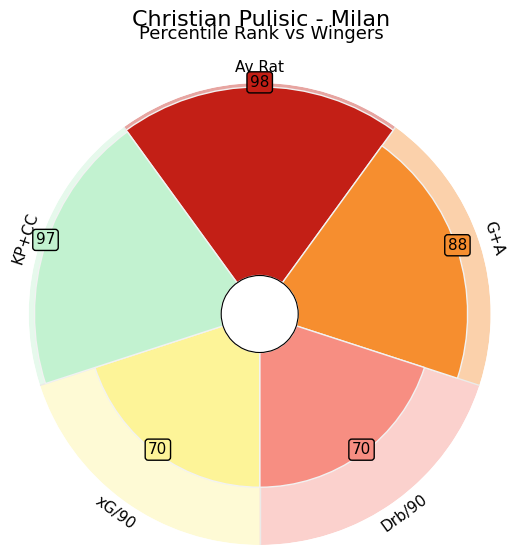

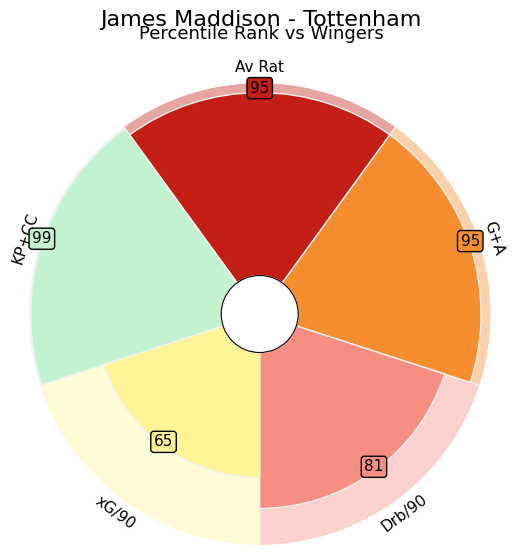

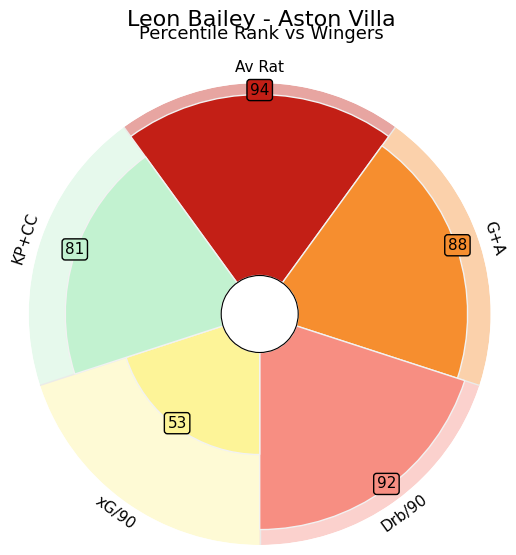

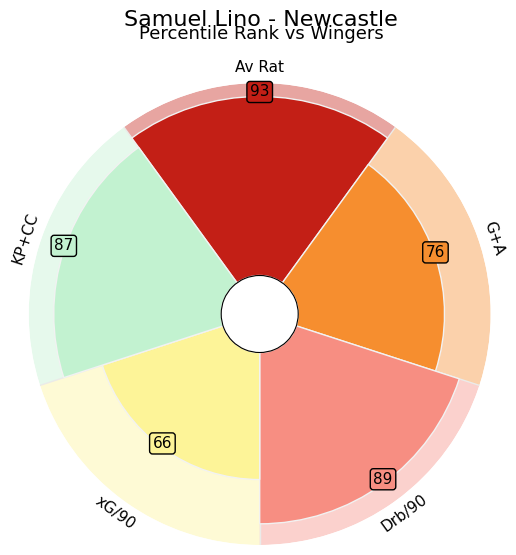

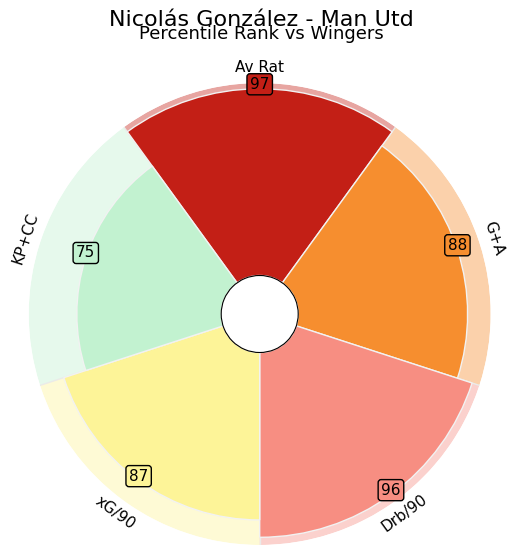

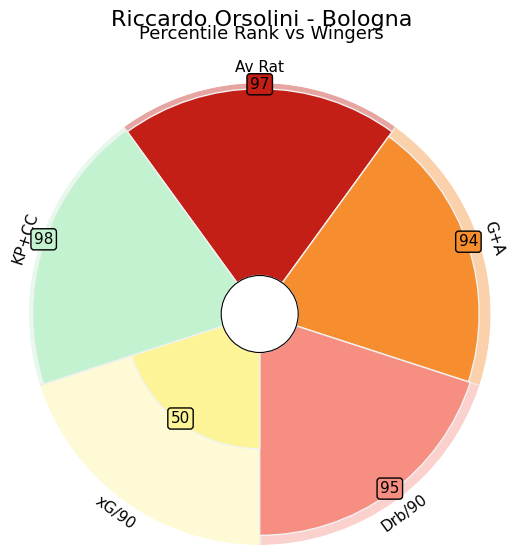

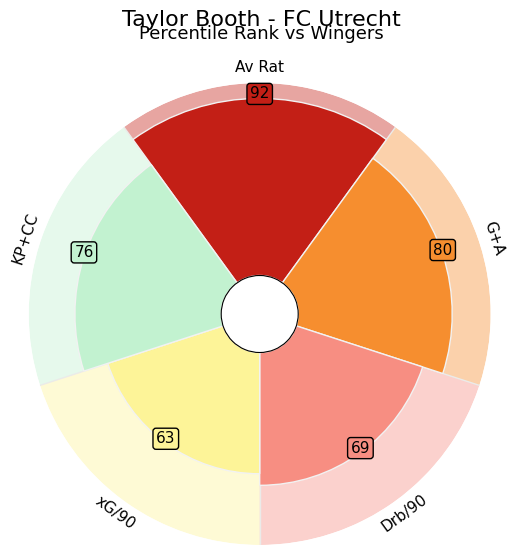

In [46]:
categories = ['Av Rat', 'G+A', 'Drb/90','xG/90', "KP+CC"]
slice_colors = [ "#c31f16", "#f68e2f", "#f78e82","#fdf498", '#c2f2d0']
text_colors = ["#000000"] * 5

baker = PyPizza(
    params=categories,                  # list of parameters
    background_color="white",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

display(tp_wing[categories + ['Name']])
for index, row in tp_wing.iterrows():
  values = []
  for category in categories:
    values.append(math.floor(stats.percentileofscore(tp_attackers[category], row[category])))
  title = dict(
    title_name='Wingers',
    title_color='#1c547f',
    title_fontsize=18,
    subtitle_fontsize=15,
  )
  fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(6, 6),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
         zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
  )
  fig.text(
    0.515, 0.975, f"{row['Name']} - {row['Club']}", size=16,
    ha="center", color="#000000"
  )
  fig.text(
    0.515, 0.953,
    "Percentile Rank vs Wingers",
    size=13,
    ha="center", color="#000000"
  )

<ipython-input-64-a24dbc4e55c6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_wing_choices[categories] = tp_wing_choices[categories].apply(pd.to_numeric, errors='coerce')
<ipython-input-64-a24dbc4e55c6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_wing_choices['Overall Rating'] = (rating / total_weight)
<ipython-input-64-a24dbc4e55c6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

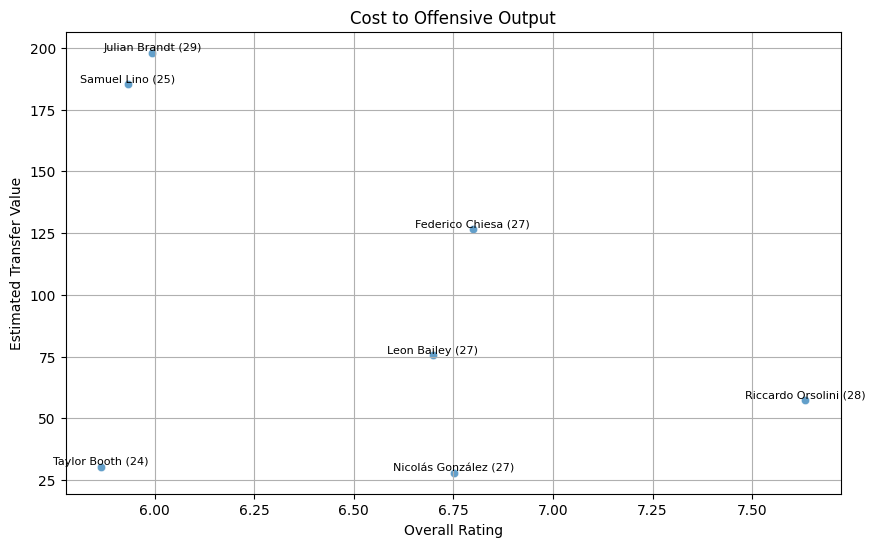

In [64]:
#Cost to Output

players = ['Samuel Lino','Leon Bailey','Federico Chiesa','Nicolás González','Riccardo Orsolini', 'Taylor Booth', 'Julian Brandt']

tp_wing_choices = tp_wing[tp_wing['Name'].isin(players)]

categories = ['Av Rat', 'G+A', 'Drb/90','xG/90', "KP+CC"]

weights = {'Av Rat':1, "G+A" : 1, 'Drb/90':1.25, 'xG/90':0.75,  'KP+CC':1.25}
rating = 0
total_weight = sum(weights.values())

tp_wing_choices[categories] = tp_wing_choices[categories].apply(pd.to_numeric, errors='coerce')
for category in categories:
  rating += tp_wing_choices[category] * weights[category]
  tp_wing_choices['Overall Rating'] = (rating / total_weight)

value = tp_wing_choices['Transfer Value'].str.replace('£', '').str.replace('M', '').str.split('-')
value = value.apply(lambda x: (float(x[0]) + float(x[1])) / 2 if len(x) > 1 else float(x[0])) # Handle cases where the list has only one element


tp_wing_choices['Mean Value'] = value


plt.figure(figsize=(10, 6))
sns.scatterplot(data=tp_wing_choices, x = 'Overall Rating', y = 'Mean Value', alpha = 0.7)
for index, row in tp_wing_choices.iterrows():
    plt.text(row['Overall Rating'], row['Mean Value'], f'{row["Name"]} ({row["Age"]})', ha='center', va='bottom', fontsize=8)
plt.title('Cost to Offensive Output')
plt.xlabel('Overall Rating')
plt.ylabel('Estimated Transfer Value')
plt.grid(True)
plt.show()


Final Shortlist

In [48]:
final_shortlist = pd.read_excel('/content/drive/MyDrive/FM-data-project/final_shortlist.xlsx')

final_shortlist

Rec  Inf                Name                 Position  \
0   - - -  NaN         Xavi Simons  M (C), AM (RLC), ST (C)   
1   - - -  NaN  Nico Schlotterbeck               D (LC), DM   
2   - - -  Bid          Marc Guéhi                    D (C)   
3   - - -  NaN   Giacomo Raspadori         AM (RLC), ST (C)   
4   - - -  Wnt      Pascal Struijk               D (LC), DM   
5   - - -  Wnt    Matteo Guendouzi                DM, M (C)   
6   - - -  Lst    Nicolás González   M (R), AM (RL), ST (C)   
7   - - -  Wnt   Riccardo Orsolini                 M/AM (R)   
8   - - -  Wnt          Mathys Tel   M (R), AM (RL), ST (C)   
9   - - -  Bid       Michael Olise           M (R), AM (RC)   
10  - - -  NaN      Yangel Herrera                DM, M (C)   
11  - - -  NaN     Pedro Gonçalves          M (C), AM (RLC)   
12  - - -  Int        Taylor Booth                M/AM (RC)   
13  - - -  Trn      Nicolò Rovella                DM, M (C)   
14  - - -  NaN   Maximilian Arnold                DM, M (C)   
15  - - -  NaN   Jean-Clair Todibo                    D (C)   

                 Club  Nat Height   Weight  Age Transfer Value  
0                 PSG  NED  5'10"  127 lbs   22   £95M - £121M  
1   Borussia Dortmund  GER   6'3"  187 lbs   25    £55M - £88M  
2      Crystal Palace  ENG   6'0"  176 lbs   24    £43M - £53M  
3              Napoli  ITA   5'8"  152 lbs   25    £34M - £55M  
4    Bayer Leverkusen  BEL   6'3"  165 lbs   25    £36M - £59M  
5               Lazio  FRA   6'1"  147 lbs   26    £47M - £62M  
6   Manchester United  ARG  5'11"  165 lbs   27           £18M  
7             Bologna  ITA   6'0"  160 lbs   28    £57M - £71M  
8           FC Bayern  FRA   6'0"  171 lbs   20    £59M - £96M  
9      Crystal Palace  ENG   6'0"  156 lbs   23    £28M - £45M  
10             Girona  VEN   6'0"  169 lbs   27    £28M - £46M  
11  Tottenham Hotspur  POR   5'9"  147 lbs   26    £55M - £67M  
12         FC Utrecht  USA   5'9"  145 lbs   24    £17M - £29M  
13              Lazio  ITA  5'10"  154 lbs   23  £11.5M - £19M  
14      VfL Wolfsburg  GER   6'0"  163 lbs   31    £12M - £21M  
15               Nice  FRA   6'3"  194 lbs   25    £53M - £69M